# Telecom Churn - Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Data Preparation

- Data understanding
- Preprocessing
- Handle missing values
- Outlier detection and handling
- EDA
- Feature Engineering



#### Model 1 - To predict customers who will churn

- Feature Selection
- Dimensionality Reduction using PCA
- Handling Class Imbalance
- Baseline Model building
- Hyperparameter tuning
- Model Evaluation
- Model Selection

#### Model 2 - Identifying important predictor attributes

- Feature Selection
- Handling Class Imbalance
- Model building
- Hyperparameter tuning with Cross Validation
- Model Evaluation

#### Recommend strategies to manage customer churn

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_colwidth",100)
pd.options.display.float_format = '{:.2f}'.format

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

import warnings
warnings.filterwarnings('ignore')
sns.distributions._has_statsmodels=False

In [165]:
# print line separator
# Until fuction: line seperator
def print_ln():
    print('-'*100, '\n')

## Data Understanding

In [167]:
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [168]:
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [169]:
telecom_df.shape

(99999, 226)

In [170]:
telecom_df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [171]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

### <font color=green> Null/Missing values handling </font>

In [172]:
## % Null values in columns
null_cols=((telecom_df.isnull().sum()/len(telecom_df.index))*100).sort_values(ascending=False) 

In [173]:
## null coulmns >50% null values
print(null_cols[null_cols > 50])
print_ln()
print('Length ',len(null_cols[null_cols > 50]))

count_rech_2g_6            74.85
date_of_last_rech_data_6   74.85
count_rech_3g_6            74.85
av_rech_amt_data_6         74.85
max_rech_data_6            74.85
total_rech_data_6          74.85
arpu_3g_6                  74.85
arpu_2g_6                  74.85
night_pck_user_6           74.85
fb_user_6                  74.85
arpu_3g_7                  74.43
count_rech_2g_7            74.43
fb_user_7                  74.43
count_rech_3g_7            74.43
arpu_2g_7                  74.43
av_rech_amt_data_7         74.43
max_rech_data_7            74.43
night_pck_user_7           74.43
total_rech_data_7          74.43
date_of_last_rech_data_7   74.43
night_pck_user_9           74.08
date_of_last_rech_data_9   74.08
fb_user_9                  74.08
arpu_2g_9                  74.08
max_rech_data_9            74.08
arpu_3g_9                  74.08
total_rech_data_9          74.08
av_rech_amt_data_9         74.08
count_rech_3g_9            74.08
count_rech_2g_9            74.08
fb_user_8 

### <font color=green> Handling missing recharge data </font>
Some recharge and revenue columns have a lot of null values. These columns indicate that no recharge was done and revenue generated for that customer in that particular month.

Minutes of usage also has null values which indicates no usage by the customer in that month

These missing values can be imputed to 0.



In [174]:
#get list of columns with recharge and revenue data
impute_0 = list(null_cols[null_cols.index.str.contains('count_rech')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('max_rech')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('av_rech')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('total_rech')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('arpu')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('mou')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('ic_others')].index)
impute_0 += list(null_cols[null_cols.index.str.contains('og_others')].index)
print(impute_0)
print_ln()
print('Number of columns to be imputed with 0 ', len(impute_0))

['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_9', 'count_rech_2g_9', 'count_rech_3g_8', 'count_rech_2g_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_9', 'max_rech_data_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_9', 'av_rech_amt_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_9', 'total_rech_data_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_2g_9', 'arpu_3g_9', 'arpu_3g_8', 'arpu_2g_8', 'arpu_7', 'arpu_8', 'arpu_6', 'arpu_9', 'std_ic_t2m_mou_9', 'spl_ic_mou_9', 'loc_ic_mou_9', 'isd_ic_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2t_mou

In [175]:
#  recharge amount and date both are null means that there was no recharge so amount can be imputed with 0
telecom_df[telecom_df['av_rech_amt_data_6'].isnull()].head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
1      7001865778        109            0.00            0.00            0.00   
2      7001625959        109            0.00            0.00            0.00   
3      7001204172        109            0.00            0.00            0.00   
5      7000286308        109            0.00            0.00            0.00   
6      7001051193        109            0.00            0.00            0.00   
7      7000701601        109            0.00            0.00            0.00   
8      7001524846        109            0.00            0.00            0.00   
9      7001864400        109            0.00            0.00            0.00   
10     7000471350        109            0.00            0.00            0.00   
11     7002006969        109            0.00            0.00            0.00   
12     7001419799        109            0.00            0.00            0.00   
13     7002191713        109            0.00            0.00            0.00   
14     7001654241        109            0.00            0.00            0.00   
15     7002070365        109            0.00            0.00            0.00   
16     7000875565        109            0.00            0.00            0.00   
17     7000187447        109            0.00            0.00            0.00   
18     7001678155        109            0.00            0.00            0.00   
20     7001028254        109            0.00            0.00            0.00   
21     7002124215        109            0.00            0.00            0.00   
22     7001121249        109            0.00            0.00            0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
5             6/30/2014            7/31/2014            8/31/2014   
6             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
9             6/30/2014            7/31/2014            8/31/2014   
10            6/30/2014            7/31/2014            8/31/2014   
11            6/30/2014            7/31/2014            8/31/2014   
12            6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
14            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   
18            6/30/2014            7/31/2014            8/31/2014   
20            6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
22            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
1             9/30/2014   34.05  355.07  268.32   86.28        24.11   
2             9/30/2014  167.69  189.06  210.23  290.71        11.54   
3             9/30/2014  221.34  251.10  508.05  389.50        99.91   
5             9/30/2014   50.26   58.81   83.39  170.83        50.16   
6             9/30/2014  429.02  190.70  255.11  114.75        71.03   
7             9/30/2014 1069.18 1349.85 3171.48  500.00        57.84   
8             9/30/2014  378.72  492.22  137.36  166.79       413.69   
9             9/30/2014  119.52  247.44  170.23  160.04        33.89   
10            9/30/2014    0.40    0.00  281.86   82.64         0.00   
11            9/30/2014  298.13   21.00  131.62    0.00       439.06   
12            9/30/2014   48.57  120.87   80.50   39.66        15.44   
13       

In [176]:
# Imputing missing recharge values with 0
telecom_df[impute_0] = telecom_df[impute_0].fillna(0)

In [177]:
((telecom_df.isnull().sum()/len(telecom_df.index))*100).sort_values(ascending=False) 

date_of_last_rech_data_6   74.85
night_pck_user_6           74.85
fb_user_6                  74.85
night_pck_user_7           74.43
fb_user_7                  74.43
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
night_pck_user_9           74.08
fb_user_9                  74.08
date_of_last_rech_data_8   73.66
night_pck_user_8           73.66
fb_user_8                  73.66
date_of_last_rech_9         4.76
date_of_last_rech_8         3.62
date_of_last_rech_7         1.77
last_date_of_month_9        1.66
date_of_last_rech_6         1.61
last_date_of_month_8        1.10
last_date_of_month_7        0.60
isd_og_mou_8                0.00
isd_og_mou_7                0.00
isd_og_mou_9                0.00
isd_og_mou_6                0.00
std_og_mou_9                0.00
std_og_mou_8                0.00
std_og_mou_7                0.00
spl_og_mou_6                0.00
std_og_t2f_mou_9            0.00
std_og_mou_6                0.00
std_og_t2c_mou_9            0.00
std_og_t2c

In [178]:
#get list of columns with fb_user and night_pack_user details
impute_fb = list(null_cols[null_cols.index.str.contains('fb_')].index)
impute_fb += list(null_cols[null_cols.index.str.contains('night_pck')].index)
impute_fb

['fb_user_6',
 'fb_user_7',
 'fb_user_9',
 'fb_user_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_9',
 'night_pck_user_8']

In [179]:
for x in impute_fb:
    print(telecom_df[x].value_counts())

1.00    23000
0.00     2153
Name: fb_user_6, dtype: int64
1.00    23238
0.00     2333
Name: fb_user_7, dtype: int64
1.00    22318
0.00     3604
Name: fb_user_9, dtype: int64
1.00    23463
0.00     2876
Name: fb_user_8, dtype: int64
0.00    24522
1.00      631
Name: night_pck_user_6, dtype: int64
0.00    24982
1.00      589
Name: night_pck_user_7, dtype: int64
0.00    25508
1.00      414
Name: night_pck_user_9, dtype: int64
0.00    25790
1.00      549
Name: night_pck_user_8, dtype: int64


In [180]:
#Impute fb_user and night_pack variables are categorical columns. Imputing these with a new categry '-1' for missing values.
telecom_df[impute_fb] = telecom_df[impute_fb].fillna(-1)

In [181]:
((telecom_df.isnull().sum()/len(telecom_df.index))*100).sort_values(ascending=False) 

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
date_of_last_rech_9         4.76
date_of_last_rech_8         3.62
date_of_last_rech_7         1.77
last_date_of_month_9        1.66
date_of_last_rech_6         1.61
last_date_of_month_8        1.10
last_date_of_month_7        0.60
isd_og_mou_9                0.00
isd_og_mou_8                0.00
sep_vbc_3g                  0.00
spl_og_mou_6                0.00
spl_og_mou_7                0.00
isd_og_mou_6                0.00
spl_og_mou_8                0.00
spl_og_mou_9                0.00
og_others_6                 0.00
isd_og_mou_7                0.00
std_og_mou_8                0.00
std_og_mou_9                0.00
og_others_8                 0.00
std_og_mou_7                0.00
std_og_mou_6                0.00
std_og_t2c_mou_9            0.00
std_og_t2c_mou_8            0.00
std_og_t2c_mou_7            0.00
std_og_t2c_mou_6            0.00
og_others_

In [182]:
# Remove columns which are > 70 % empty
date_datacols = [column for column in telecom_df.columns if ('_rech_data' in column and column.startswith('date'))]
date_cols = [column for column in telecom_df.columns if ('_rech_data' not in column and column.startswith('date'))]
last_date_cols = [column for column in telecom_df.columns if column.startswith('last_date_')]
print('date data columns',date_datacols)
print_ln()
print('date columns',date_cols)
print_ln()
print('last date month columns',last_date_cols)

date data columns ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
---------------------------------------------------------------------------------------------------- 

date columns ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
---------------------------------------------------------------------------------------------------- 

last date month columns ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']


In [183]:
# drop date of last rech data columns as >40% are null 
# Impute the mode value to the date of last rech columns
telecom_df.drop(date_datacols,axis=1,inplace=True)
telecom_df.shape

(99999, 222)

In [184]:
for col in date_cols:
    telecom_df[col].fillna(telecom_df[col].mode()[0],inplace=True)


In [185]:
for col in last_date_cols:
    print(telecom_df[col].mode()[0])
    telecom_df[col].fillna(telecom_df[col].mode()[0],inplace=True)

6/30/2014
7/31/2014
8/31/2014
9/30/2014


In [186]:
((telecom_df.isnull().sum()/len(telecom_df.index))*100).sort_values(ascending=False) 

sep_vbc_3g             0.00
isd_og_mou_6           0.00
og_others_9            0.00
og_others_8            0.00
og_others_7            0.00
og_others_6            0.00
spl_og_mou_9           0.00
spl_og_mou_8           0.00
spl_og_mou_7           0.00
spl_og_mou_6           0.00
isd_og_mou_9           0.00
isd_og_mou_8           0.00
isd_og_mou_7           0.00
std_og_mou_9           0.00
total_og_mou_7         0.00
std_og_mou_8           0.00
std_og_mou_7           0.00
std_og_mou_6           0.00
std_og_t2c_mou_9       0.00
std_og_t2c_mou_8       0.00
std_og_t2c_mou_7       0.00
std_og_t2c_mou_6       0.00
std_og_t2f_mou_9       0.00
std_og_t2f_mou_8       0.00
std_og_t2f_mou_7       0.00
std_og_t2f_mou_6       0.00
total_og_mou_6         0.00
total_og_mou_8         0.00
std_og_t2m_mou_8       0.00
loc_ic_mou_6           0.00
std_ic_t2m_mou_9       0.00
std_ic_t2m_mou_8       0.00
std_ic_t2m_mou_7       0.00
std_ic_t2m_mou_6       0.00
std_ic_t2t_mou_9       0.00
std_ic_t2t_mou_8    

### <font color=green> Filter high value customers </font>


Total recharge amounts for months 6 and 7                                                                                       
Total recharge amount logic = Total data recharge + Total recharge Amount.

If any of the data recharge columns are 0 then retain the total recharge amt column as it is


In [187]:
telecom_df['total_rech_amt_6'] = telecom_df['total_rech_data_6']*telecom_df['av_rech_amt_data_6']+telecom_df['total_rech_amt_6']                                          

telecom_df['total_rech_amt_7'] = telecom_df['total_rech_data_7']*telecom_df['av_rech_amt_data_7']+telecom_df['total_rech_amt_7']
telecom_df['total_rech_amt_8'] = telecom_df['total_rech_data_8']*telecom_df['av_rech_amt_data_8']+telecom_df['total_rech_amt_8']
telecom_df['total_rech_amt_9'] = telecom_df['total_rech_data_9']*telecom_df['av_rech_amt_data_9']+telecom_df['total_rech_amt_9']

In [188]:
telecom_df['av_rech_amt'] = (telecom_df["total_rech_amt_6"] + 
                          telecom_df["total_rech_amt_7"]) / 2.0
cutoff = telecom_df.av_rech_amt.quantile(.70)
print('70 percentile of first two months avg recharge amount: ', cutoff)
telecom_hvc = telecom_df[telecom_df['av_rech_amt'] >= cutoff].copy()

70 percentile of first two months avg recharge amount:  478.0


In [189]:
telecom_hvc.shape

(30001, 223)

In [190]:
# We can drop total_rech_data_* and av_rech_amt_data_* as there is no further use of these columns
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9','av_rech_amt']
telecom_hvc.drop(drop_data_columns, axis=1, inplace=True)
print(telecom_hvc.shape)

(30001, 214)


### <font color=green> Label chrun based on the chrun phase data </font>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9



In [191]:
churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom_hvc['churn'] = np.where(telecom_hvc[churn_cols].sum(axis=1) <= 0, 1, 0 )
telecom_hvc.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109            0.00            0.00            0.00   
7      7000701601        109            0.00            0.00            0.00   
8      7001524846        109            0.00            0.00            0.00   
21     7002124215        109            0.00            0.00            0.00   
23     7000887461        109            0.00            0.00            0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0             9/30/2014  197.38  214.82  213.80   21.10         0.00   
7             9/30/2014 1069.18 1349.85 3171.48  500.00        57.84   
8             9/30/2014  378.72  492.22  137.36  166.79       413.69   
21            9/30/2014  514.45  597.75  637.76  578.60       102.41   
23            9/30/2014   74.35  193.90  366.97  811.48        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00           0.00           0.00   
7            0.00          23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75    

### <font color=  green> Chrun rate </font>

In [192]:
print('Number of Churn :\n', telecom_hvc['churn'].value_counts())
print_ln()
print('Churn rate: ', round(sum(telecom_hvc['churn'])/len(telecom_hvc.churn.index)*100,2) )

Number of Churn :
 0    27560
1     2441
Name: churn, dtype: int64
---------------------------------------------------------------------------------------------------- 

Churn rate:  8.14


### <font color= green> Remove the churn phase data </font>

In [193]:
# columns which start with 'sep' or ends with '_9'
churn_cols_all = [column for column in telecom_hvc.columns if (column.startswith('sep') or column.endswith('_9'))]
print(churn_cols_all)
print_ln()
print('Total number of churn phase columns ', len(churn_cols_all))

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']
---------------------------------------------------------------------------------

In [194]:
print('Total columns before churn column delete: ', telecom_hvc.shape[1])
telecom_hvc.drop(churn_cols_all,axis=1,inplace=True)
print_ln()
print('Total columns after churn column delete: ', telecom_hvc.shape[1])

Total columns before churn column delete:  215
---------------------------------------------------------------------------------------------------- 

Total columns after churn column delete:  163


In [195]:
telecom_hvc.reset_index(drop=True)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109            0.00            0.00   
1         7000701601        109            0.00            0.00   
2         7001524846        109            0.00            0.00   
3         7002124215        109            0.00            0.00   
4         7000887461        109            0.00            0.00   
...              ...        ...             ...             ...   
29996     7000630859        109            0.00            0.00   
29997     7000661676        109            0.00            0.00   
29998     7001729035        109            0.00            0.00   
29999     7002111859        109            0.00            0.00   
30000     7000498689        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                0.00            6/30/2014            7/31/2014   
1                0.00            6/30/2014            7/31/2014   
2                0.00            6/30/2014            7/31/2014   
3                0.00            6/30/2014            7/31/2014   
4                0.00            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
29996            0.00            6/30/2014            7/31/2014   
29997            0.00            6/30/2014            7/31/2014   
29998            0.00            6/30/2014            7/31/2014   
29999            0.00            6/30/2014            7/31/2014   
30000            0.00            6/30/2014            7/31/2014   

      last_date_of_month_8  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0                8/31/2014  197.38  214.82  213.80         0.00         0.00   
1                8/31/2014 1069.18 1349.85 3171.48        57.84        54.68   
2                8/31/2014  378.72  492.22  137.36       413.69       351.03   
3                8/31/2014  514.45  597.75  637.76       102.41       132.11   
4                8/31/2014   74.35  193.90  366.97        48.96        50.66   
...                    ...     ...     ...     ...          ...          ...   
29996            8/31/2014  384.32  255.41  393.47        78.68        29.04   
29997            8/31/2014  328.59  202.97  118.71       423.99       181.83   
29998            8/31/2014  644.97  455.23  564.33       806.73       549.36   
29999            8/31/2014  312.56  512.93  402.08       199.89       174.46   
30000            8/31/2014  322.99  303.39  606.82         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0             0.00          0.00          0.00          0.00           0.00   
1            52.29        453.43        567.16        325.91          16.23   
2            35.08         94.66         80.63        136.48           0.00   
3            85.14        757.93        896.68        983.39           0.00   
4            33.58         85.41         89.36        205.89           0.00   
...            ...           ...           ...           ...            ...   
29996       103.24         56.13         28.09         61.44           0.00   
29997         5.71         39.51         39.81         18.26           0.00   
29998       775.41        784.76        617.13        595.44           0.00   
29999         2.46        175.88        277.01        248.33           0.00   
30000         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00           0.00           0.00   
1              33.49          31.64          23.74          12.59   
2               0.00           0.00           0.00           0.00   
3               0.00           0.00           0.00           0.00   
4               0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
2999

In [196]:
print(telecom_hvc.nunique())

mobile_number           30001
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
arpu_6                  29072
arpu_7                  29084
arpu_8                  28073
onnet_mou_6             16890
onnet_mou_7             16987
onnet_mou_8             15872
offnet_mou_6            21220
offnet_mou_7            21263
offnet_mou_8            20163
roam_ic_mou_6            4048
roam_ic_mou_7            3385
roam_ic_mou_8            3433
roam_og_mou_6            4744
roam_og_mou_7            3994
roam_og_mou_8            4001
loc_og_t2t_mou_6        10420
loc_og_t2t_mou_7        10394
loc_og_t2t_mou_8        10063
loc_og_t2m_mou_6        15625
loc_og_t2m_mou_7        15674
loc_og_t2m_mou_8        15130
loc_og_t2f_mou_6         3090
loc_og_t2f_mou_7         3100
loc_og_t2f_mou_8         2989
loc_og_t2c_mou_6         1682
loc_og_t2c

### Remove the one and all unique value column as these column data will not impact analysis as they are not representing the variance in dataset

In [197]:
unique_col = [column for column in telecom_hvc.columns if ((telecom_hvc[column].nunique()==1) or (telecom_hvc[column].nunique()== len(telecom_hvc.index)))]
print(unique_col)
print_ln()
print('Length of unique columns ', len(unique_col))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
---------------------------------------------------------------------------------------------------- 

Length of unique columns  14


In [198]:
telecom_hvc.var().sort_values(ascending=False)

mobile_number        477312987545.64
total_rech_amt_8          3256613.08
total_rech_amt_7          2663994.93
total_rech_amt_6          2452707.71
aon                        917147.13
vol_3g_mb_8                844599.70
vol_3g_mb_7                838187.69
vol_3g_mb_6                834935.00
total_og_mou_7             514403.34
total_og_mou_8             490669.68
total_og_mou_6             477306.10
std_og_mou_7               409343.19
std_og_mou_8               370852.38
std_og_mou_6               370429.32
arpu_8                     251965.83
offnet_mou_7               248924.71
offnet_mou_6               232828.98
offnet_mou_8               232384.26
onnet_mou_7                230394.23
arpu_7                     230185.92
arpu_6                     212189.63
onnet_mou_6                211272.94
onnet_mou_8                210175.12
jul_vbc_3g                 196731.40
std_og_t2m_mou_7           188036.84
std_og_t2t_mou_7           177401.17
aug_vbc_3g                 177219.41
j

In [199]:
telecom_hvc.drop(unique_col,inplace=True,axis=1)
print(telecom_hvc.shape)

(30001, 149)


In [200]:
telecom_hvc.shape

(30001, 149)

In [201]:
## calculate day of recharge in indivisdual month
telecom_hvc['date_of_last_rech_6'] = pd.to_datetime(telecom_hvc.date_of_last_rech_6).dt.day
telecom_hvc['date_of_last_rech_7'] = pd.to_datetime(telecom_hvc.date_of_last_rech_7).dt.day
telecom_hvc['date_of_last_rech_8'] = pd.to_datetime(telecom_hvc.date_of_last_rech_8).dt.day

In [202]:
telecom_hvc.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [203]:
telecom_hvc.shape

(30001, 149)

In [204]:
telecom_hvc.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 149 columns):
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7          

### <font color=red> EDA </font>

### <font color=green> Univariate analysis </font>

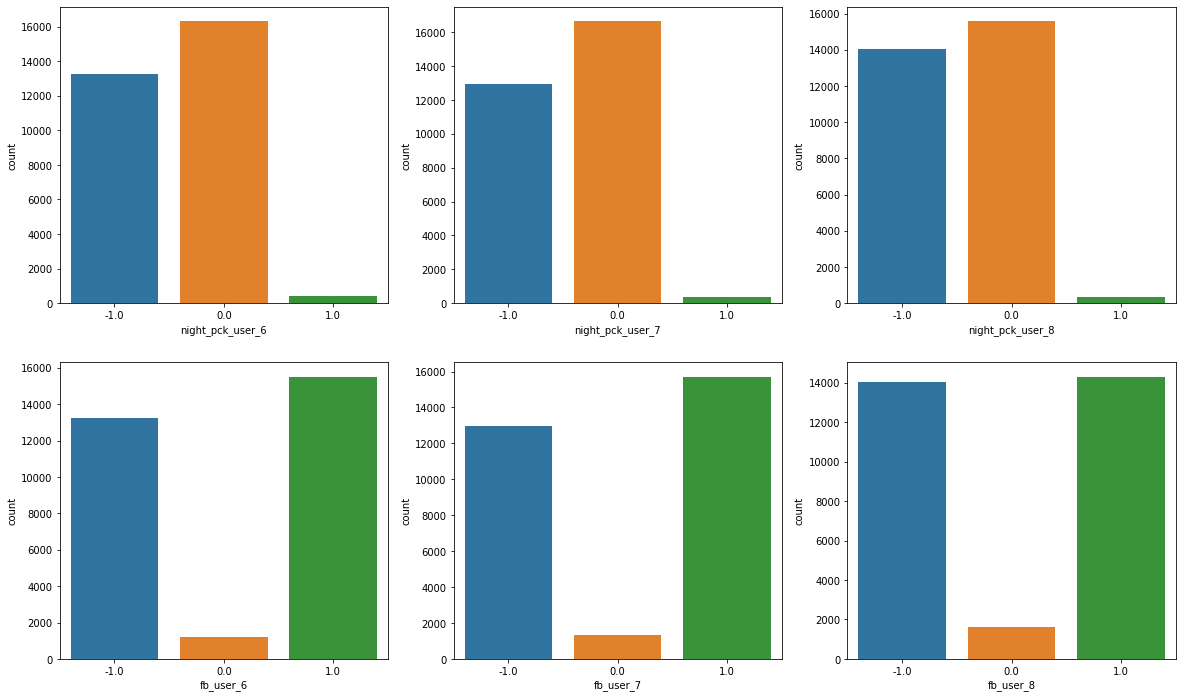

In [205]:
#Create count Plot for categorical variables
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
plt.figure(figsize=(20, 12))
for i in range(1,len(category_list)):
    plt.subplot(2,3,i)
    sns.countplot(x = category_list[i-1], data = telecom_hvc)

plt.show()

#### Above graphs shows number of churns are more who uses fb_user packs

In [206]:
def univariate_plot(col):
    plt.figure(figsize=(20, 7))
    plt.subplot(1,2,1)
    sns.distplot(telecom_hvc[col])
    plt.subplot(1,2,2)
    sns.boxplot(x = col, data = telecom_hvc)
    plt.show()

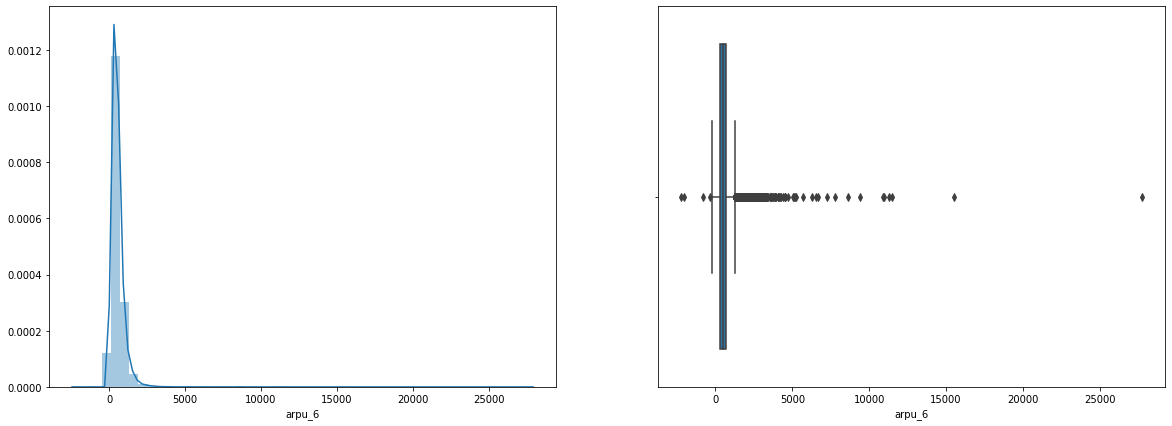

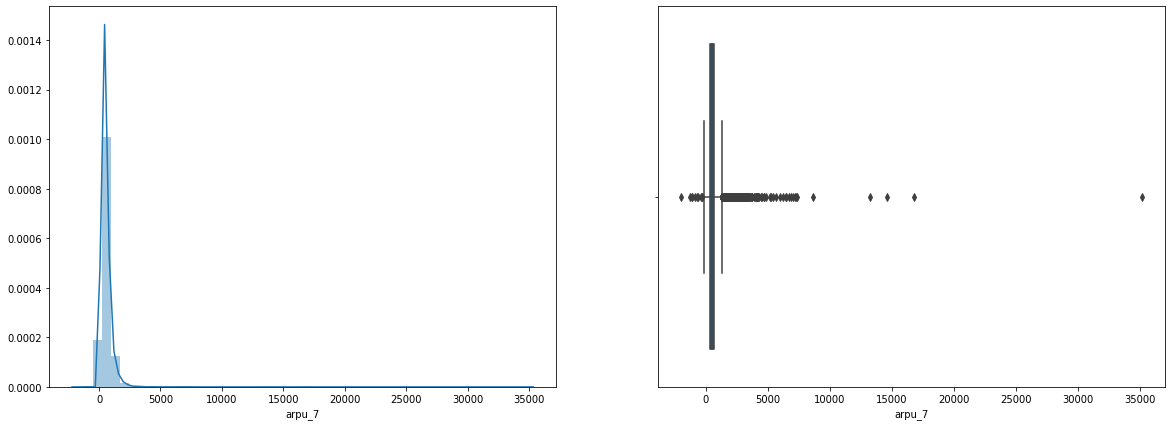

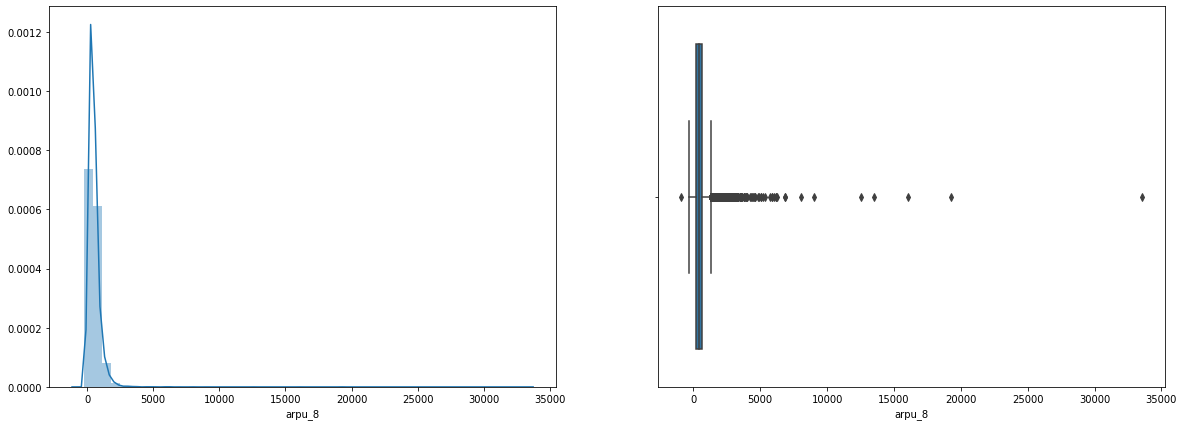

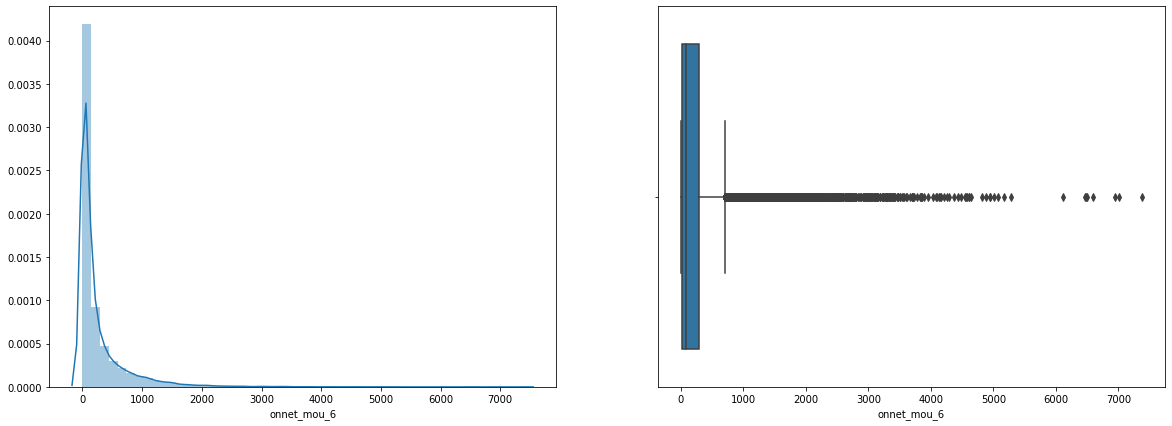

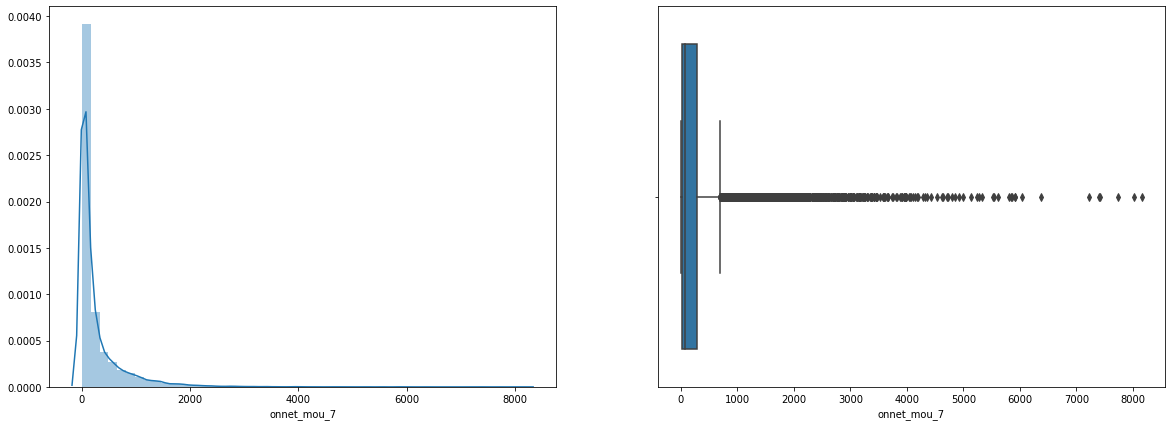

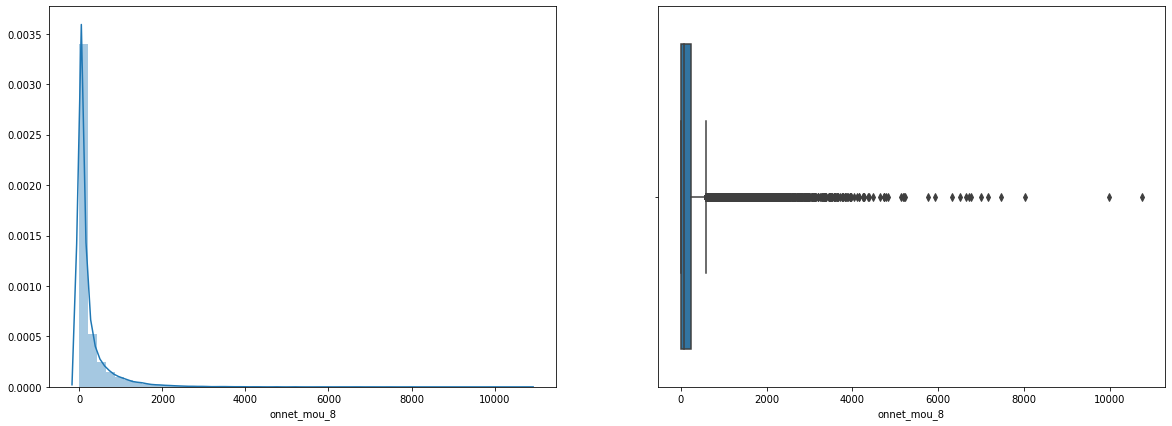

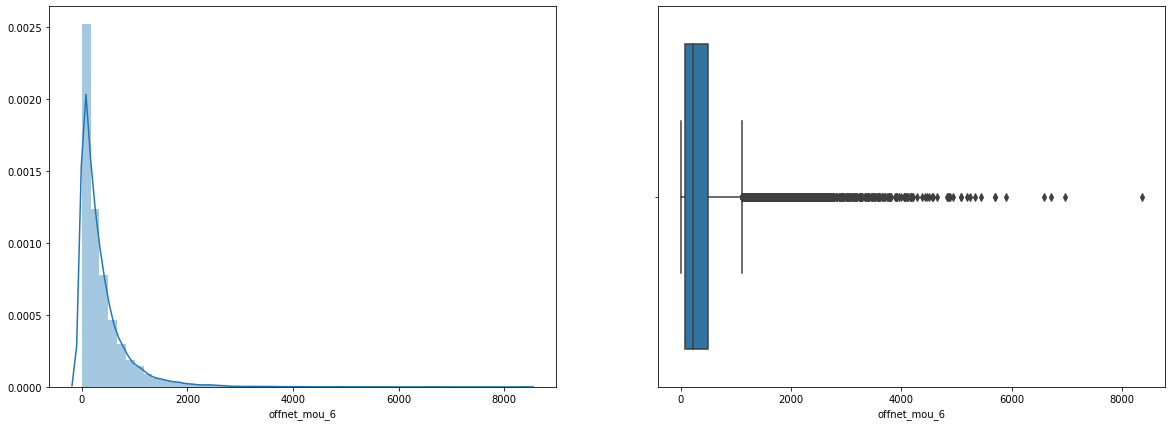

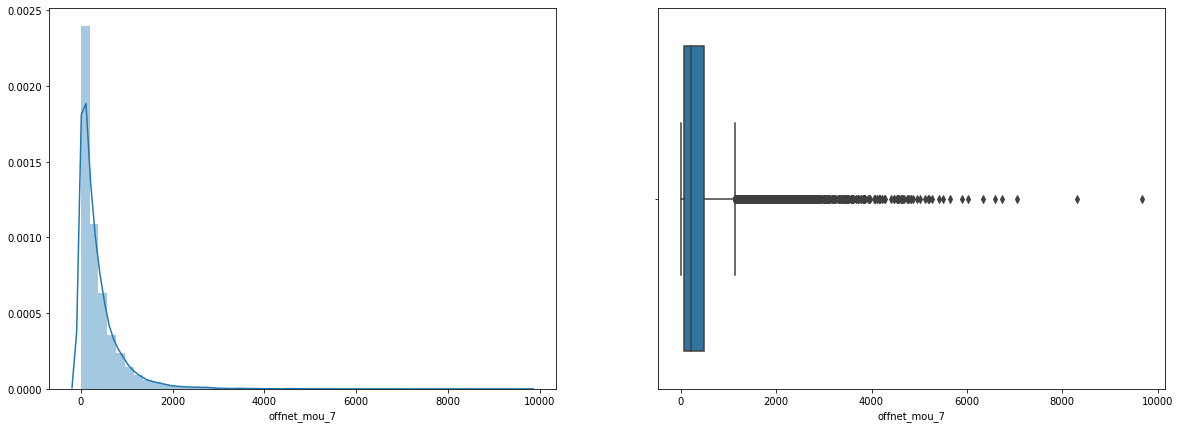

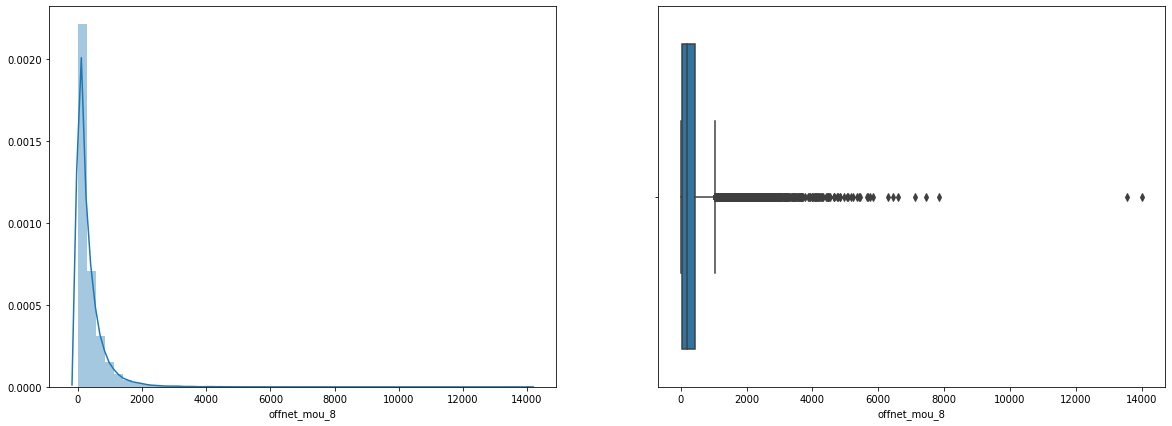

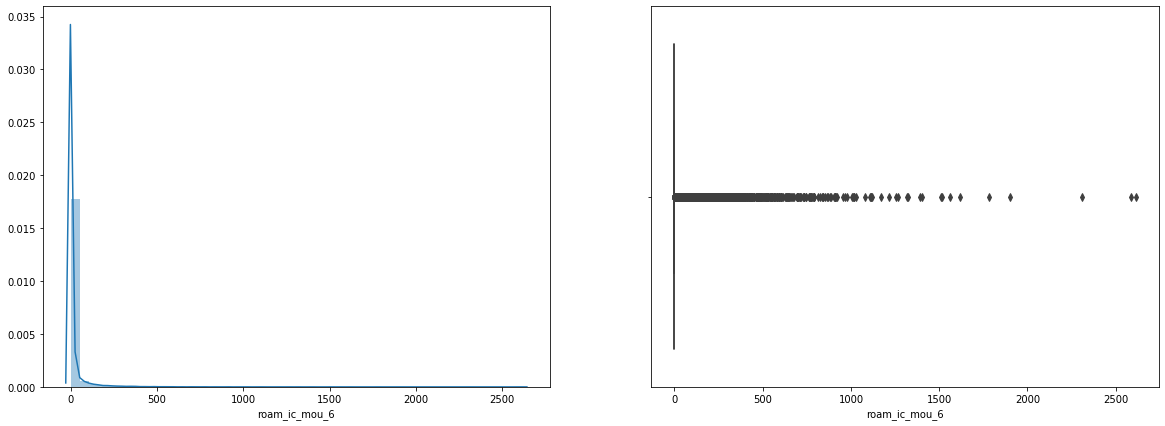

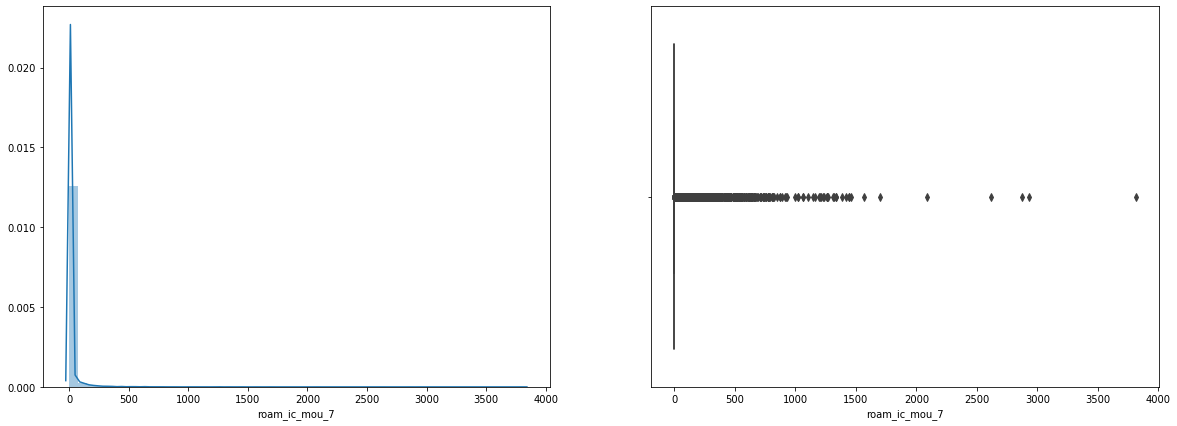

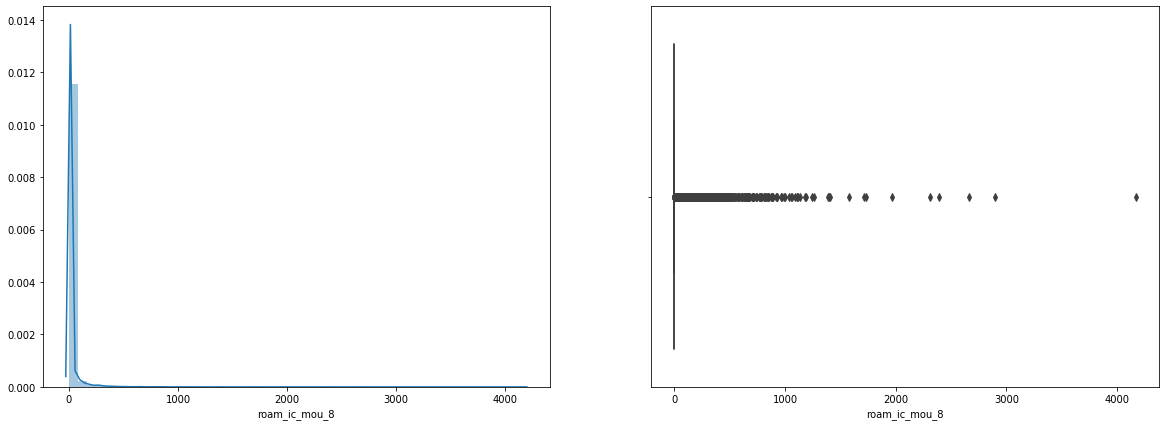

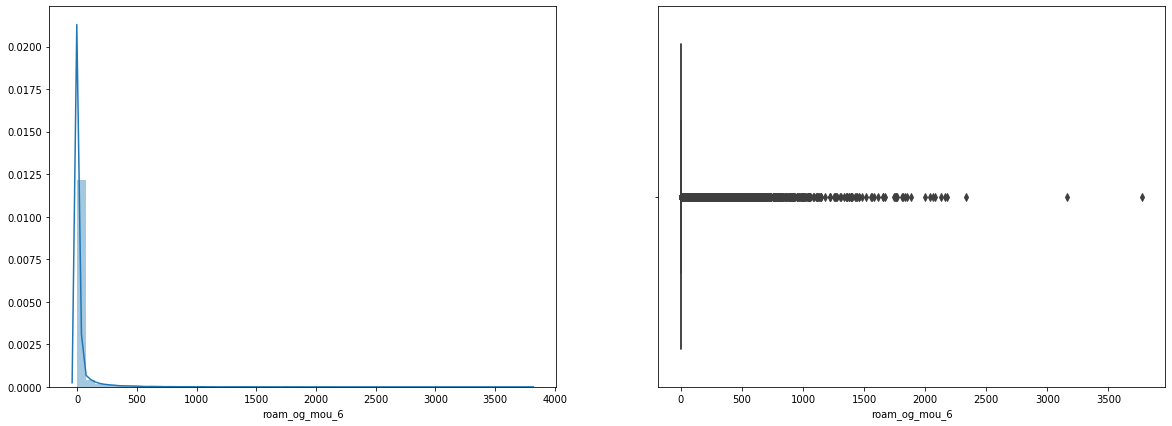

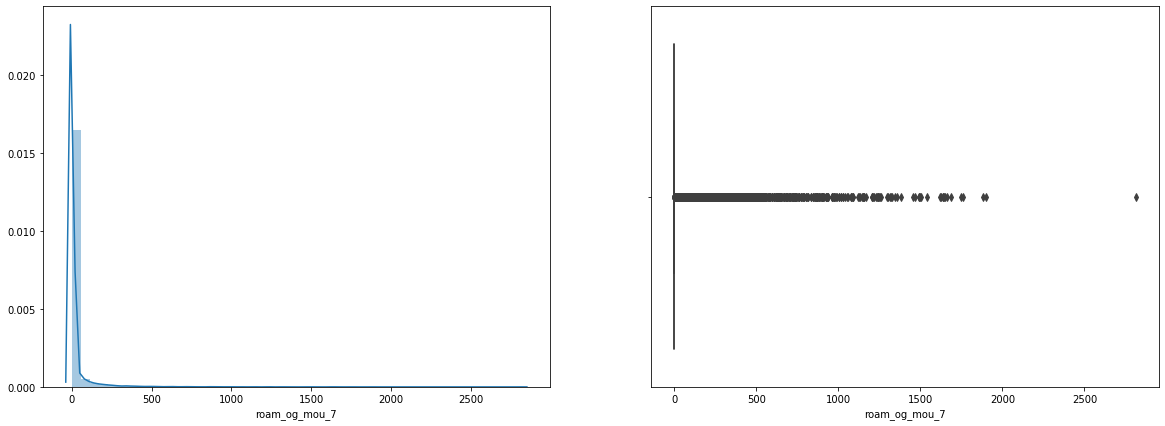

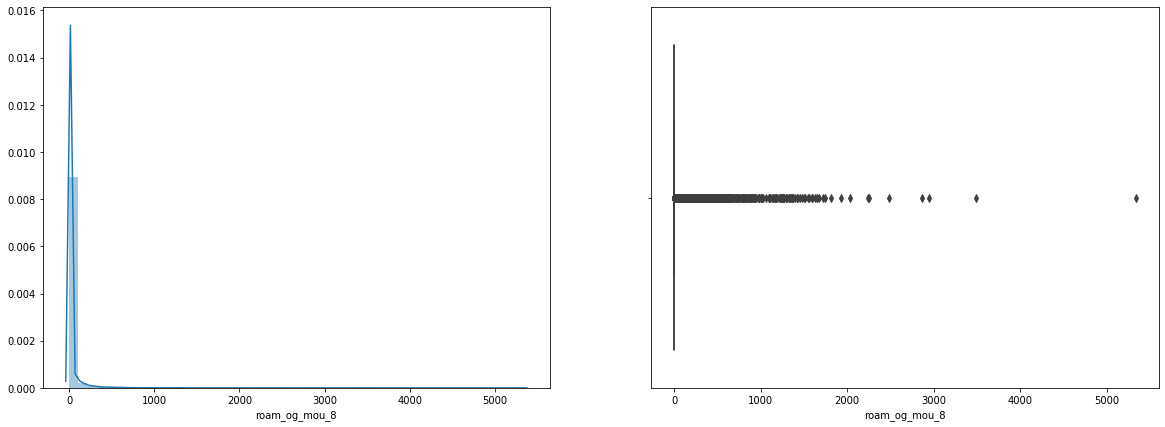

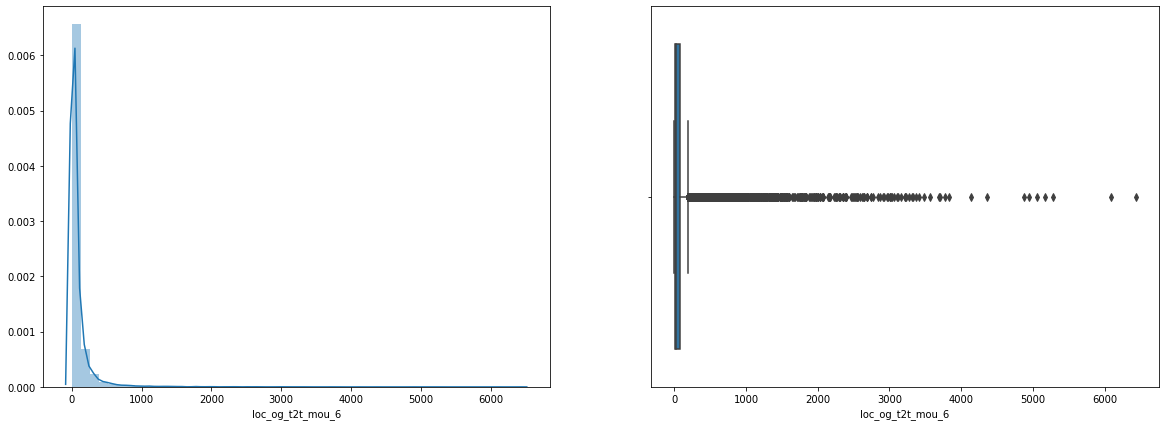

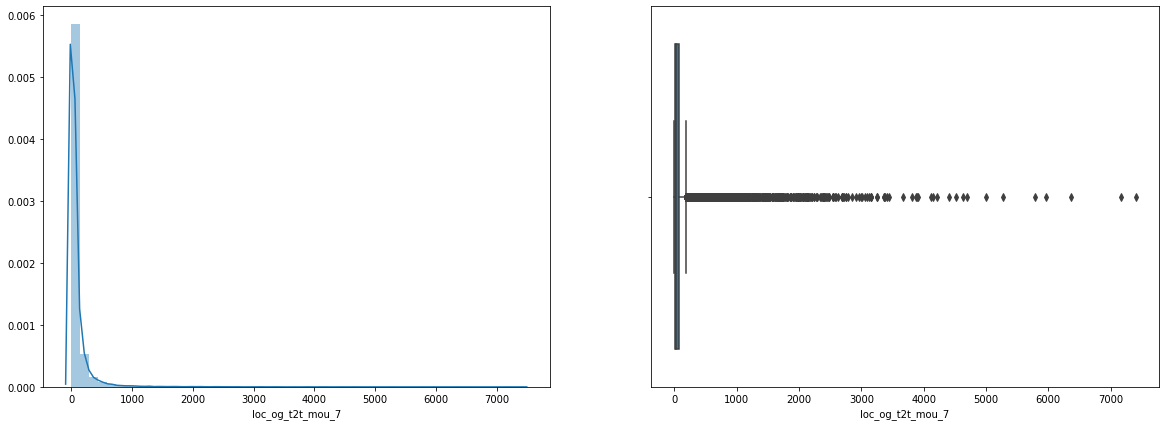

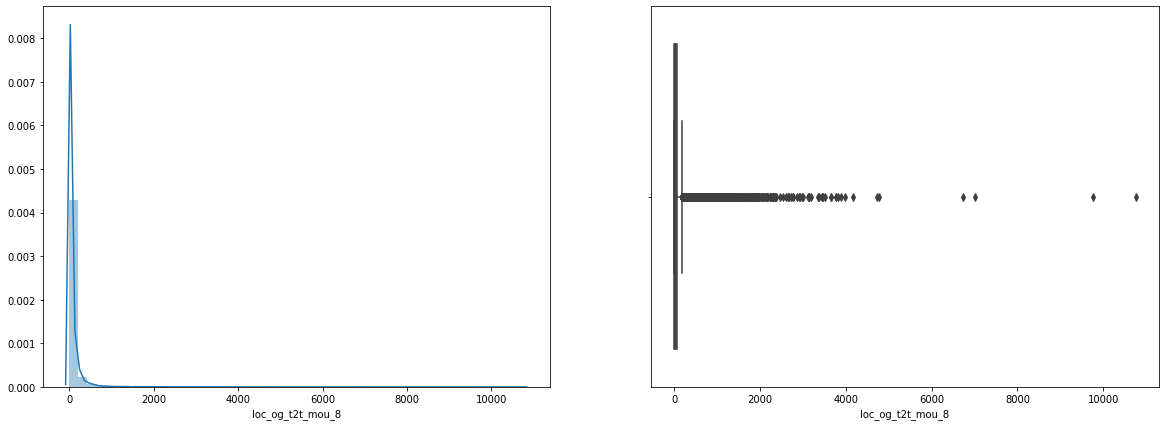

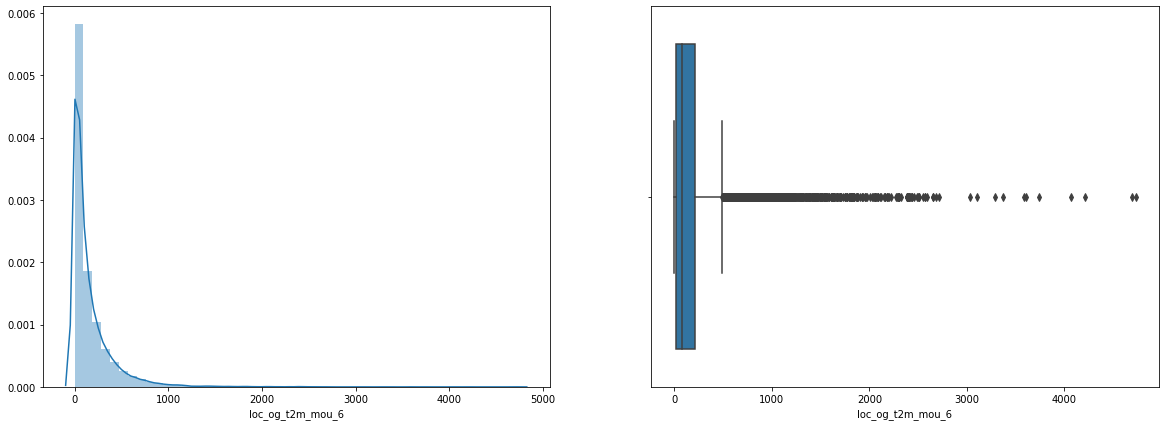

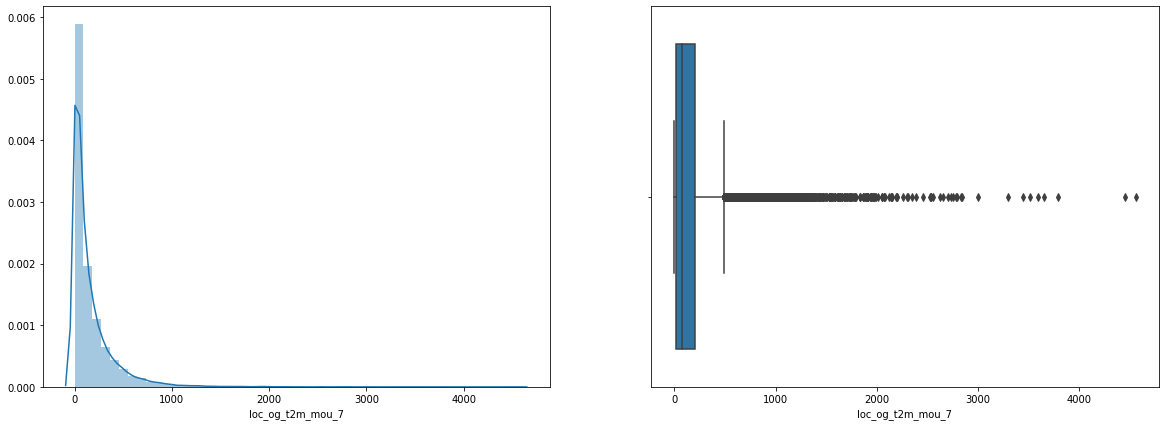

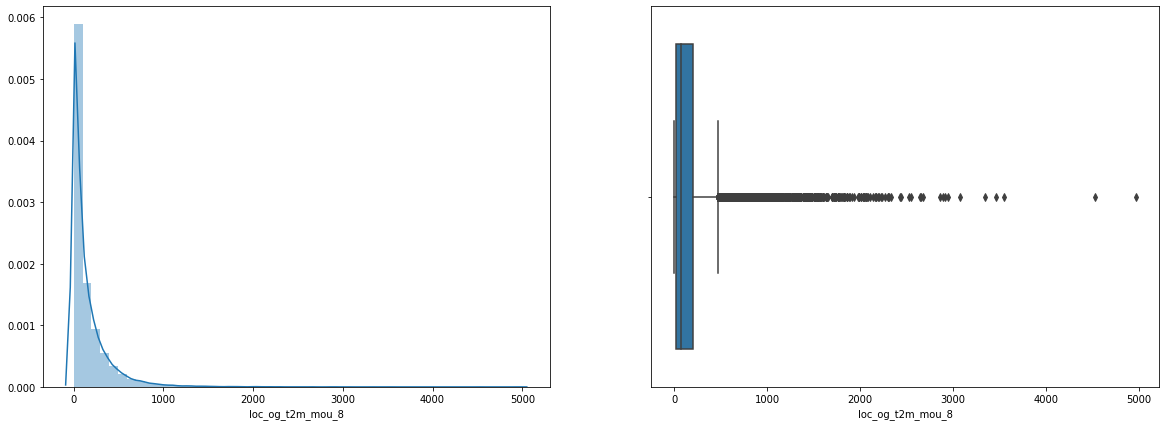

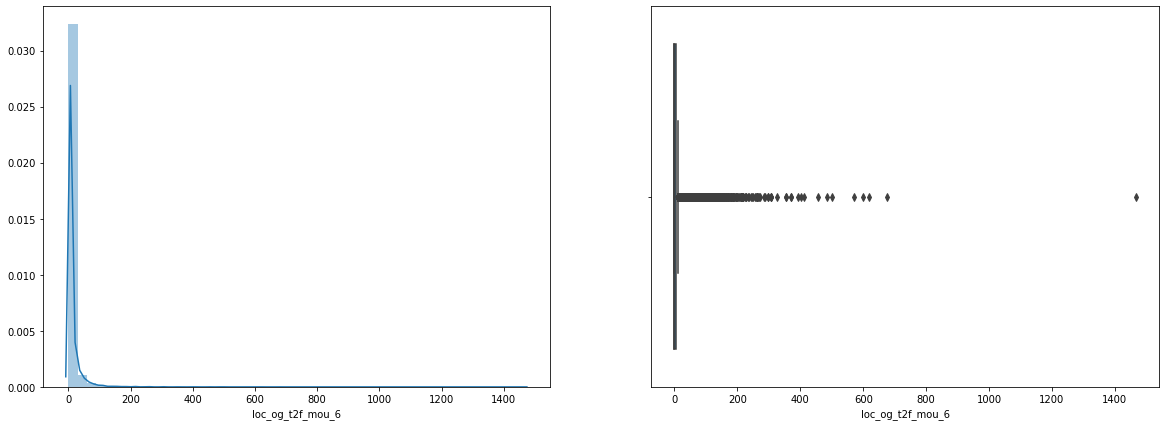

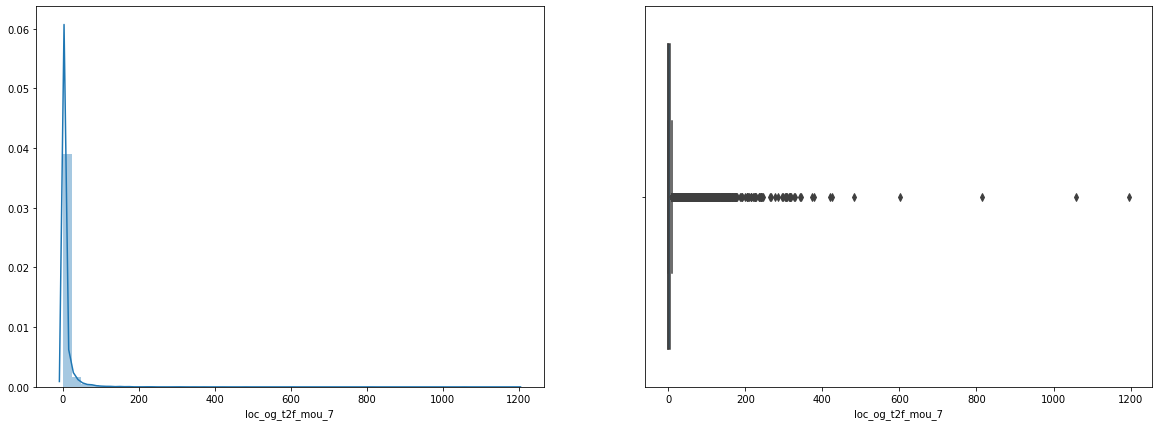

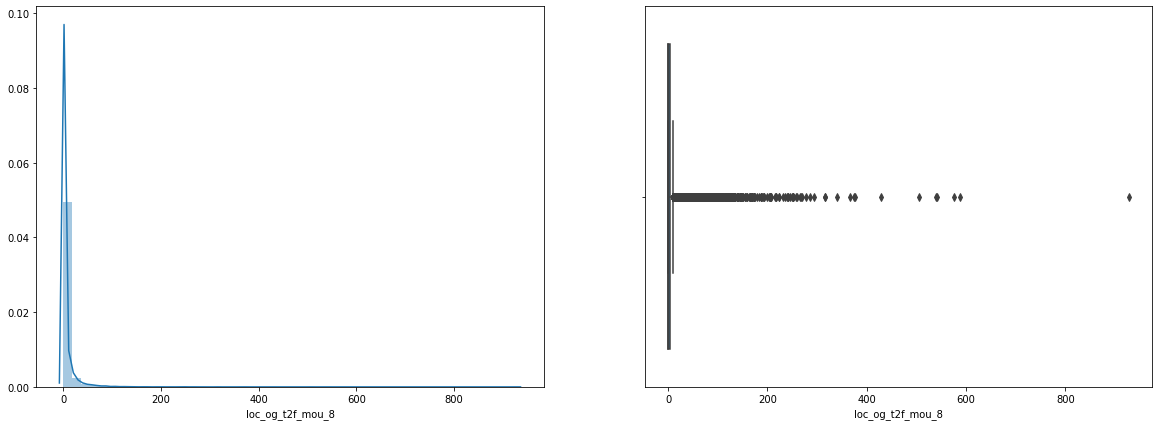

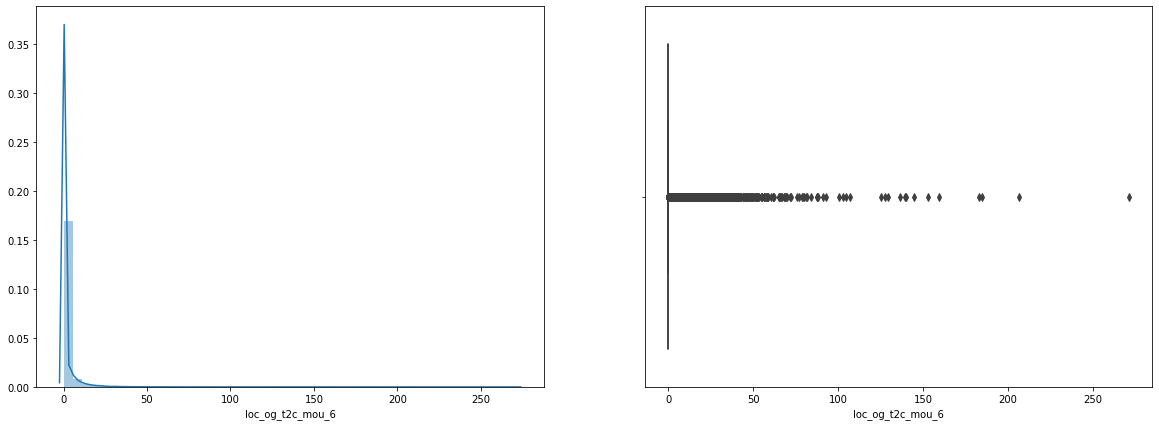

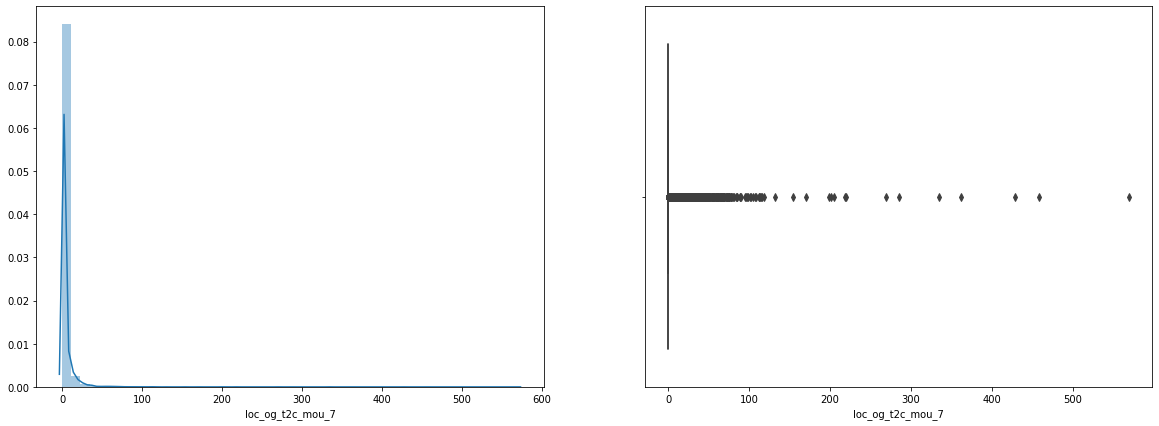

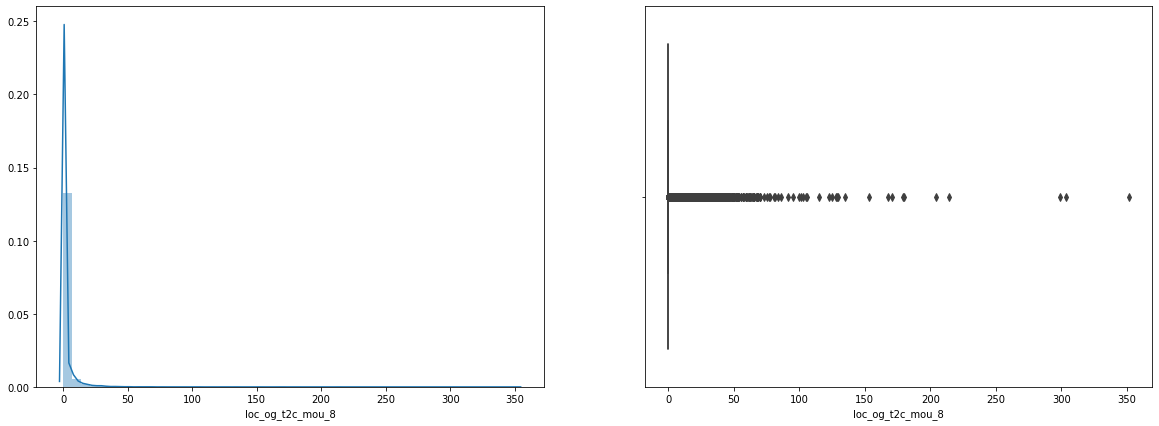

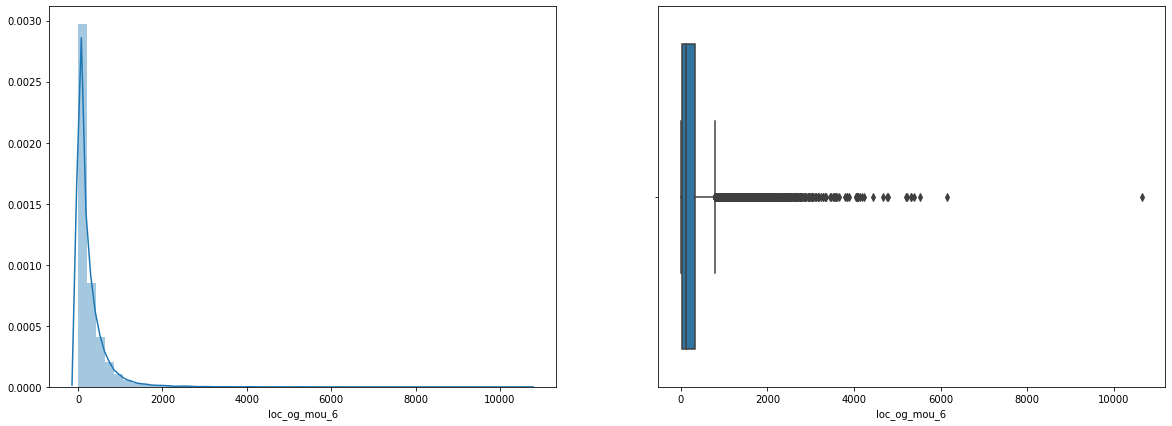

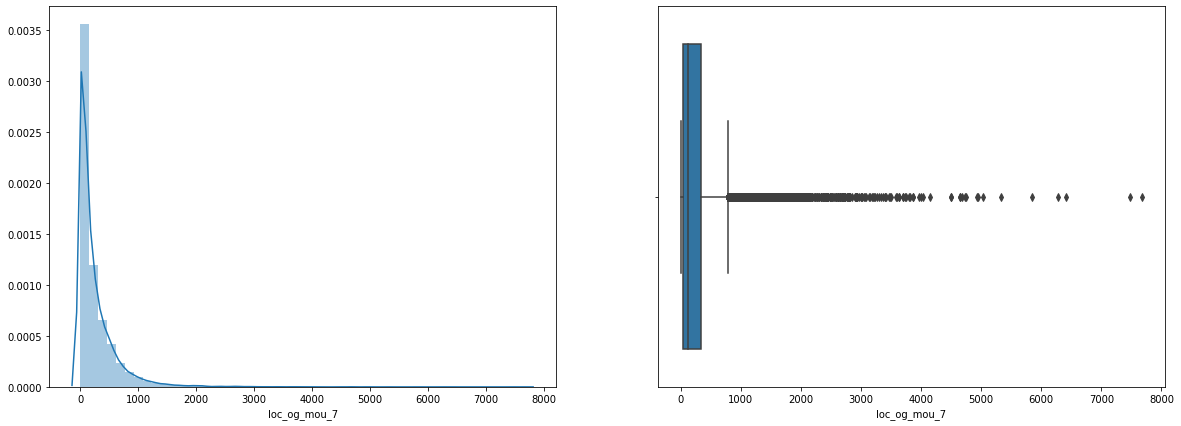

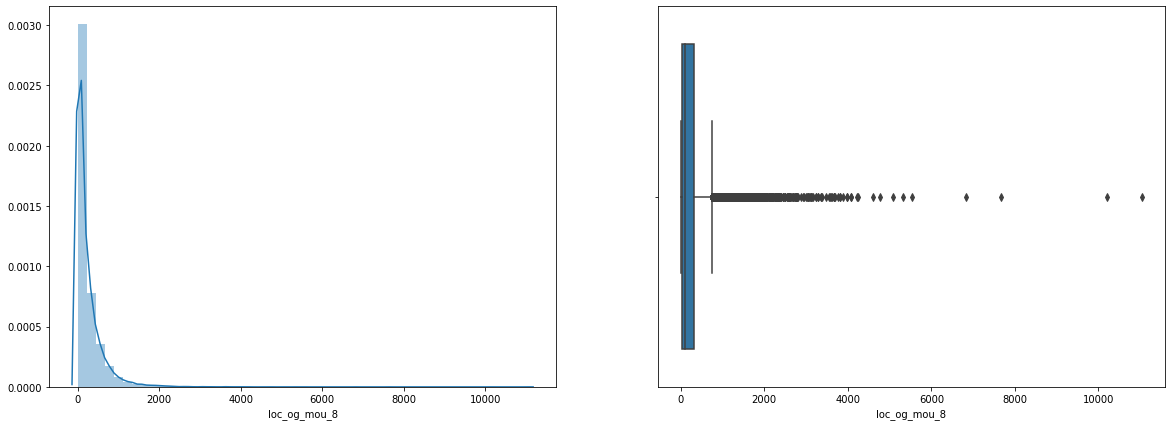

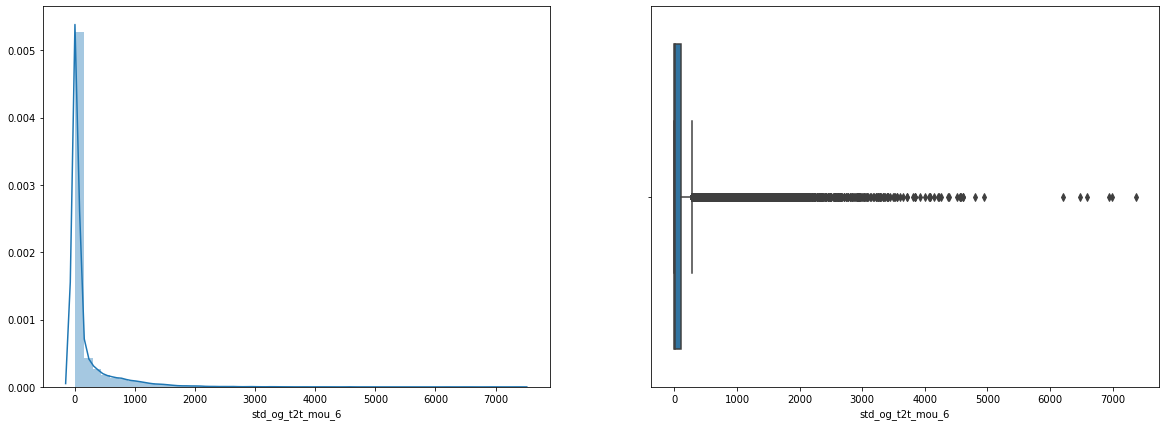

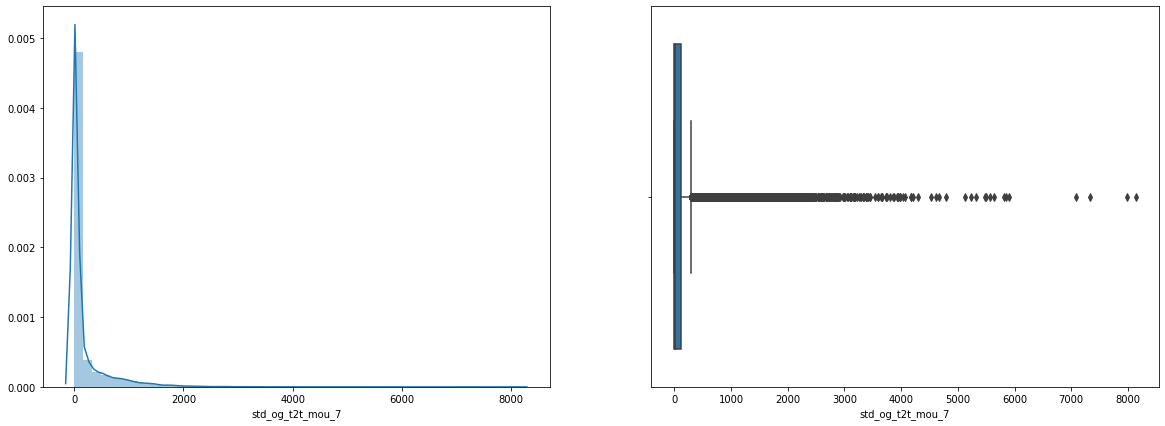

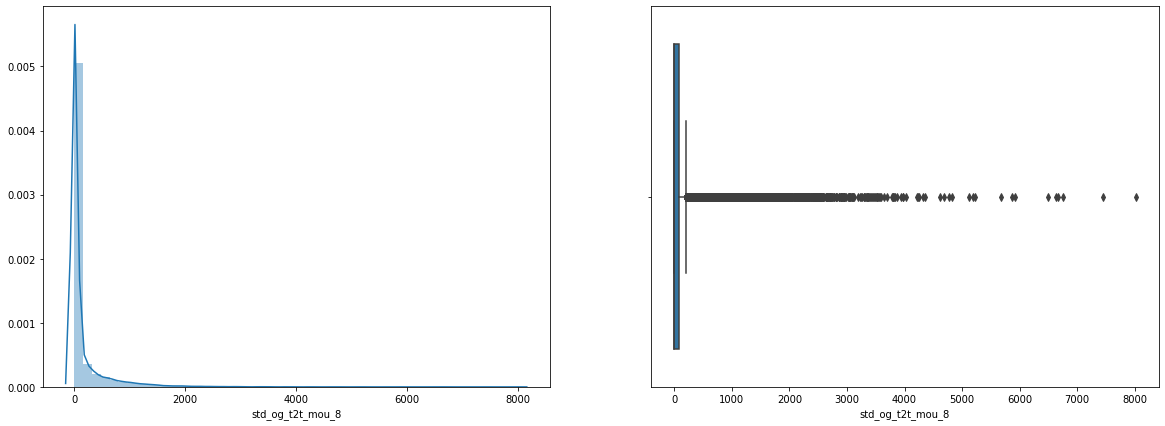

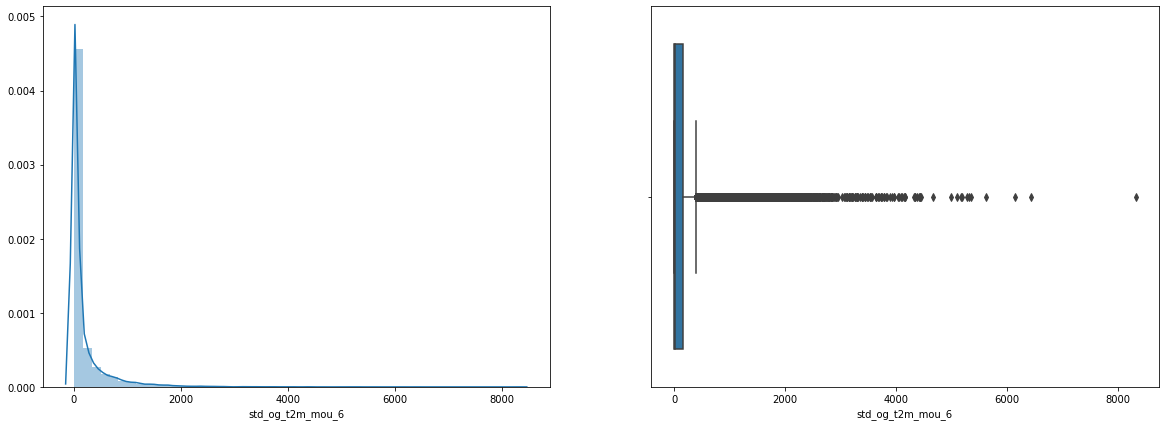

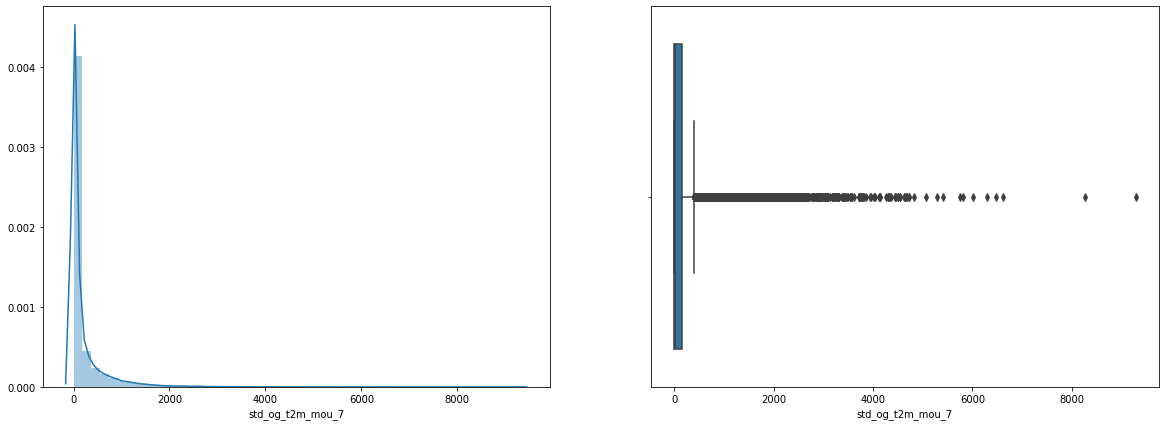

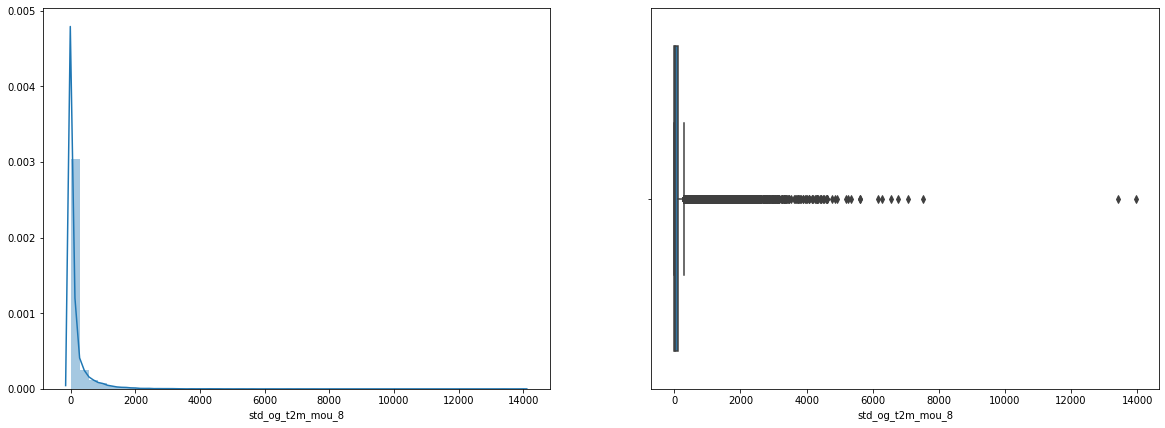

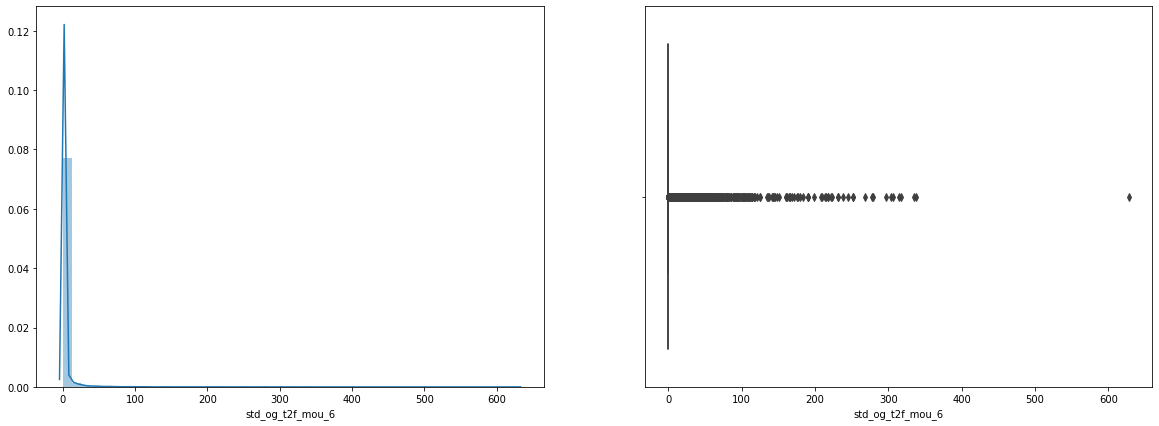

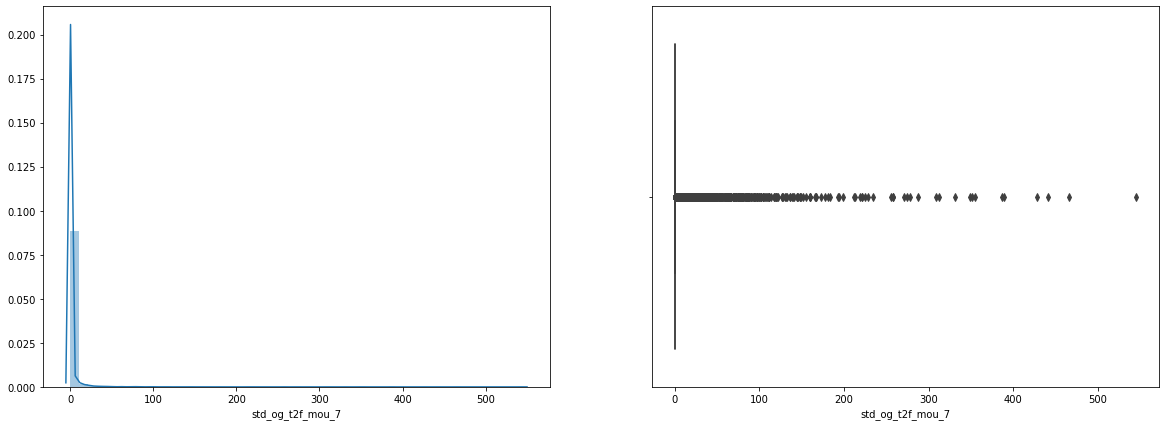

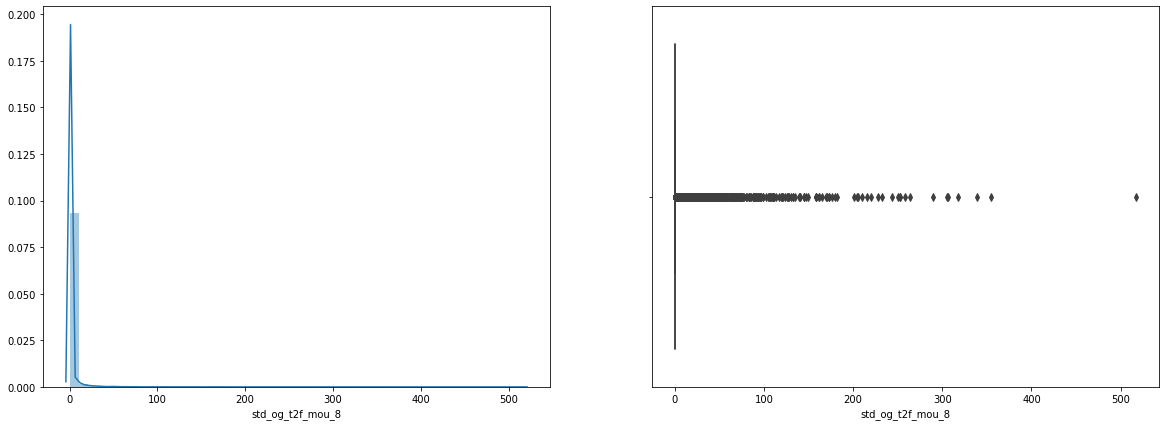

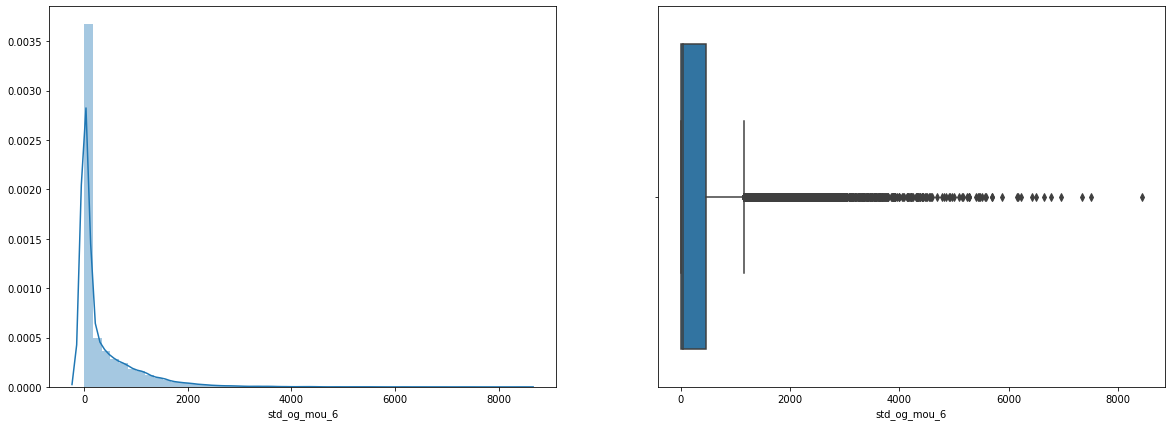

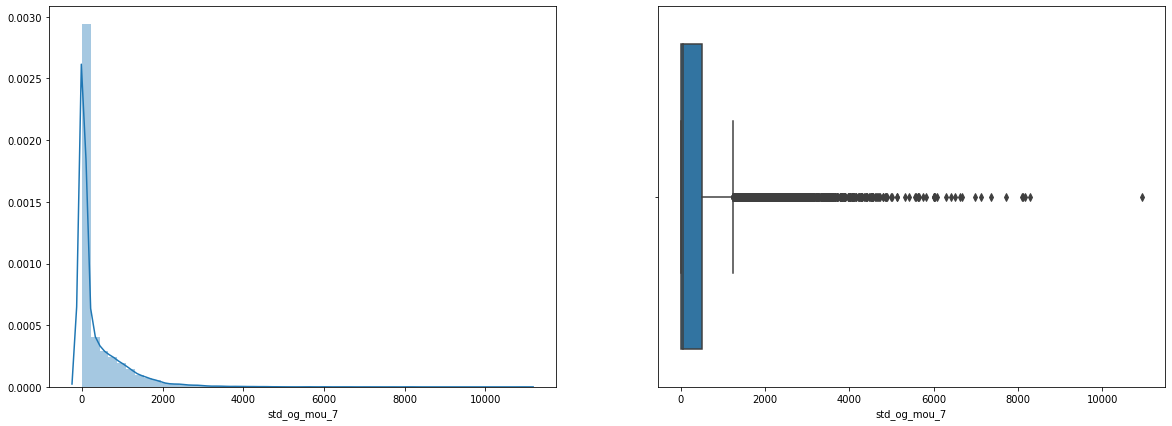

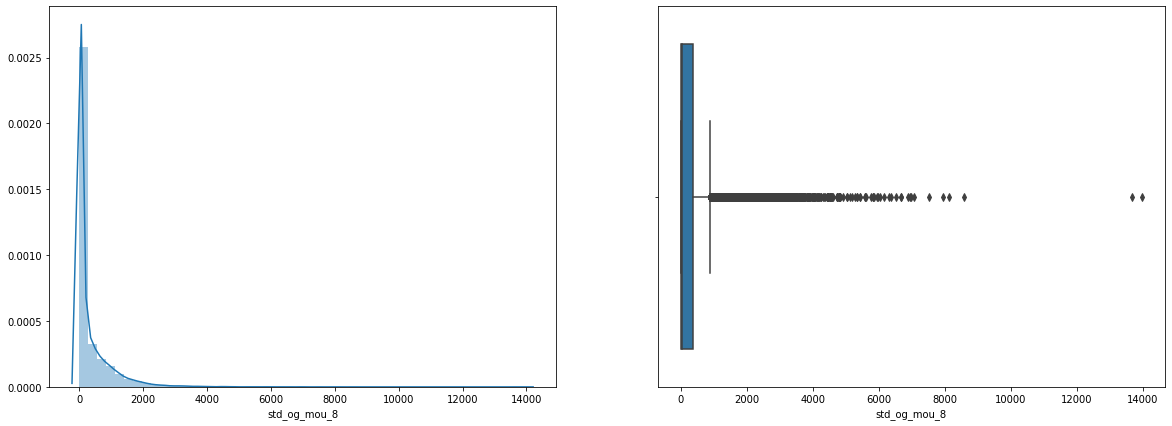

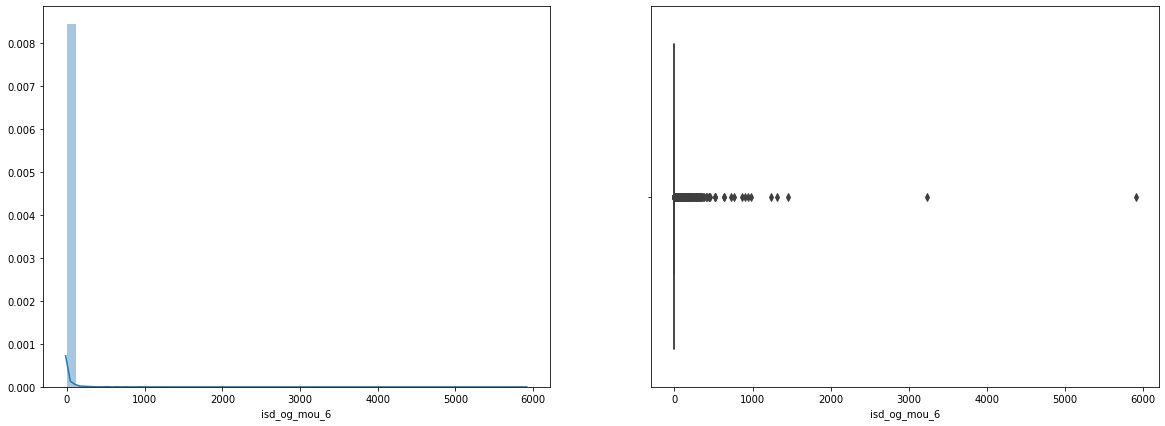

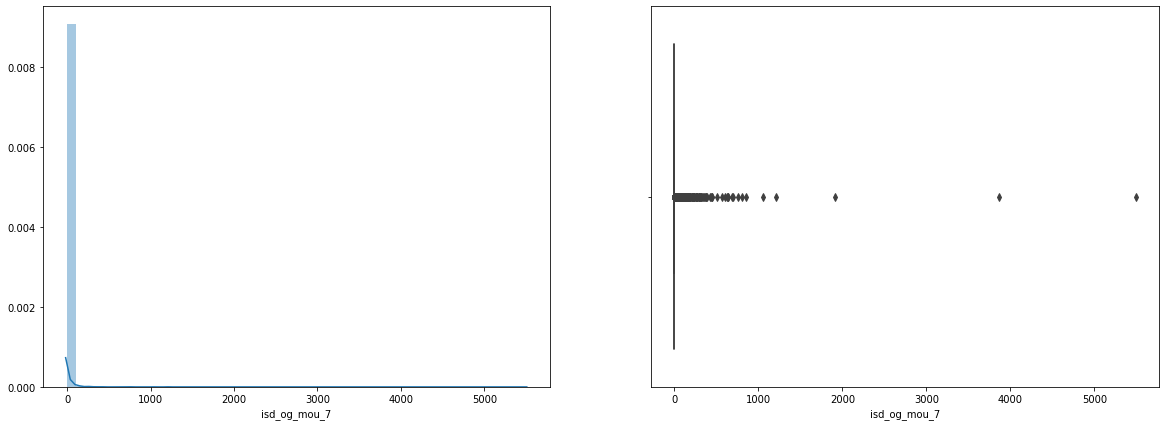

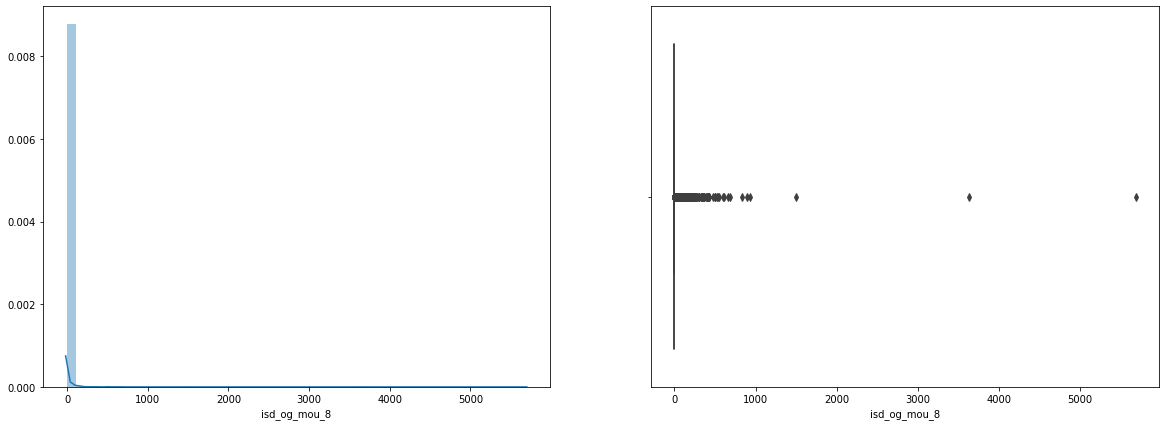

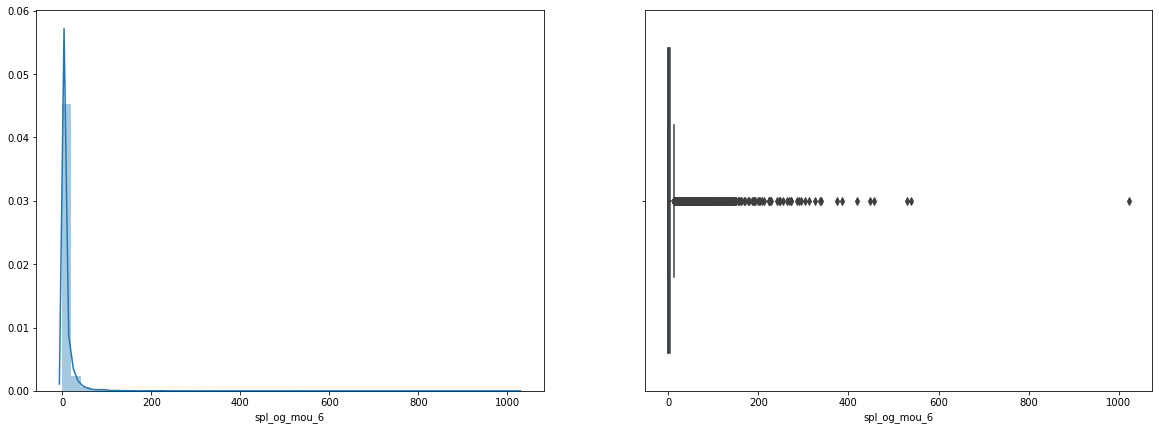

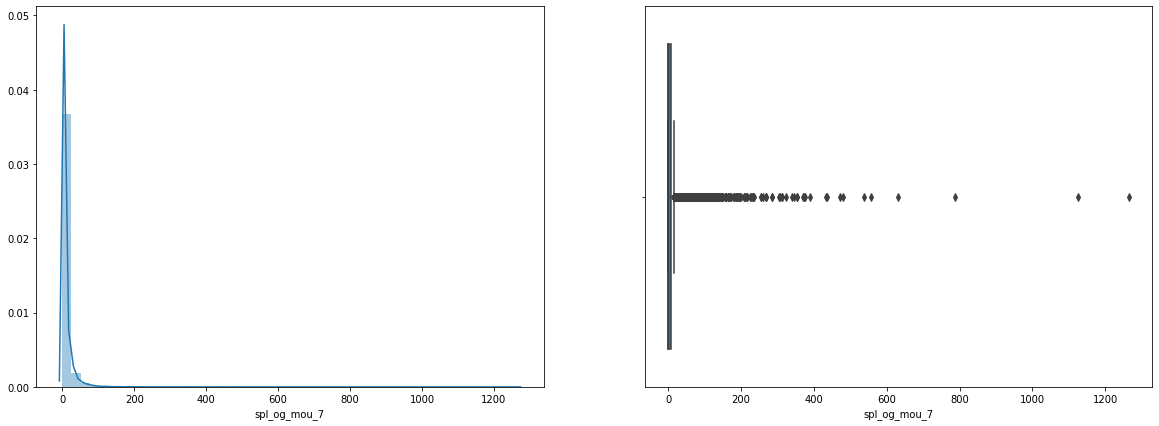

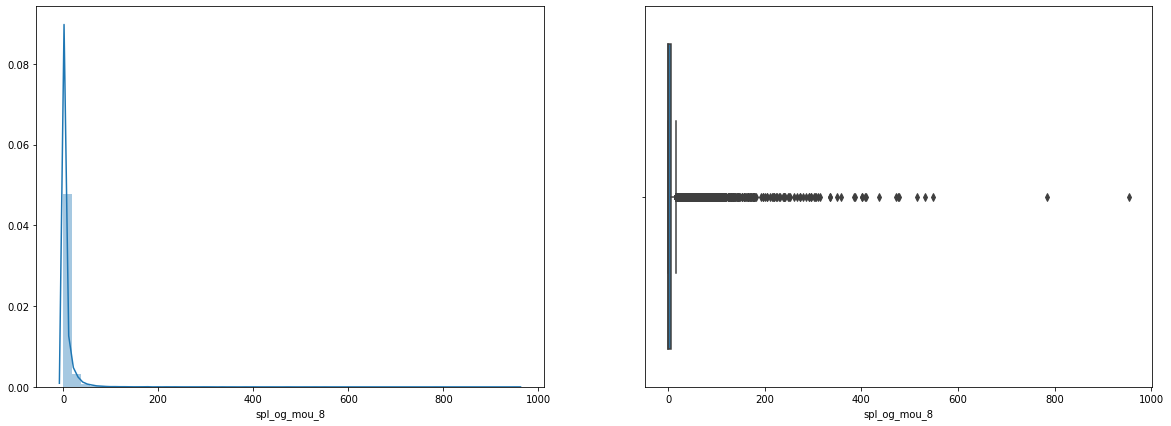

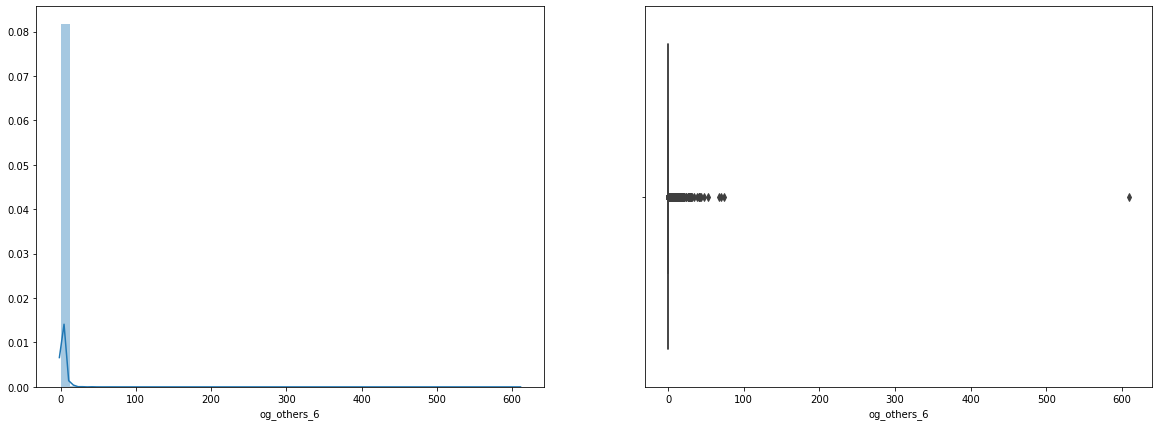

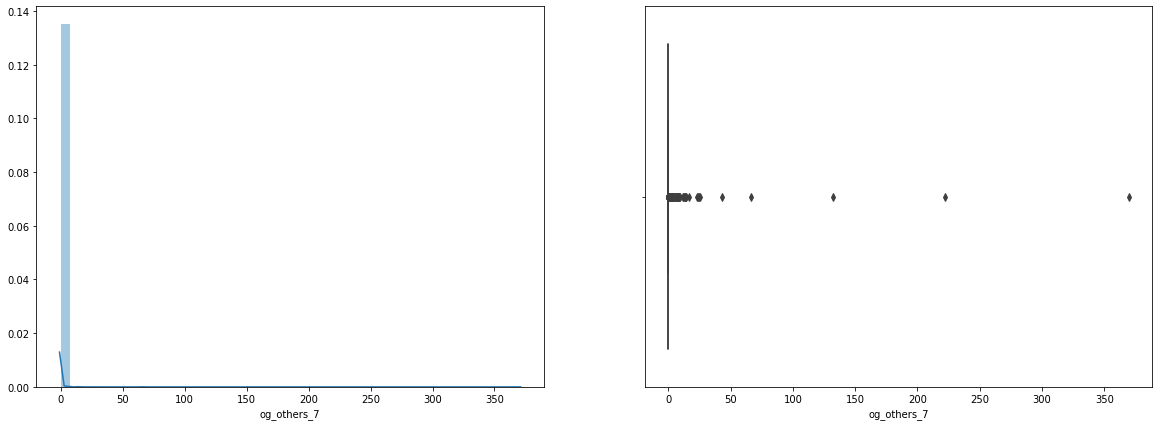

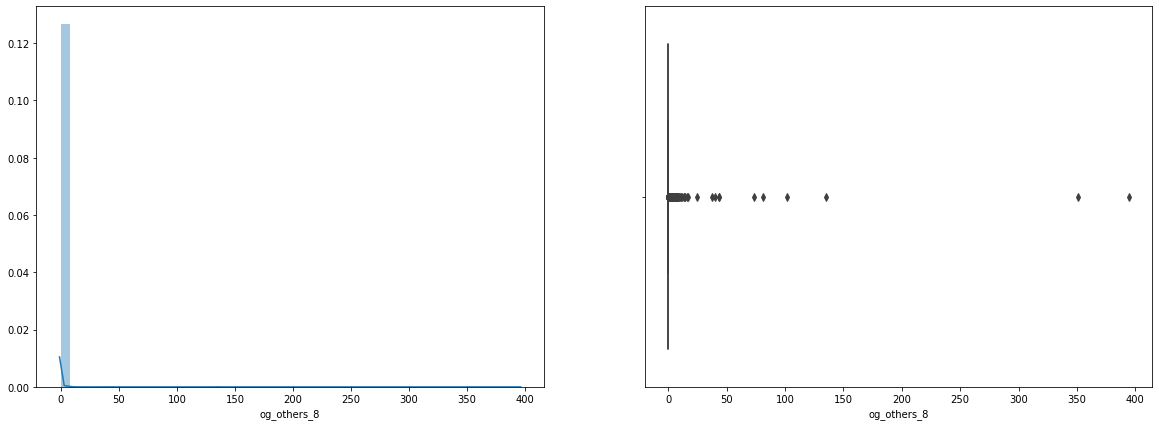

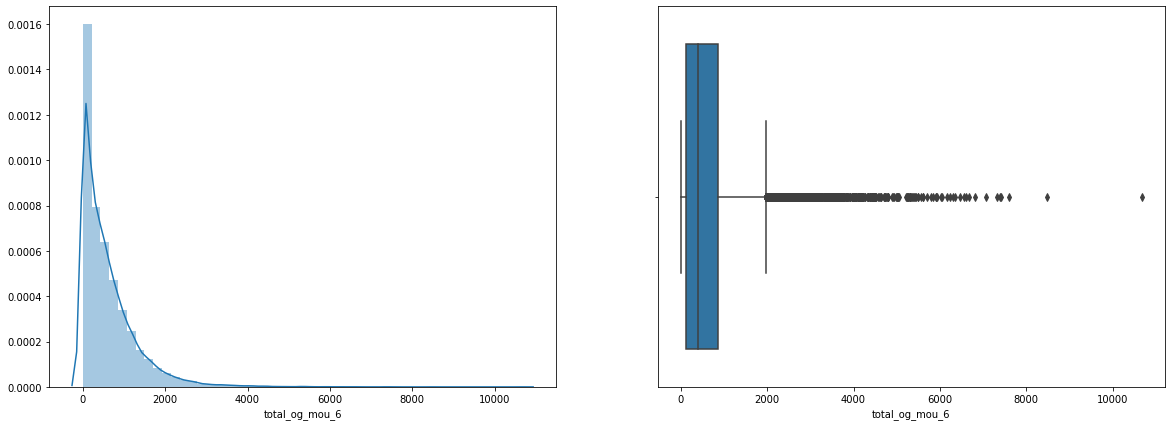

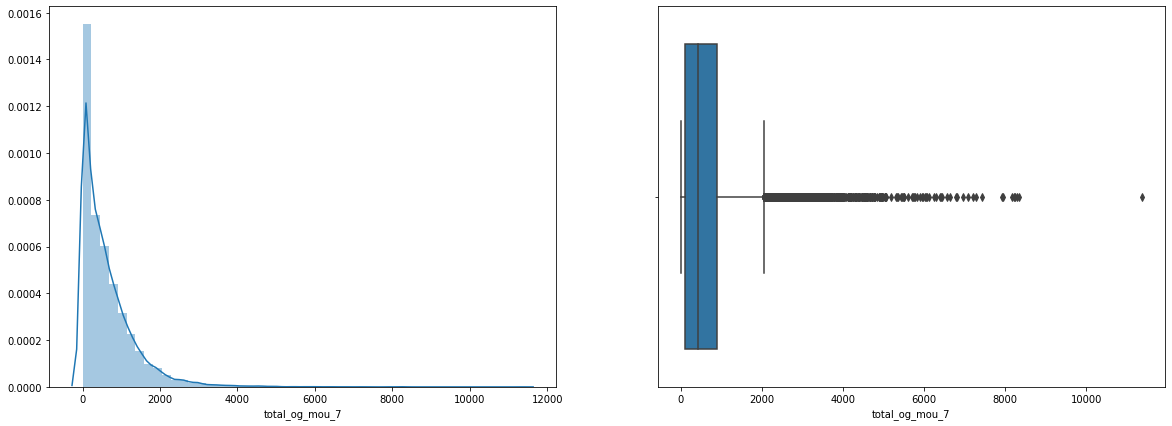

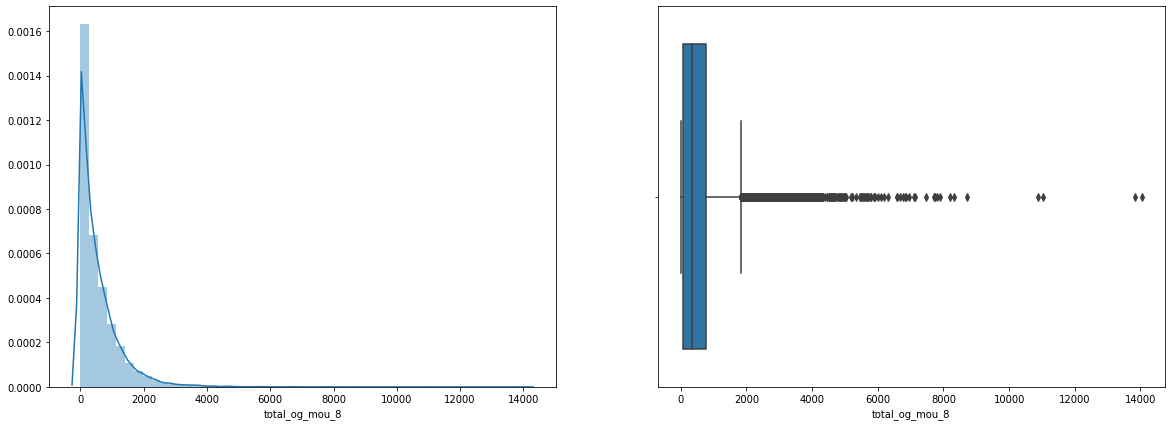

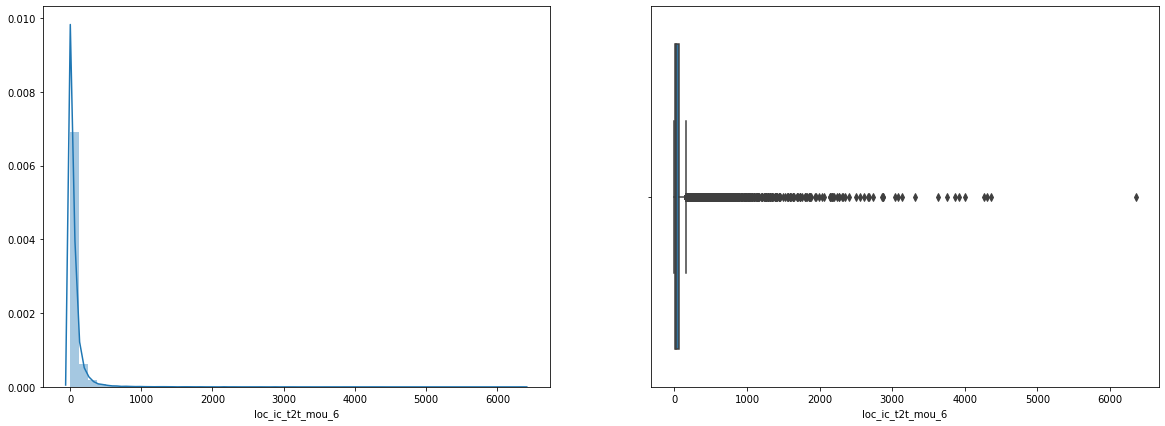

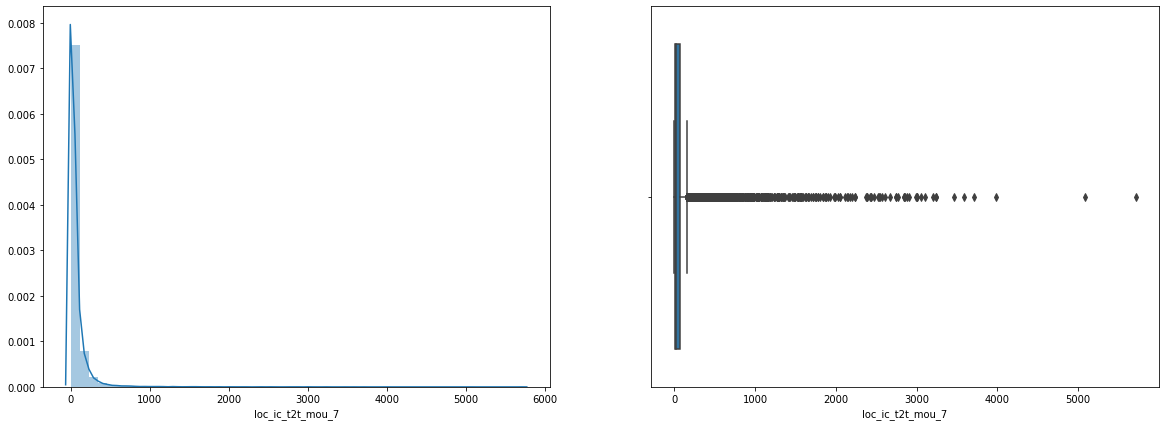

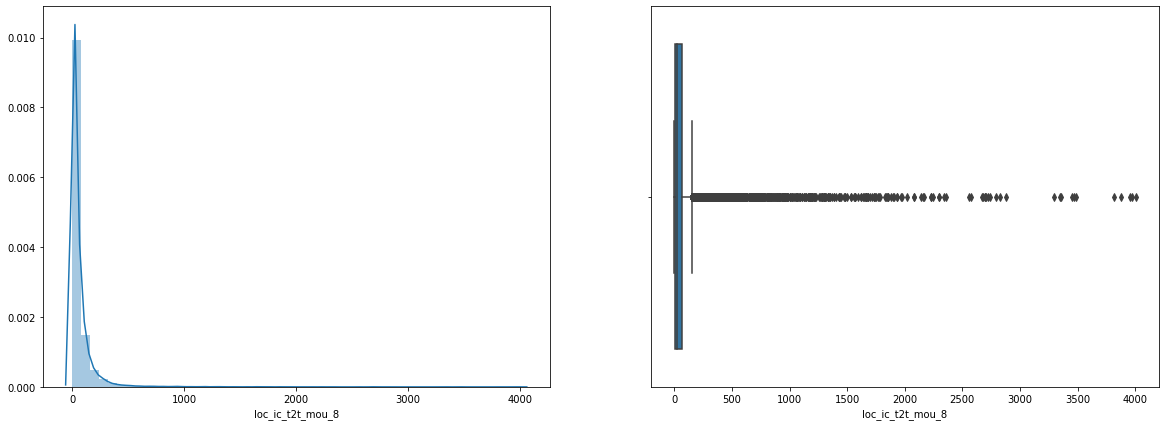

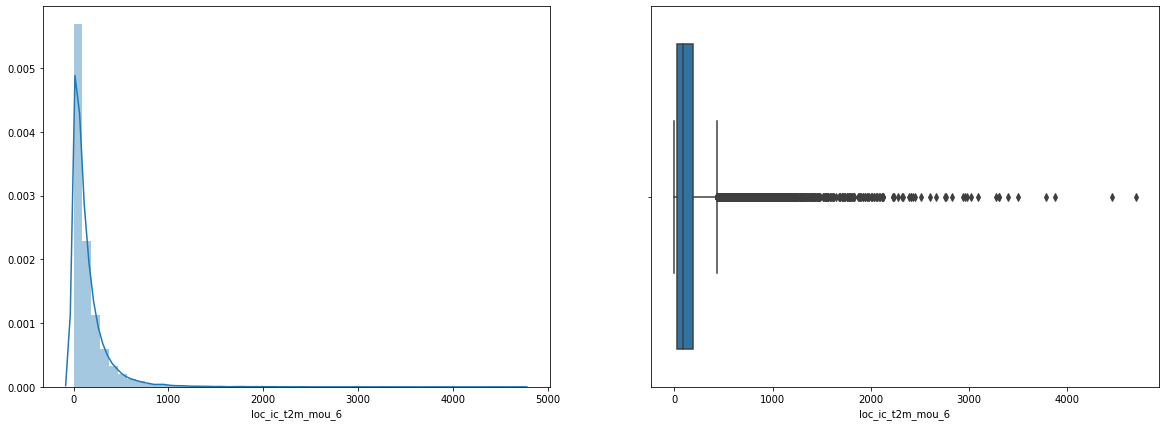

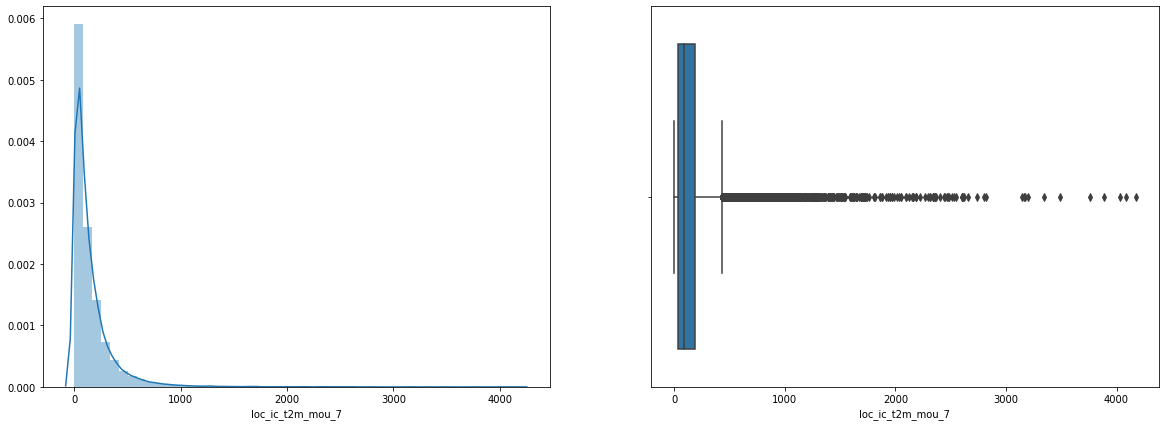

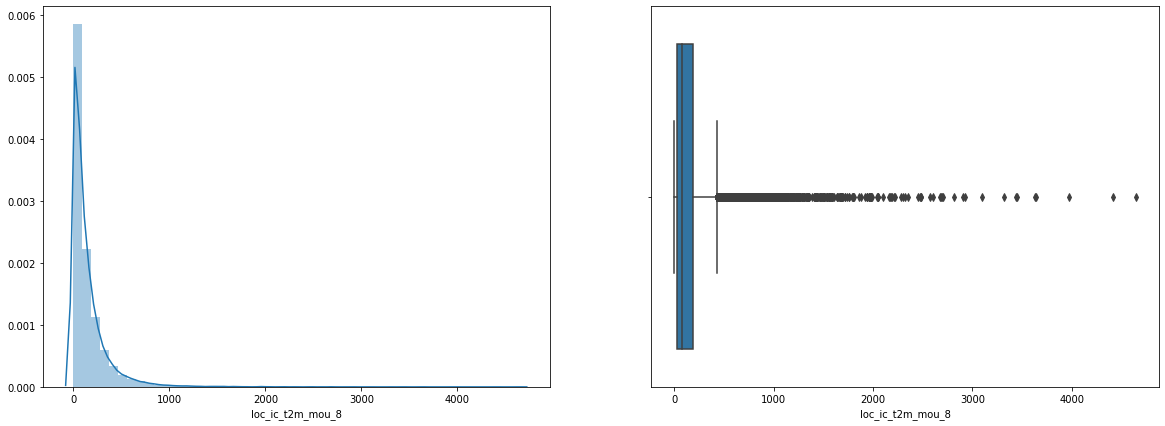

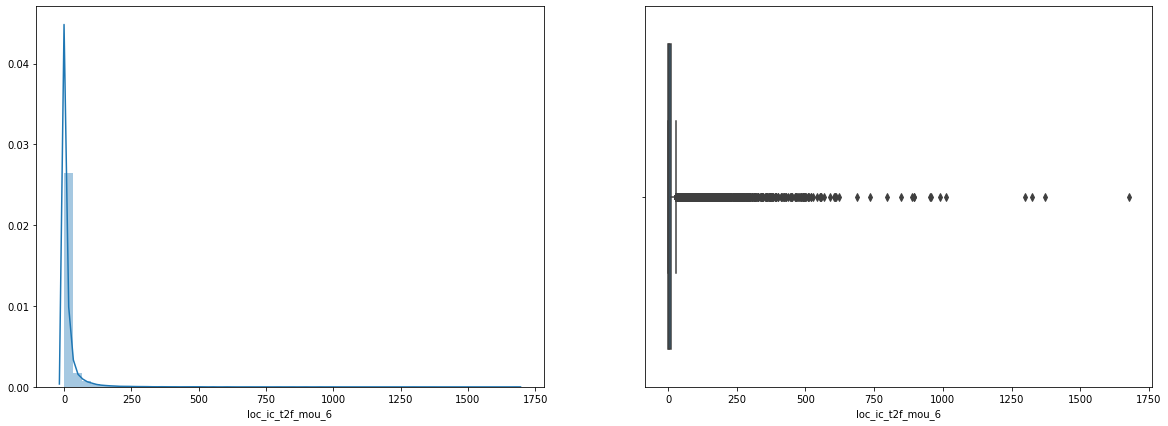

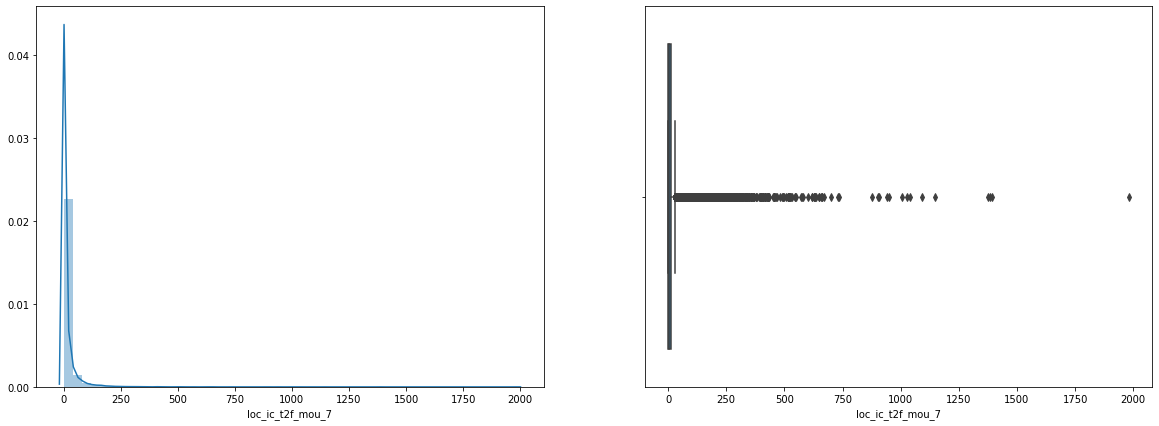

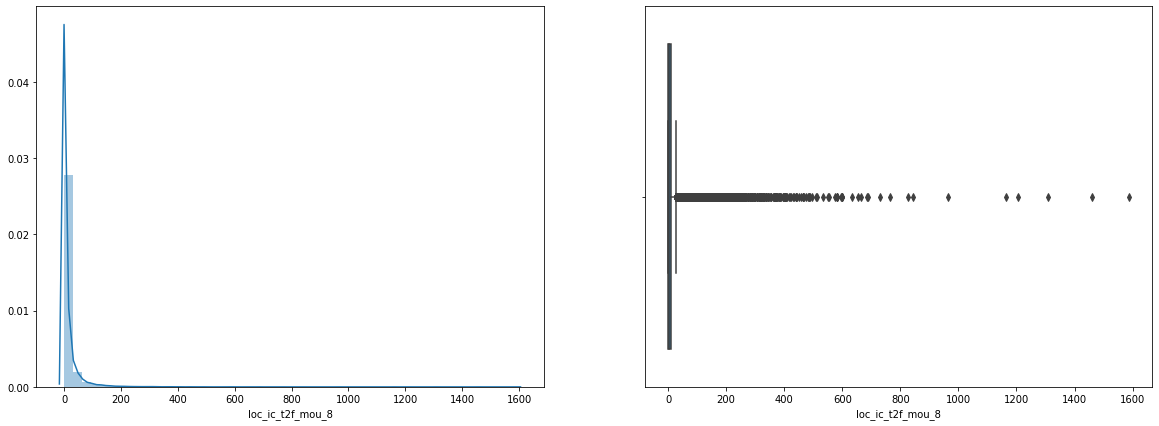

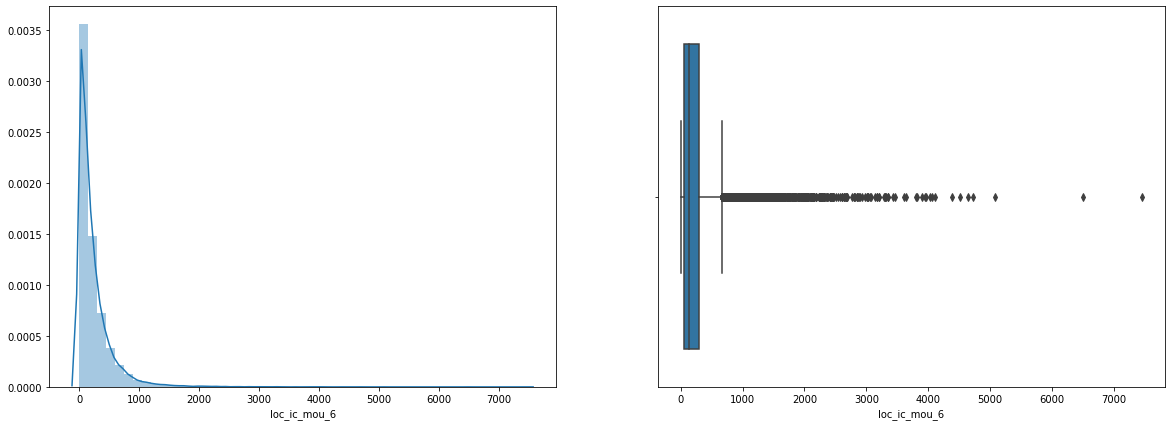

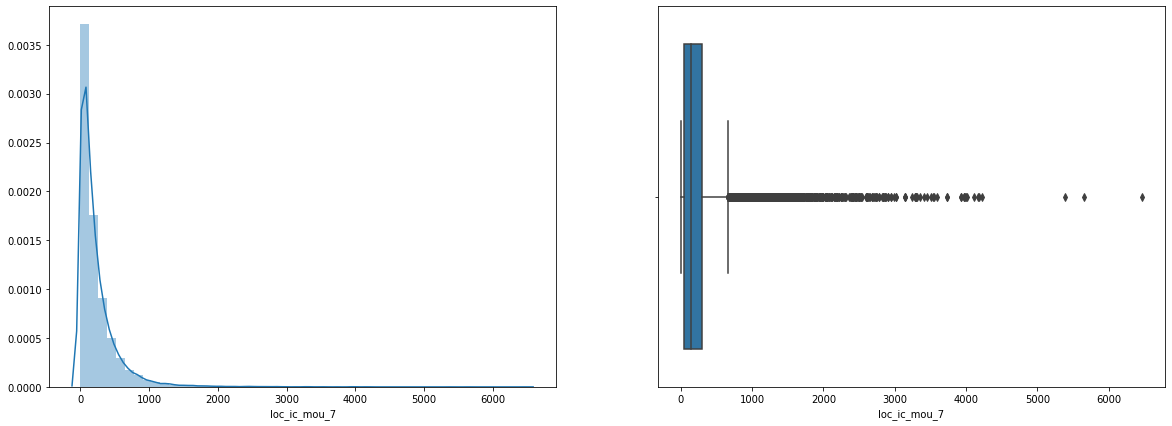

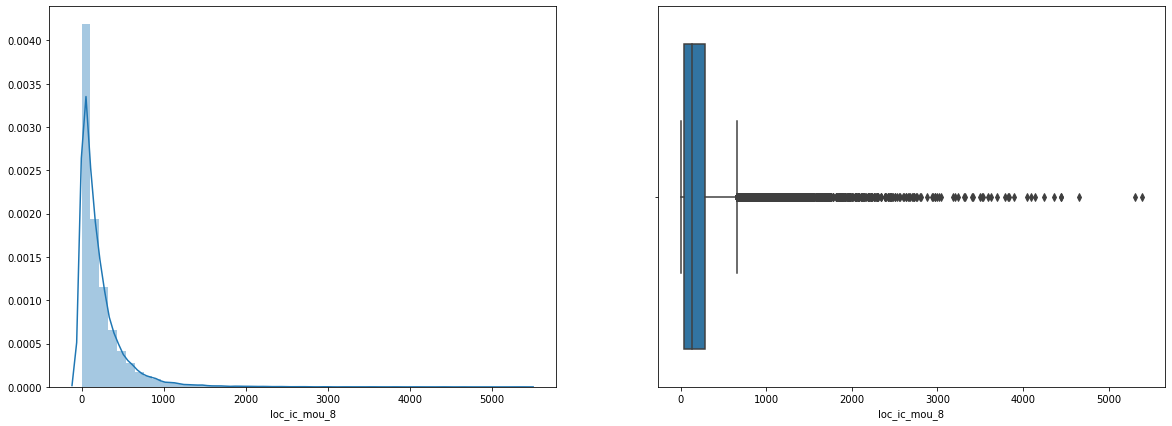

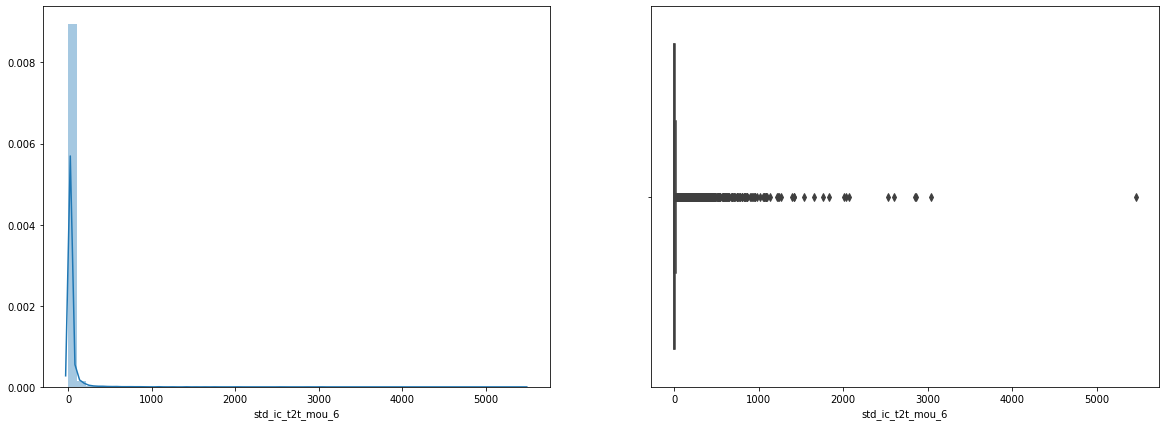

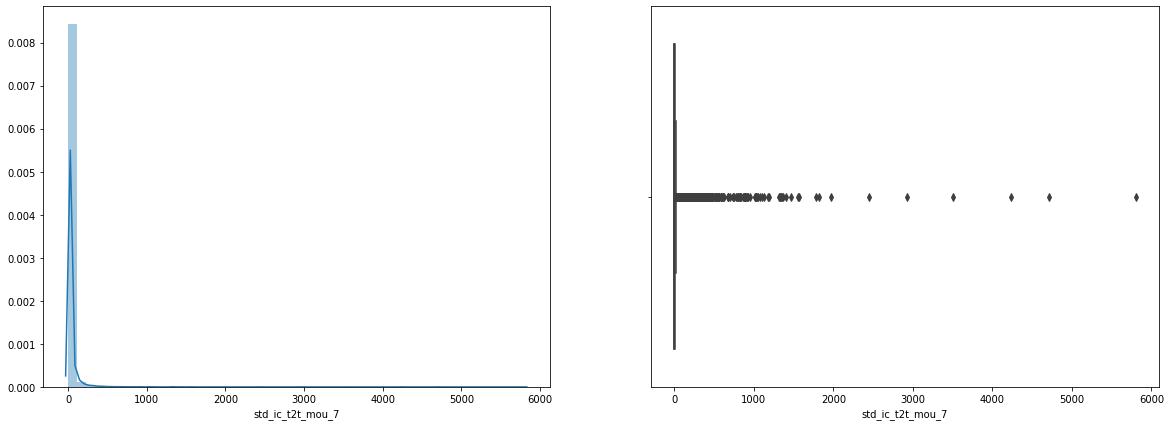

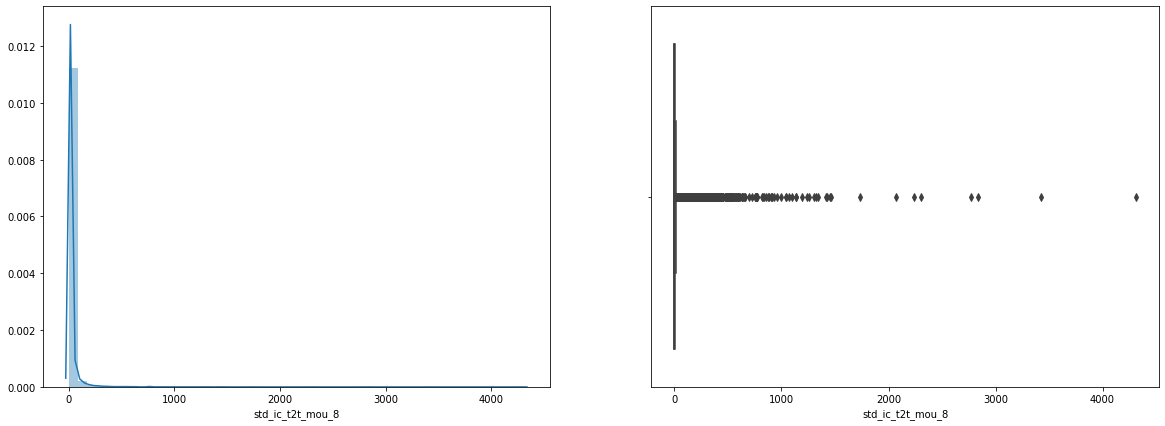

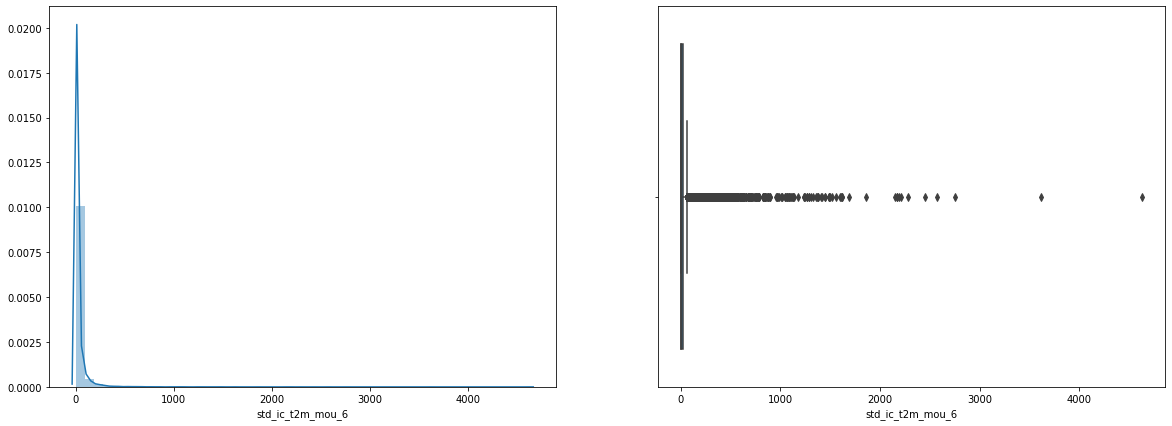

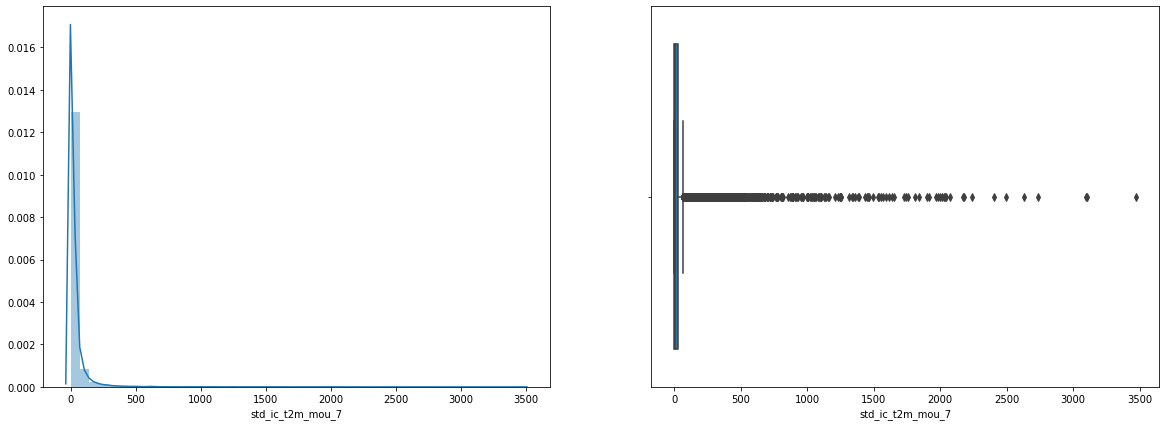

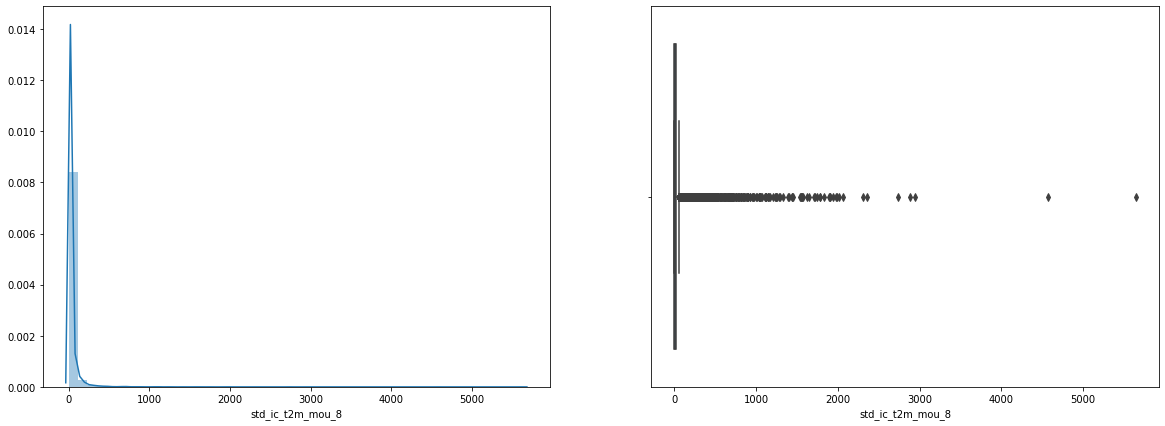

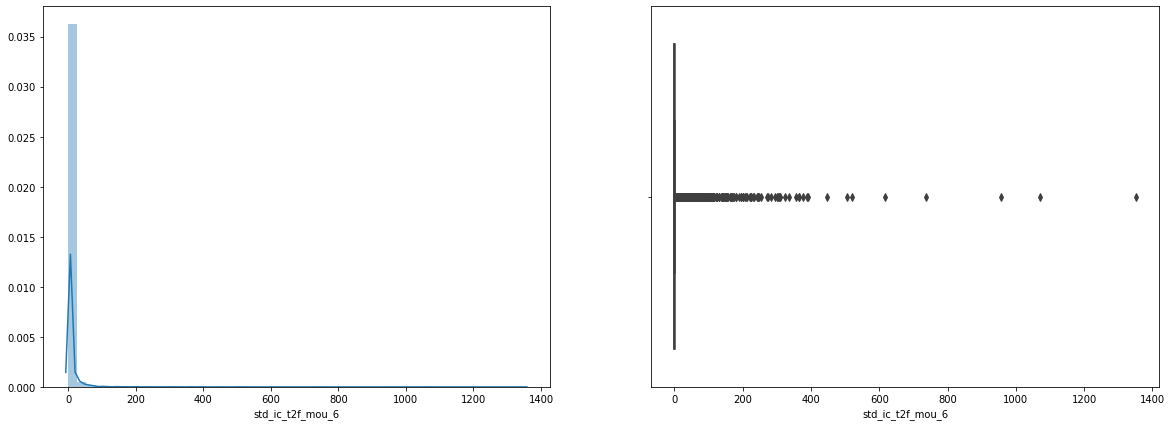

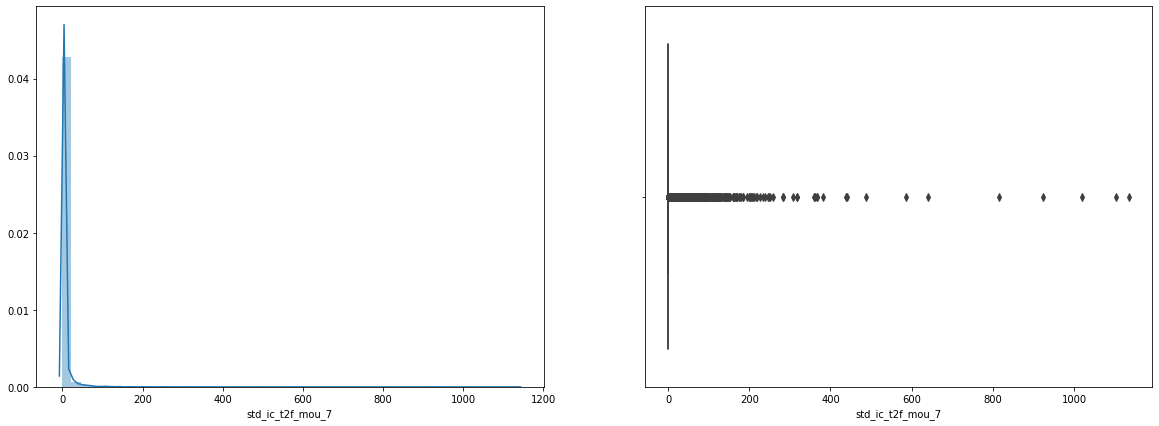

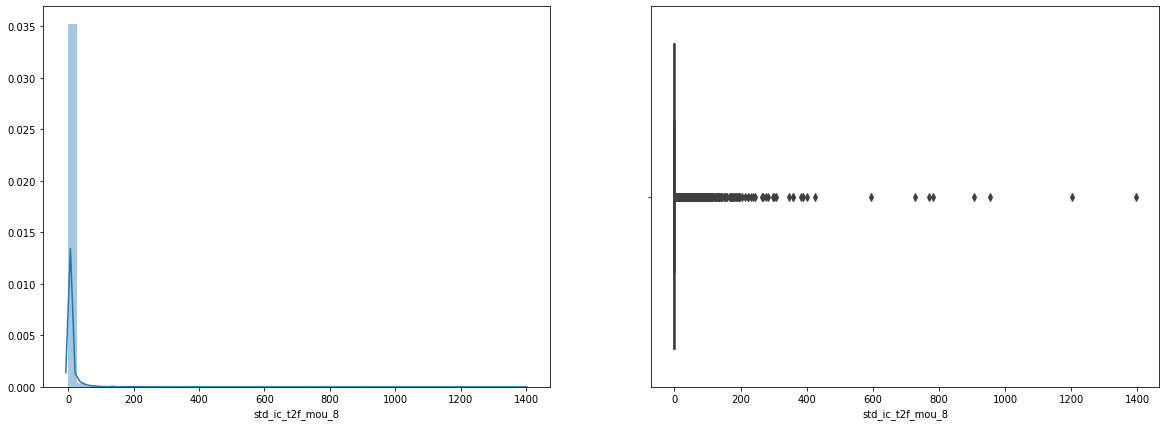

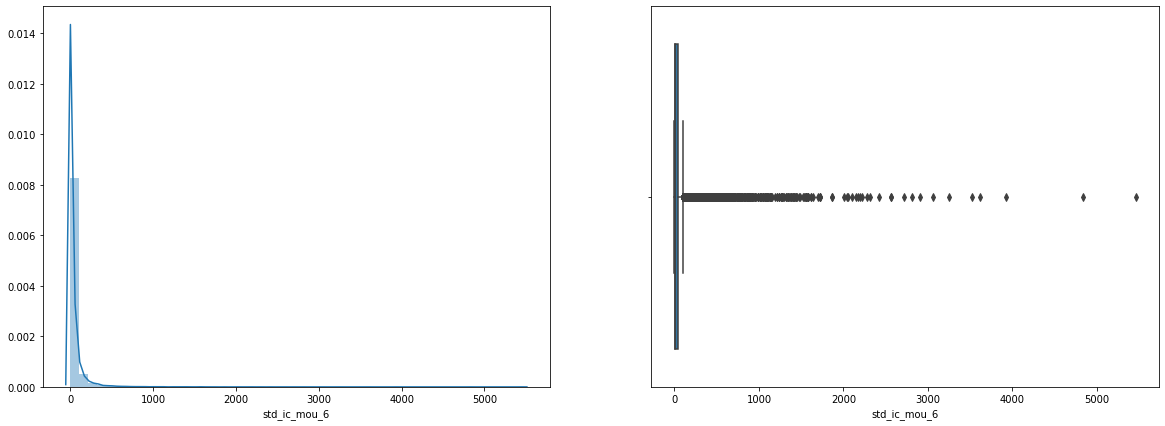

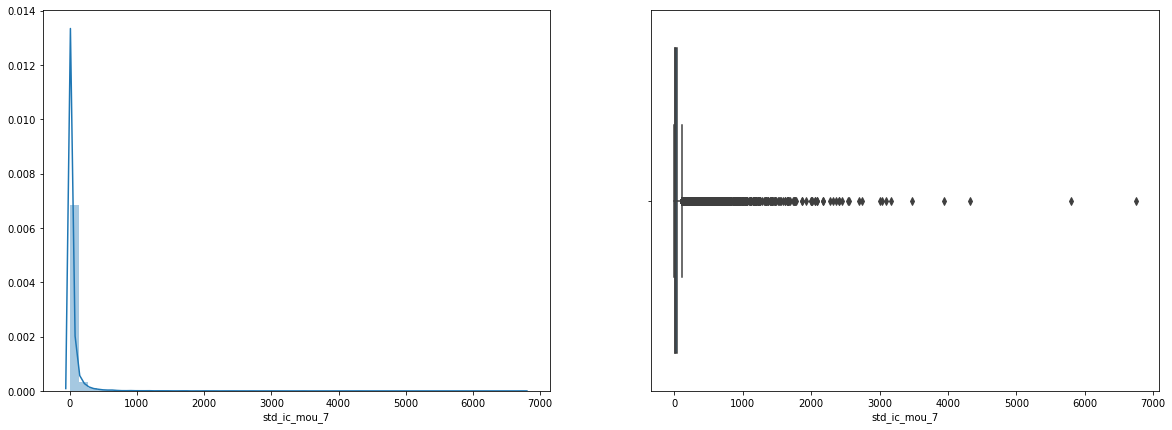

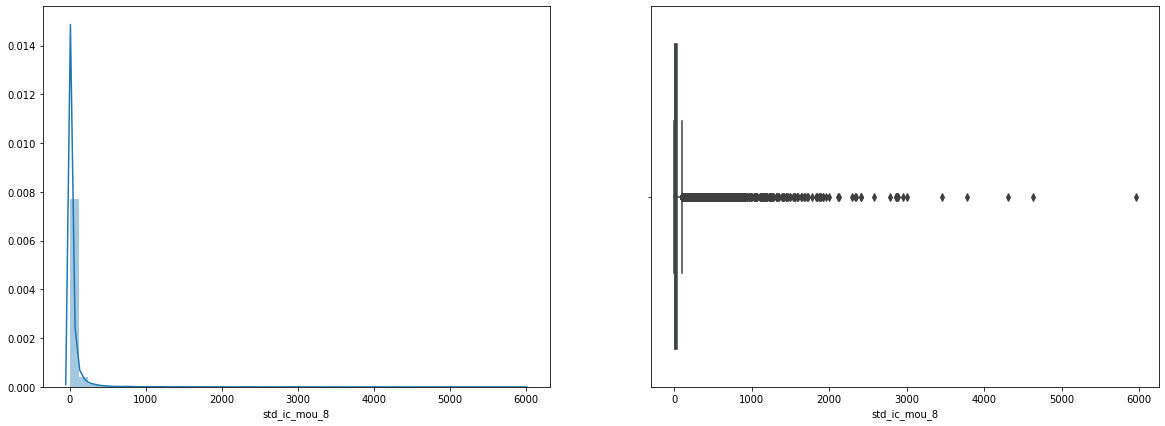

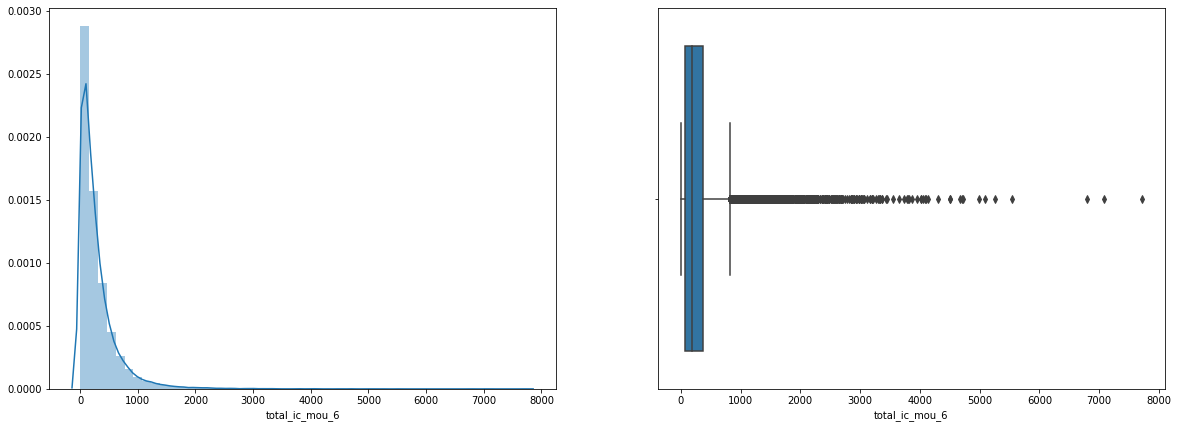

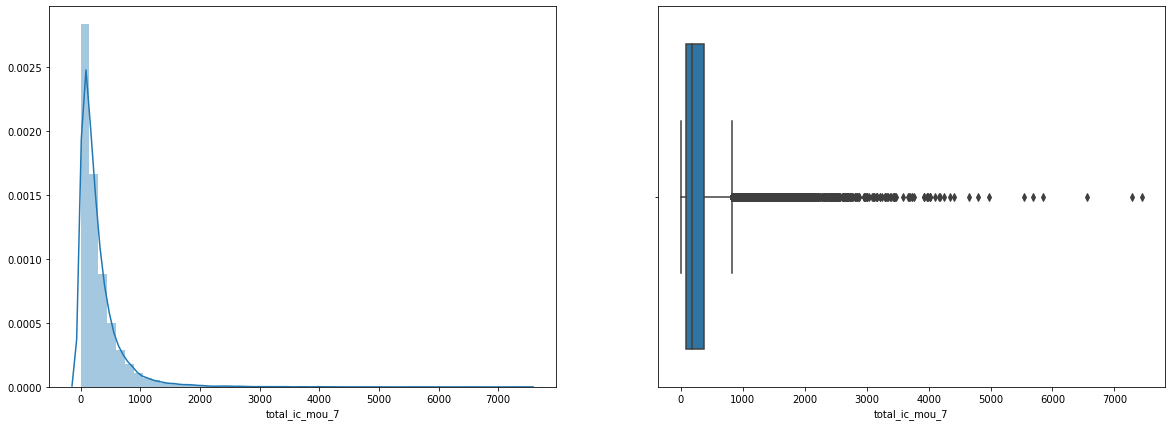

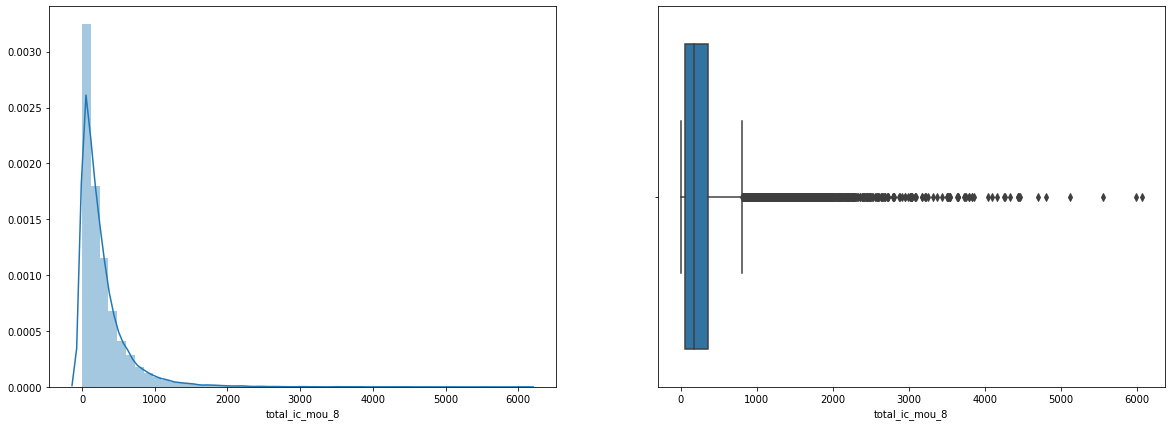

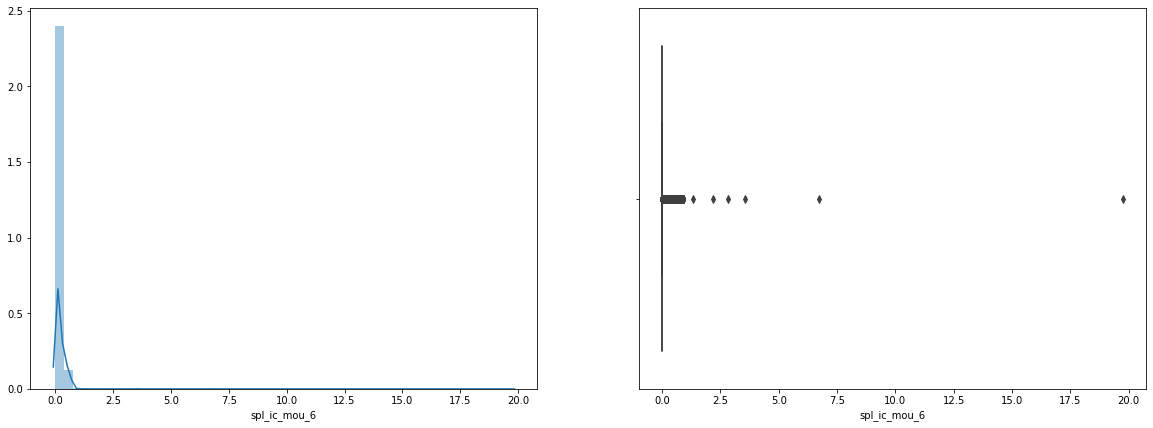

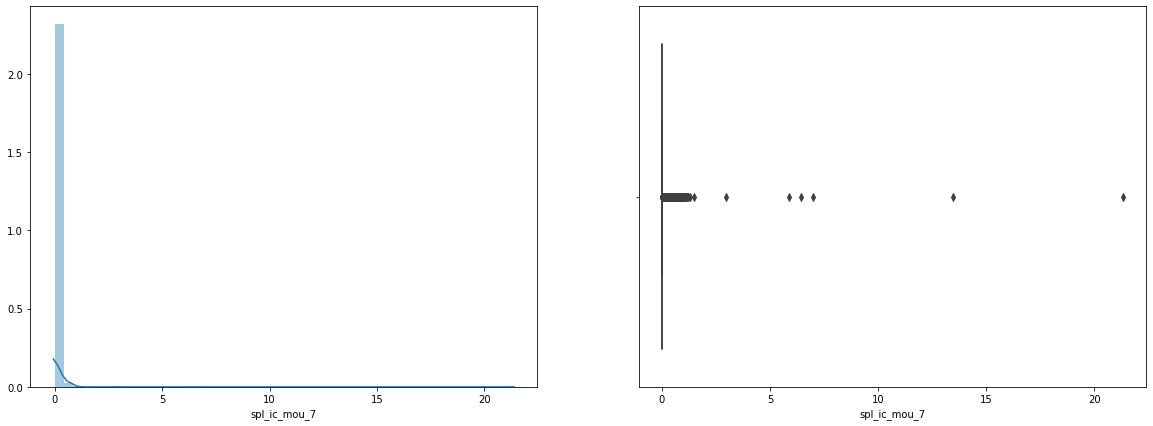

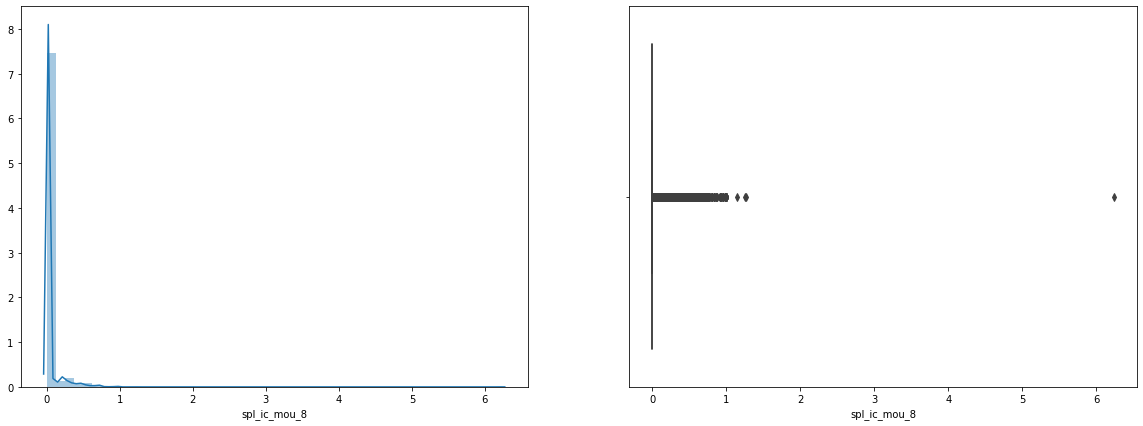

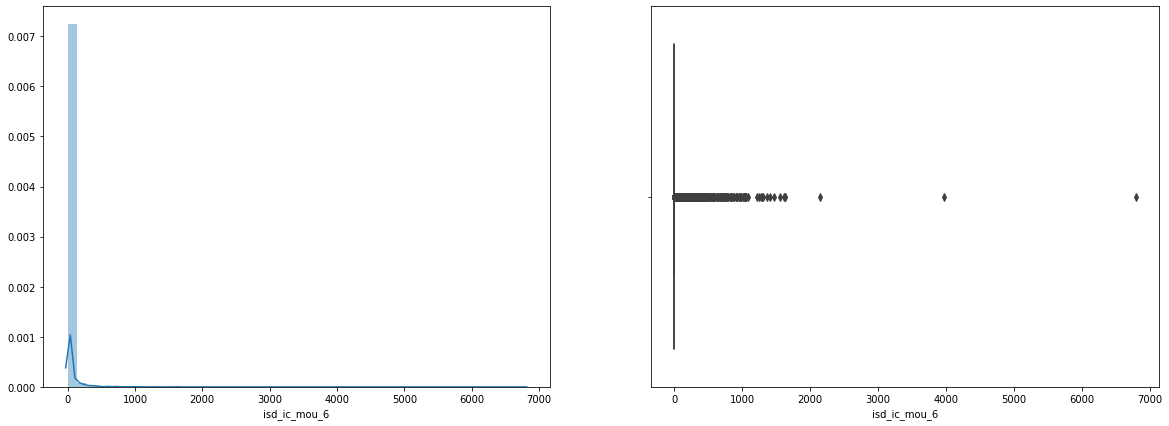

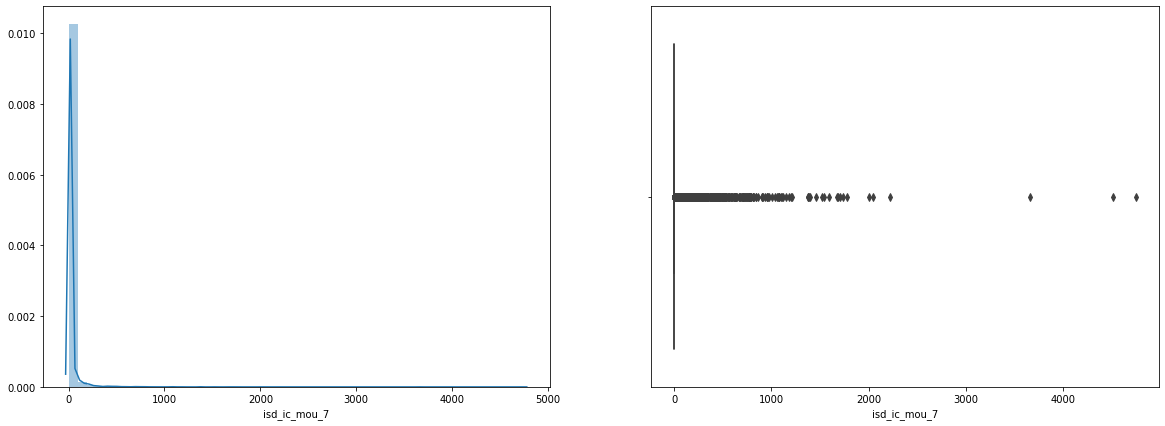

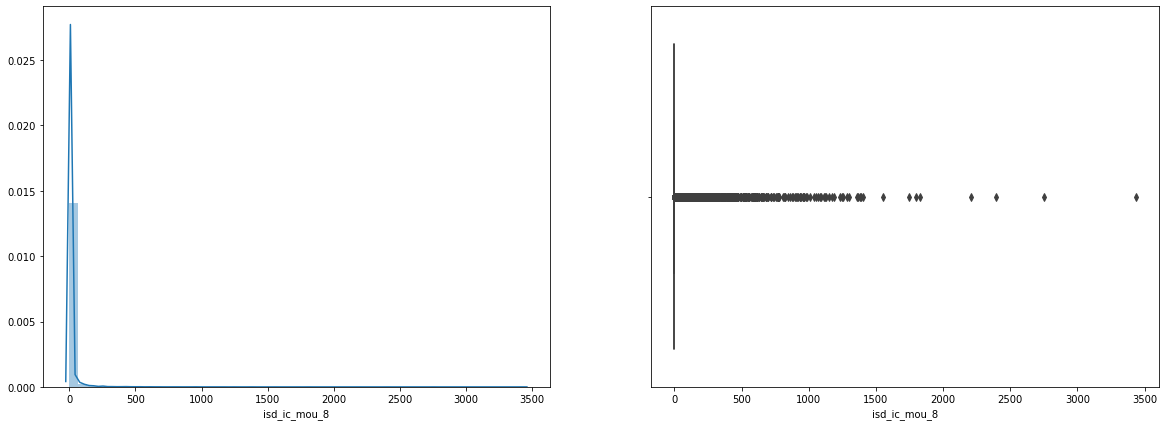

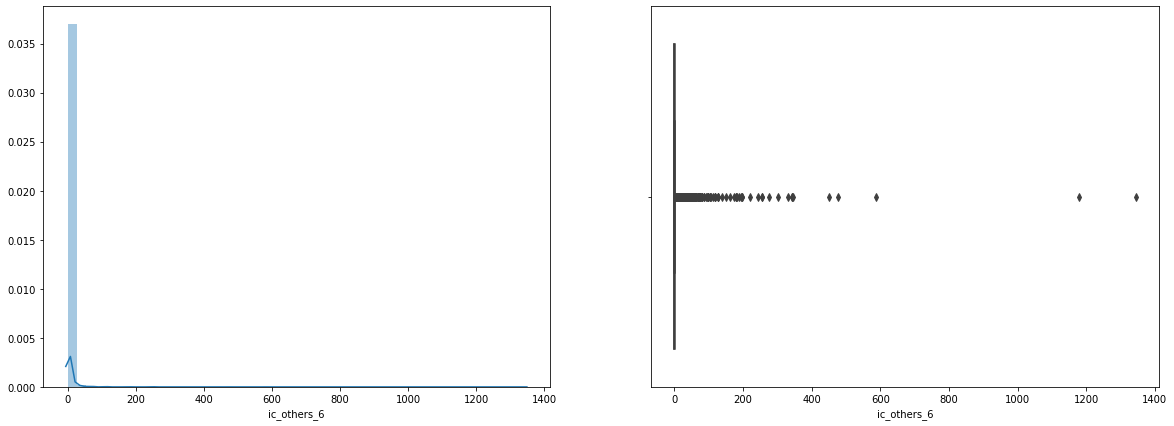

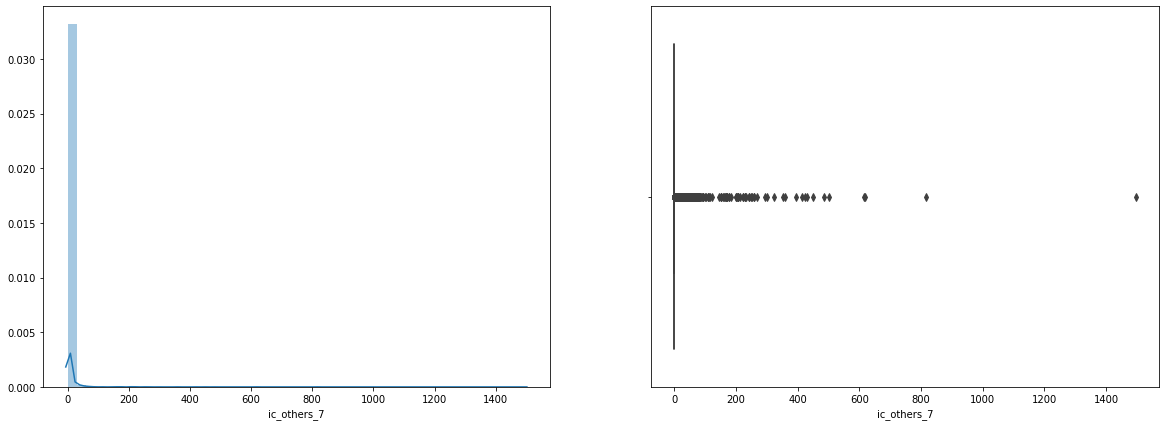

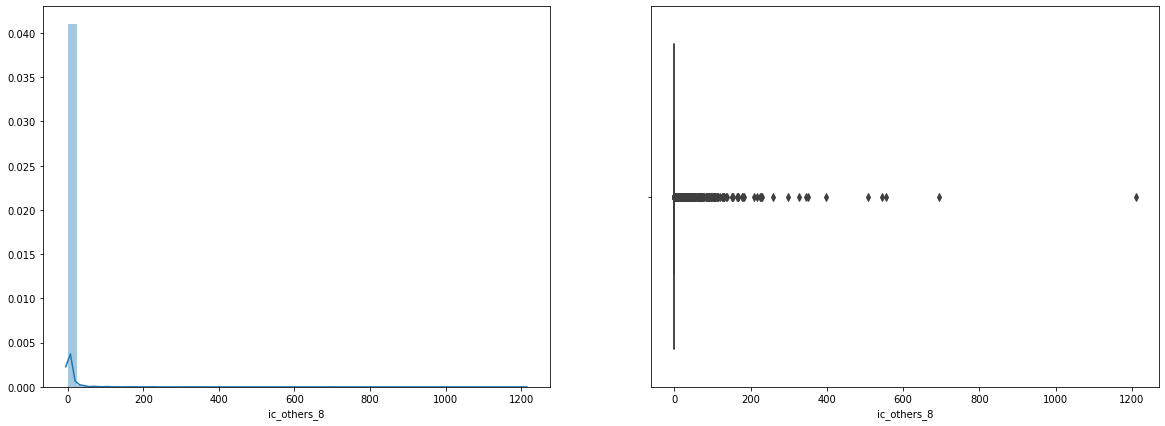

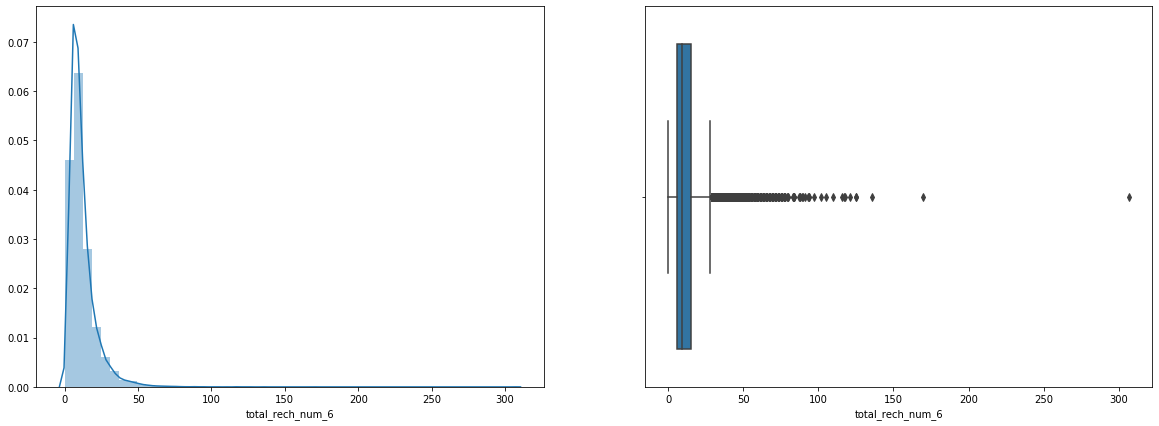

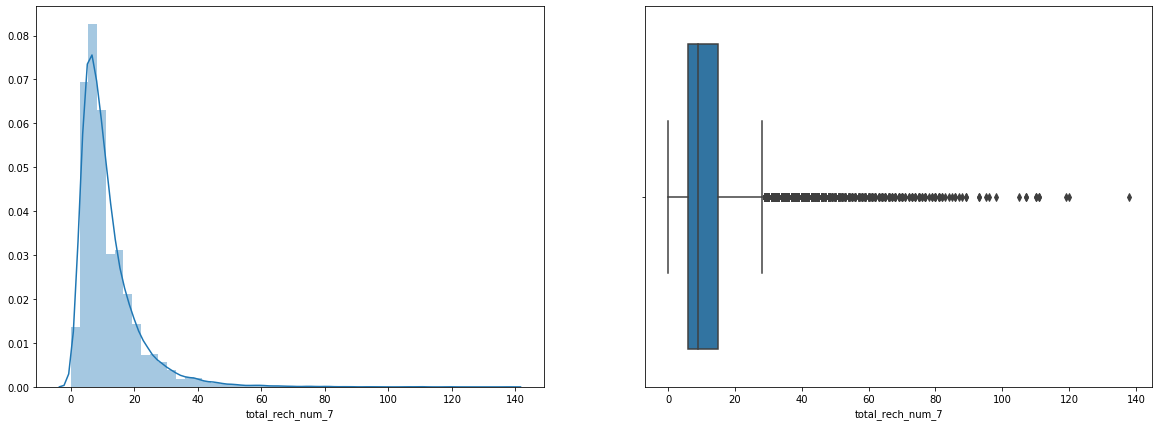

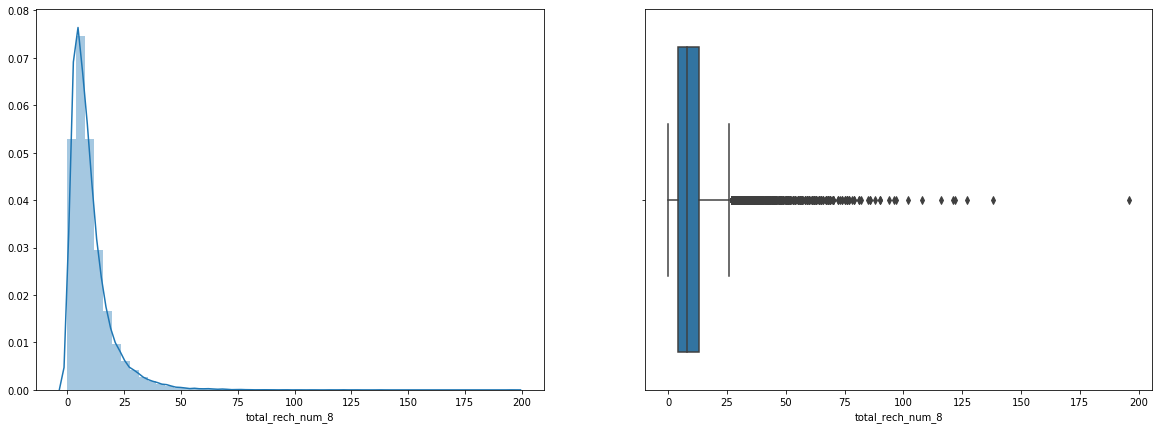

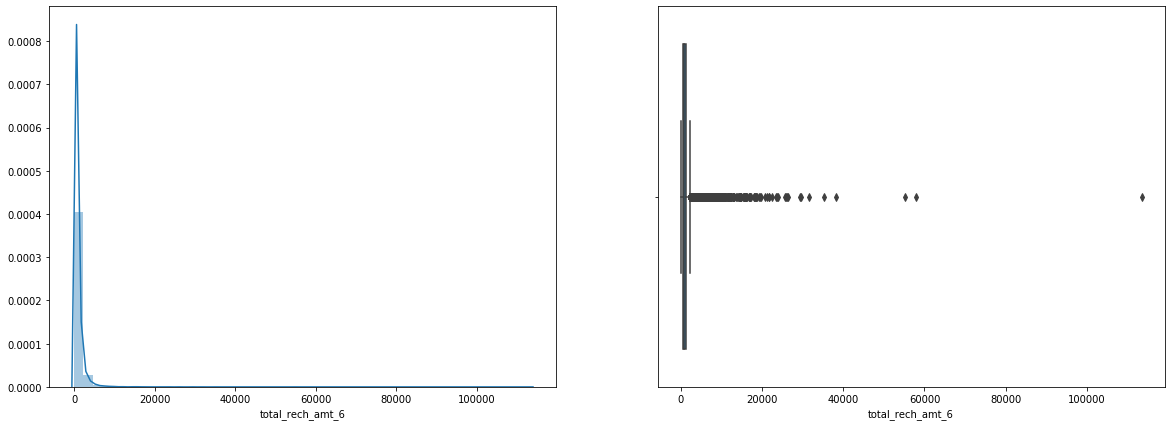

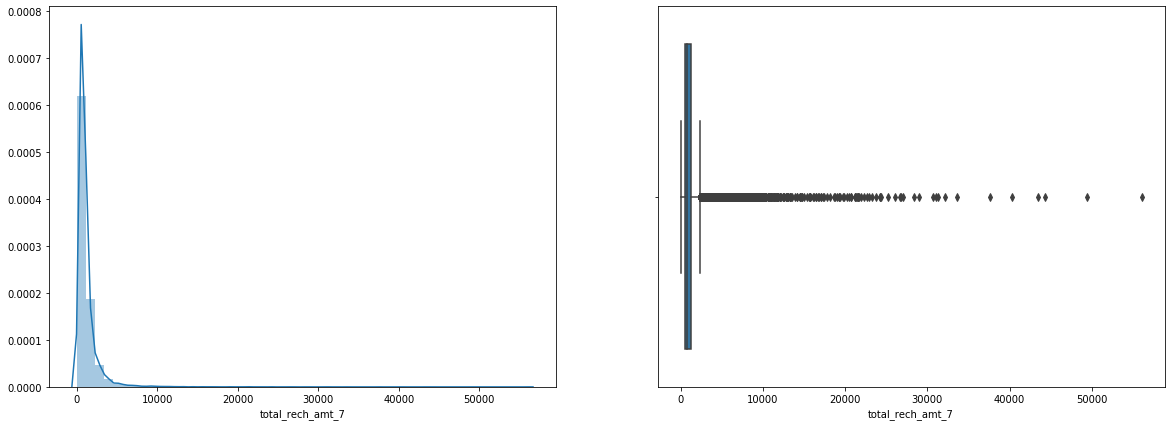

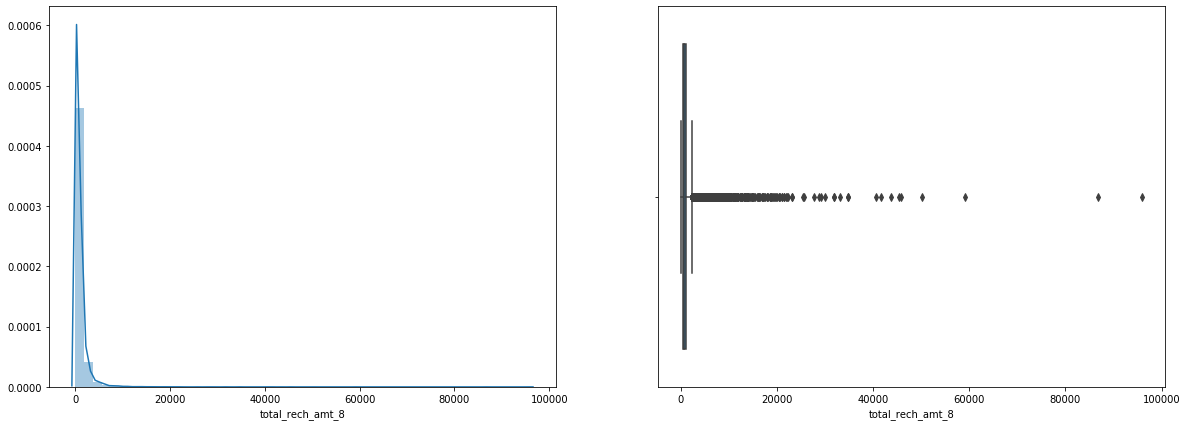

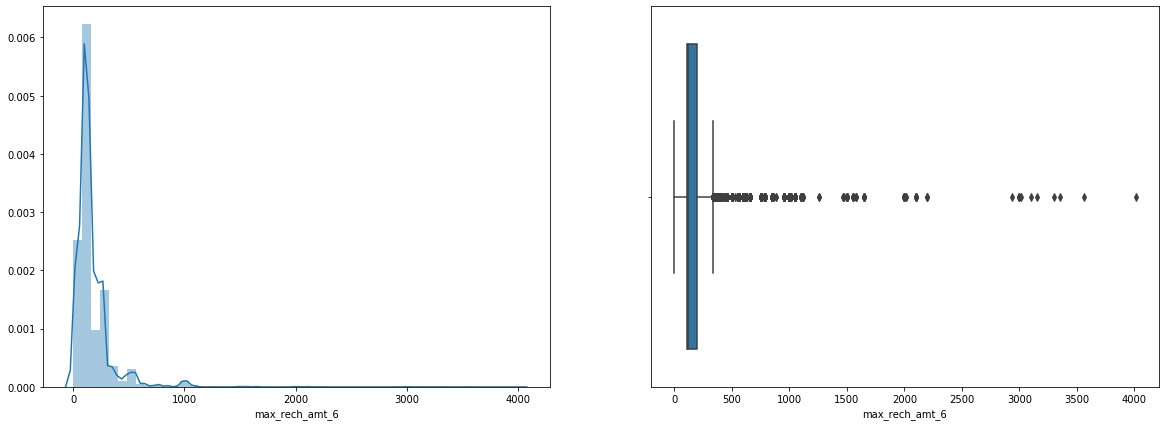

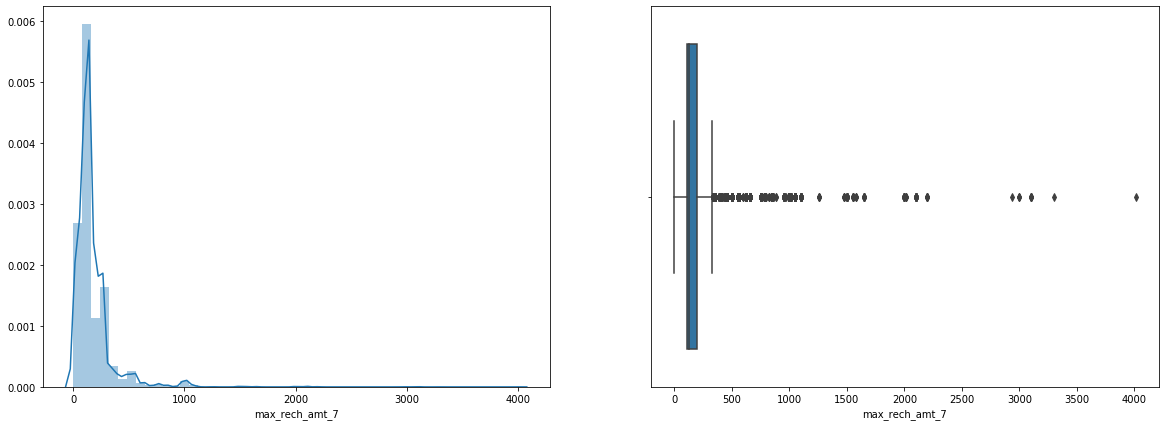

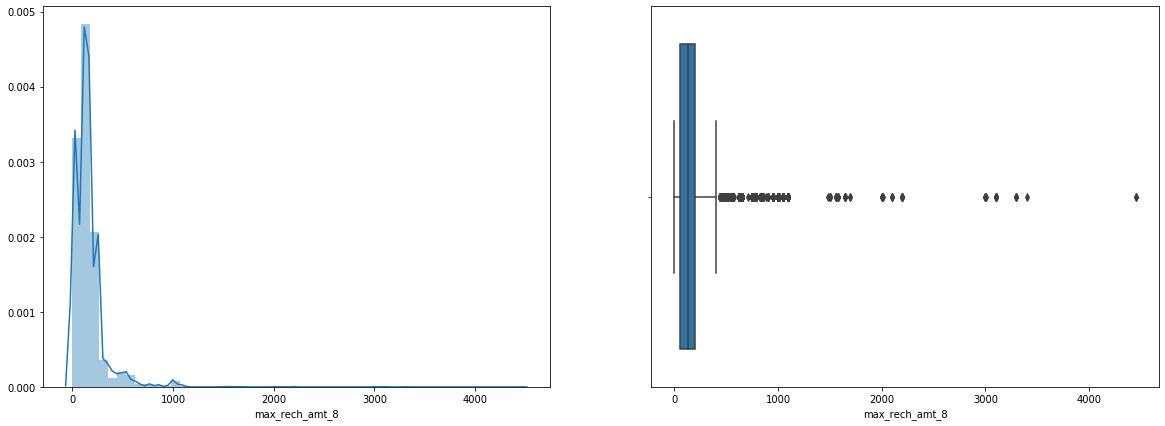

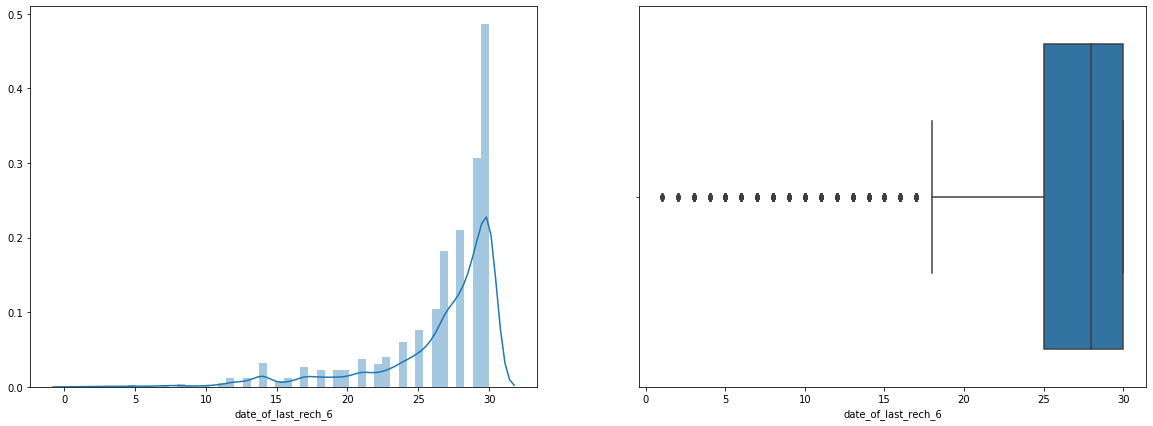

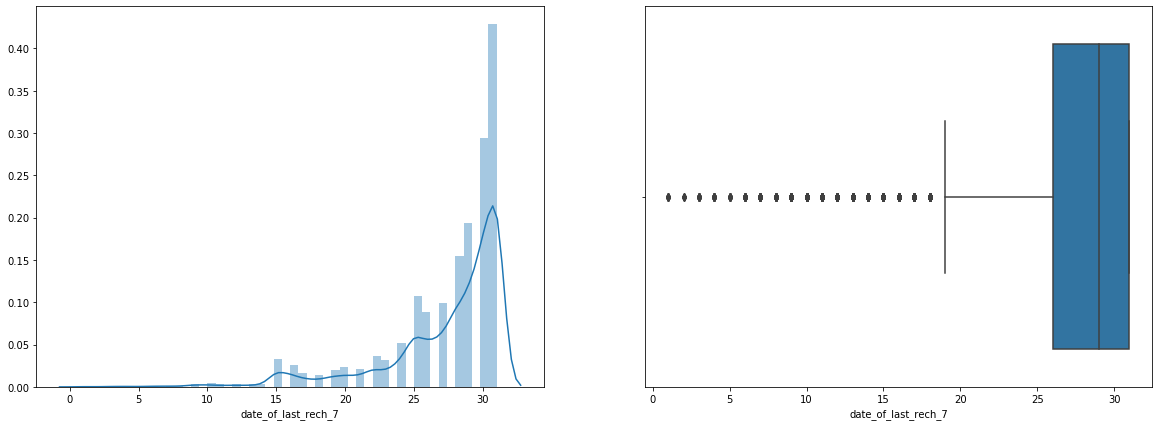

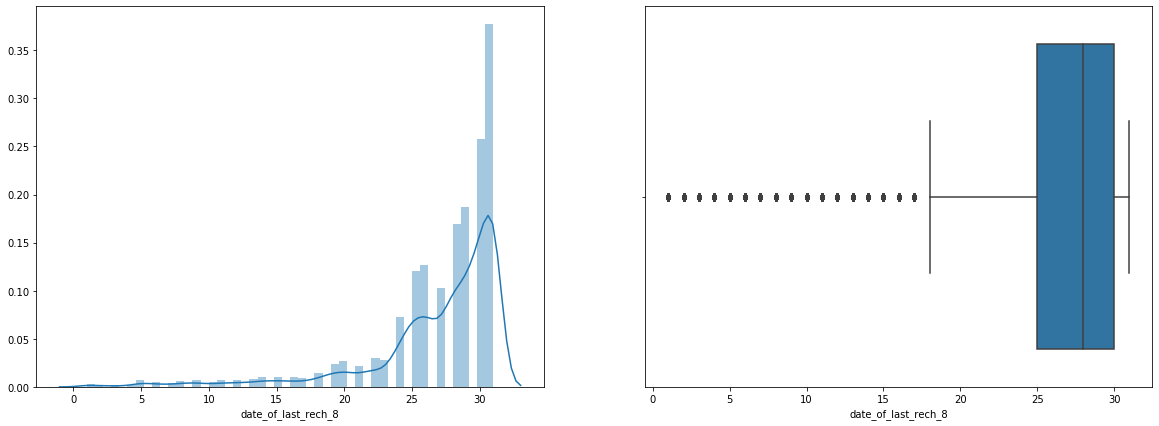

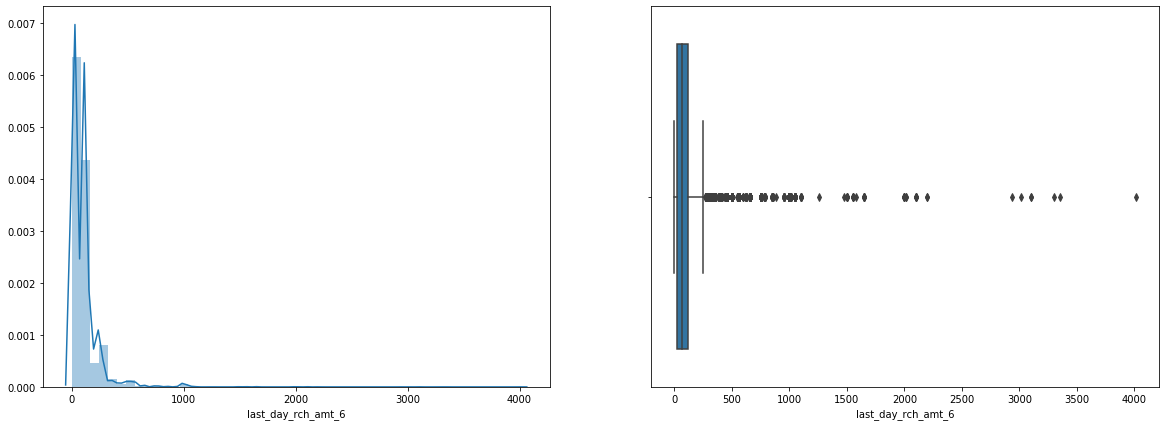

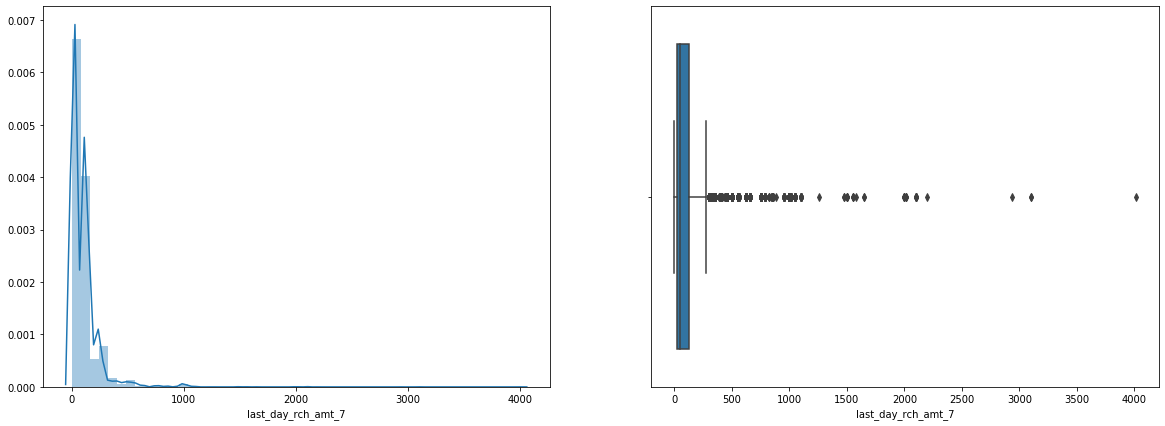

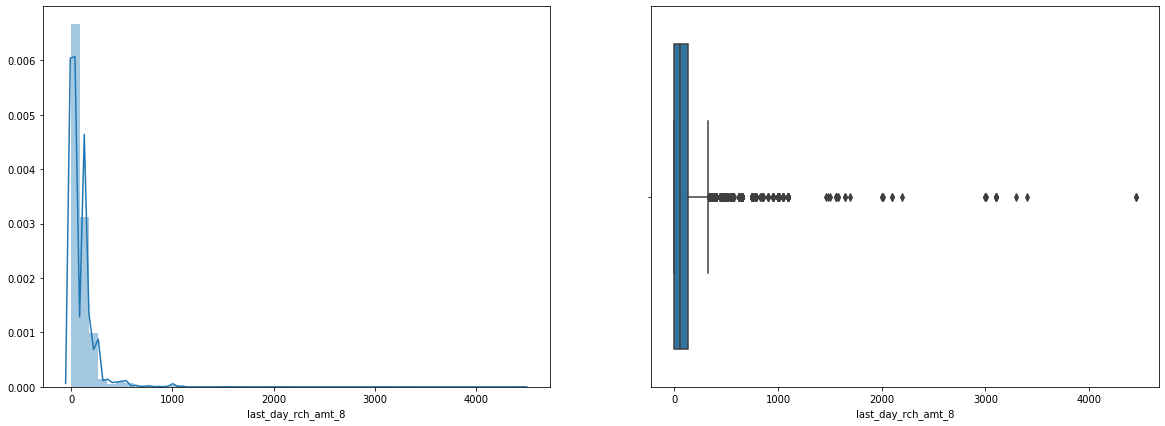

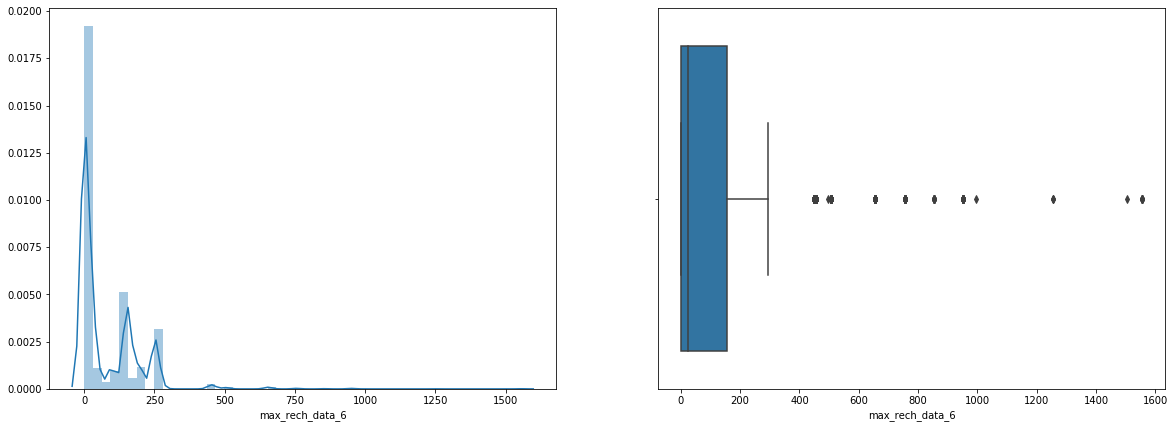

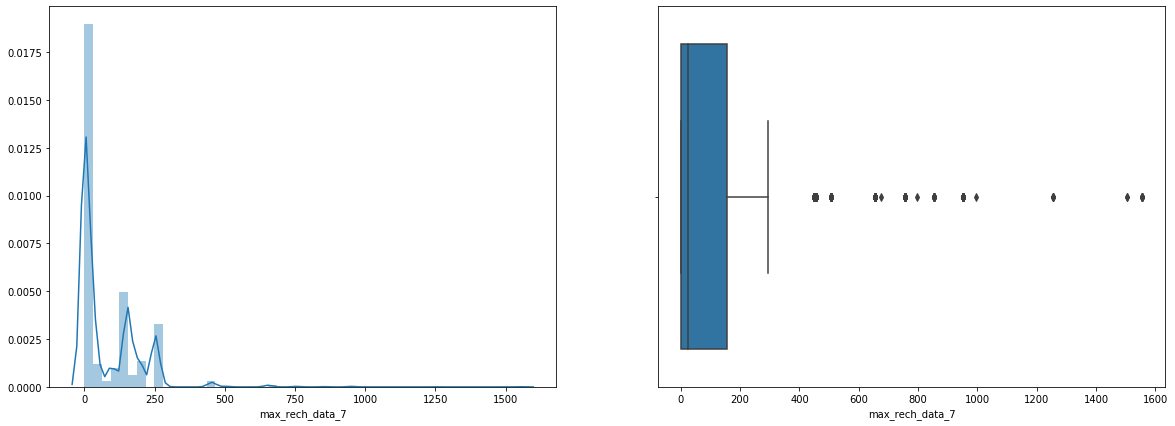

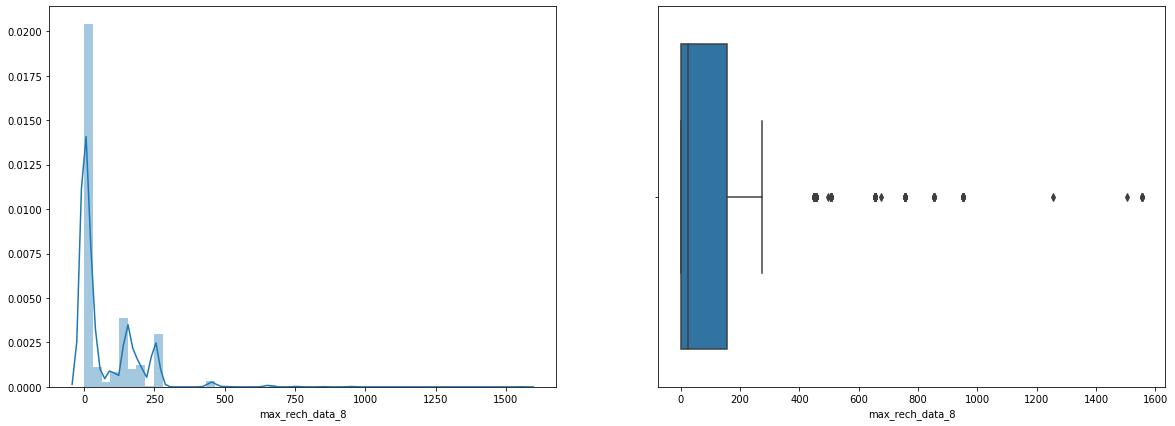

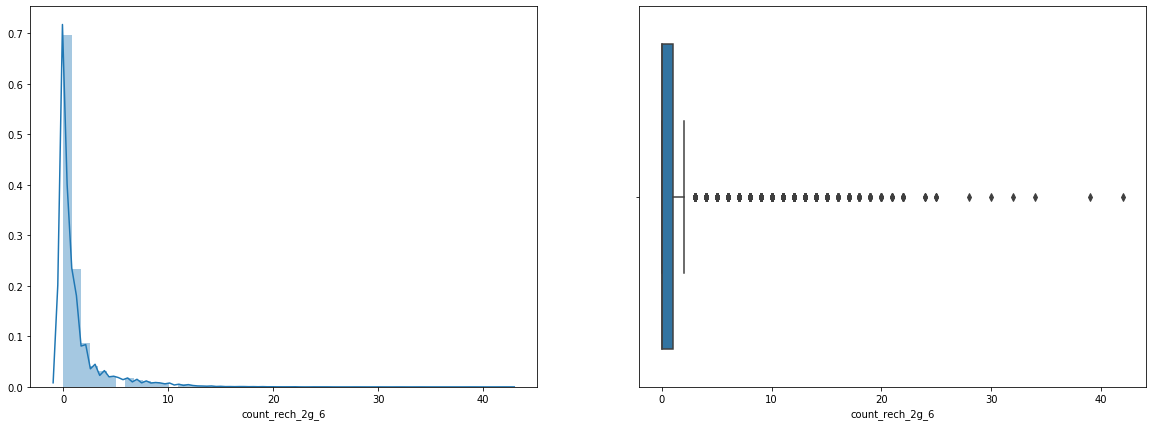

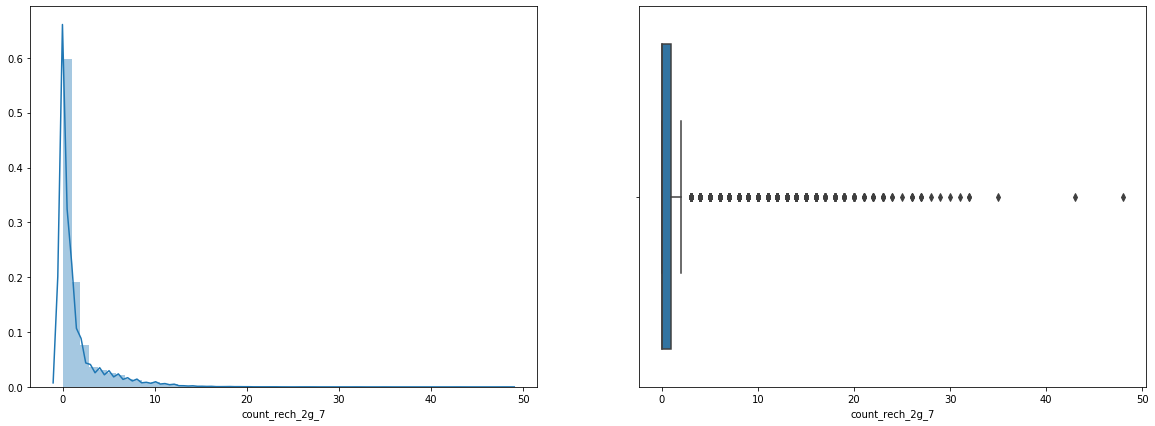

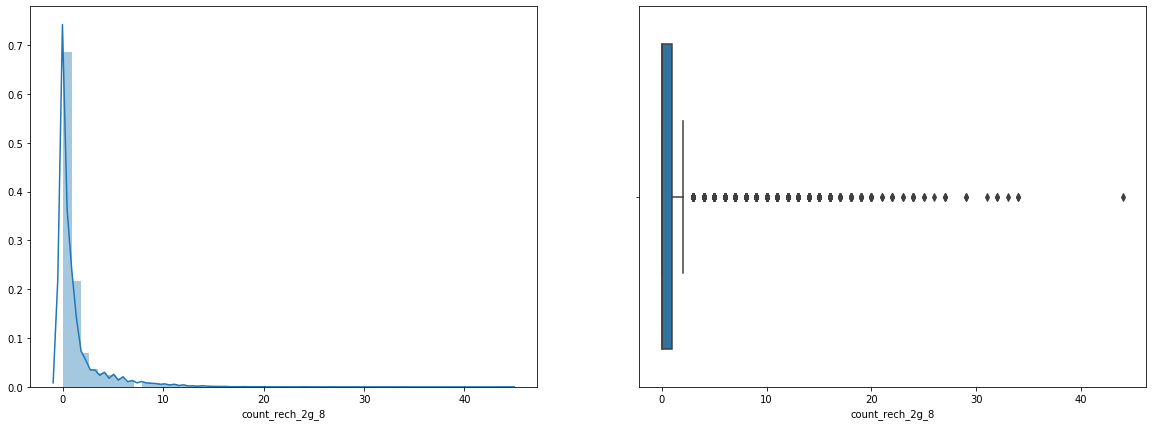

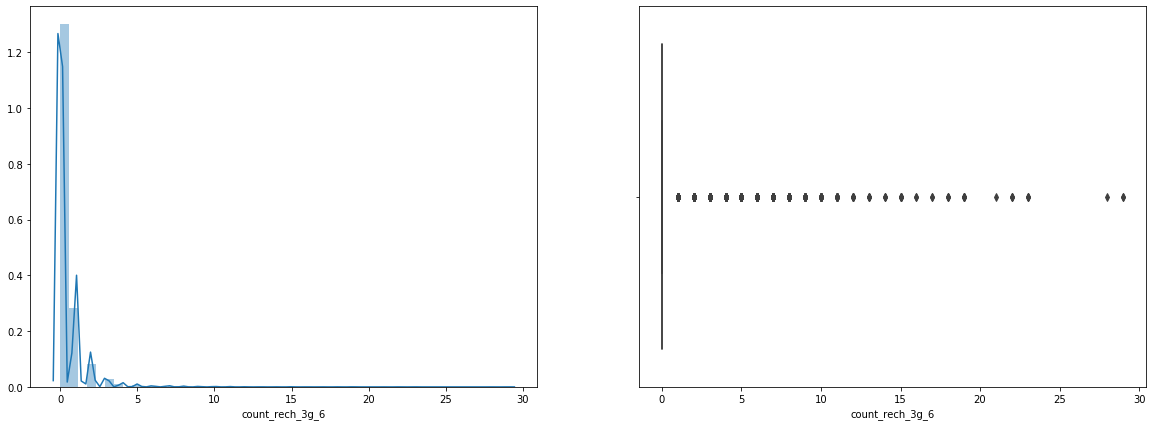

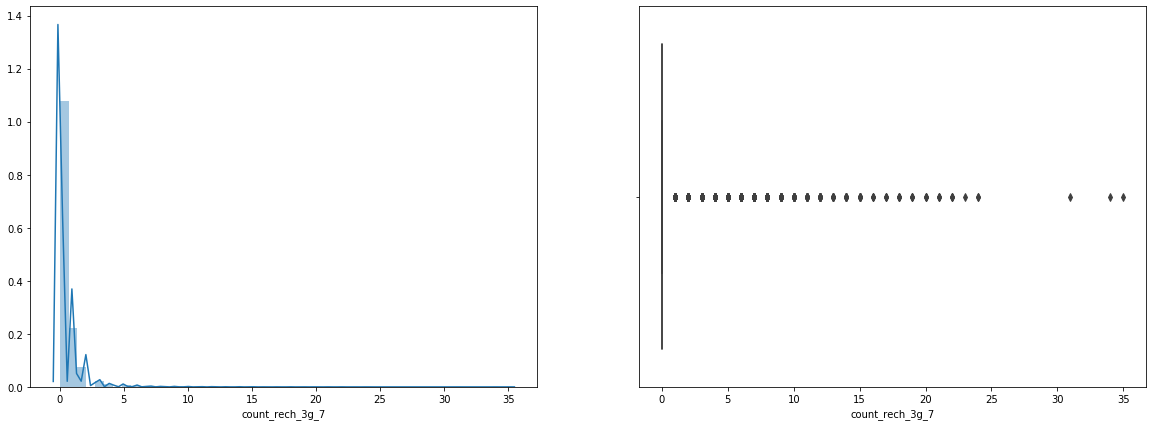

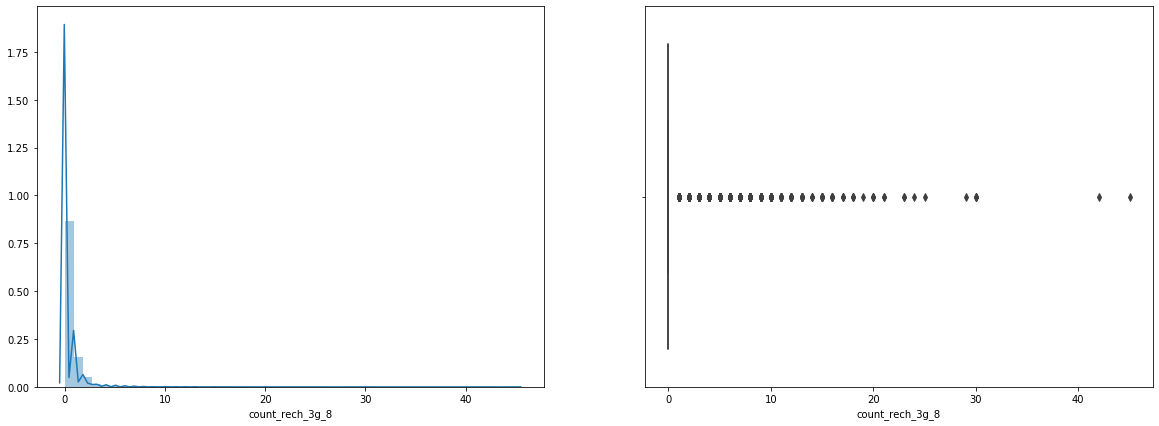

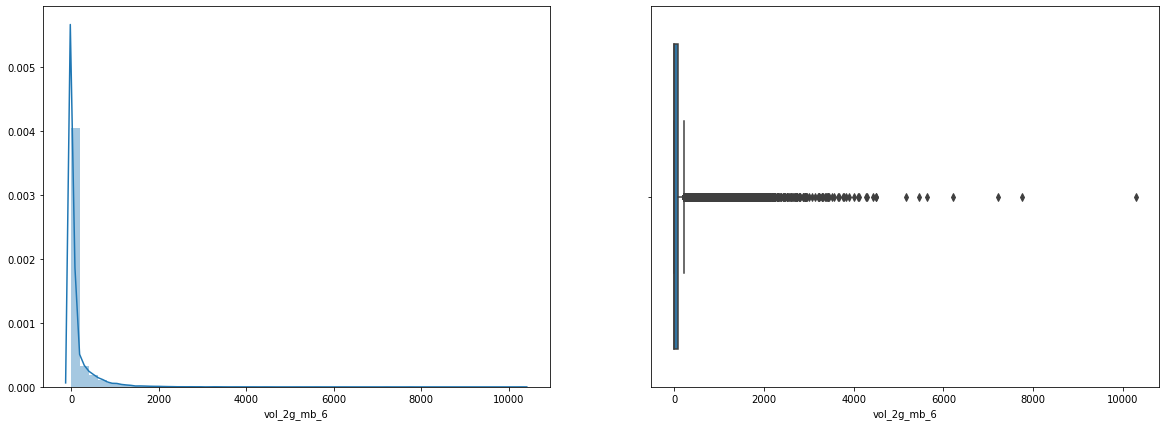

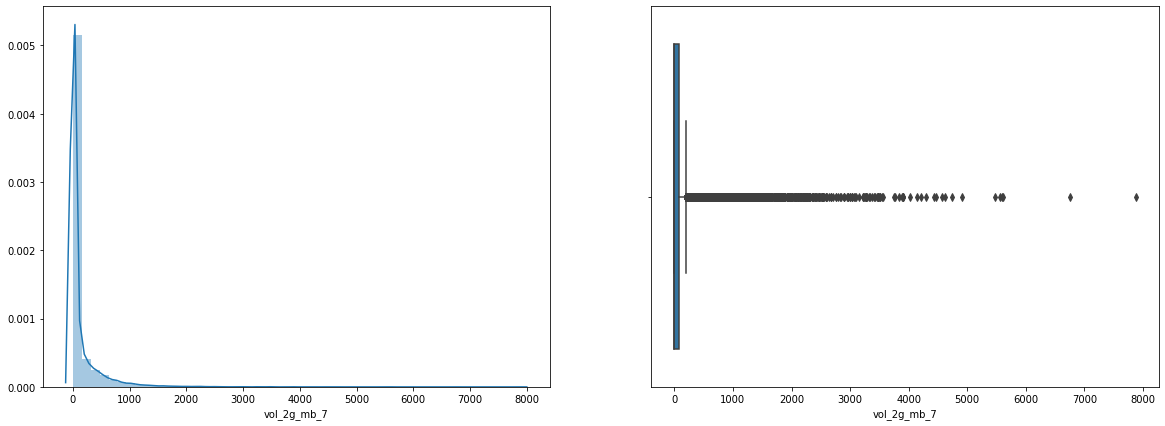

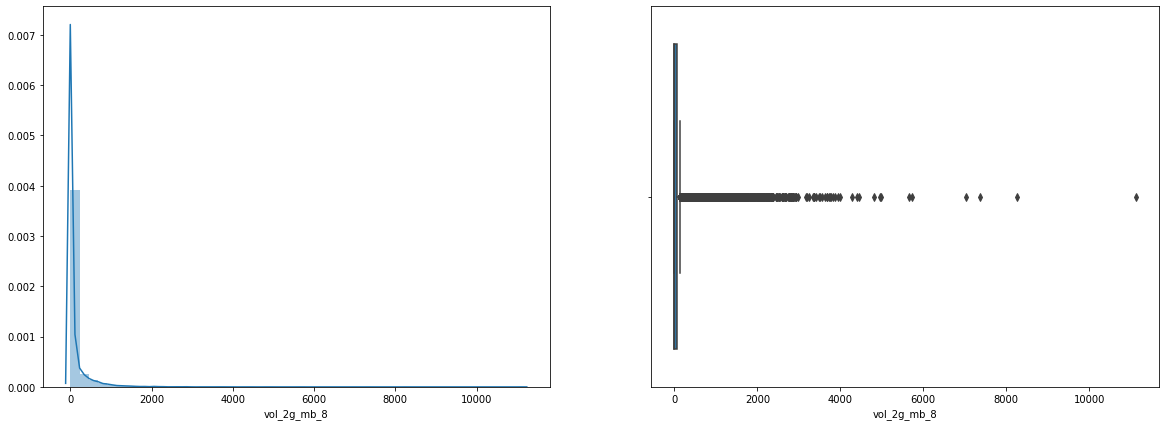

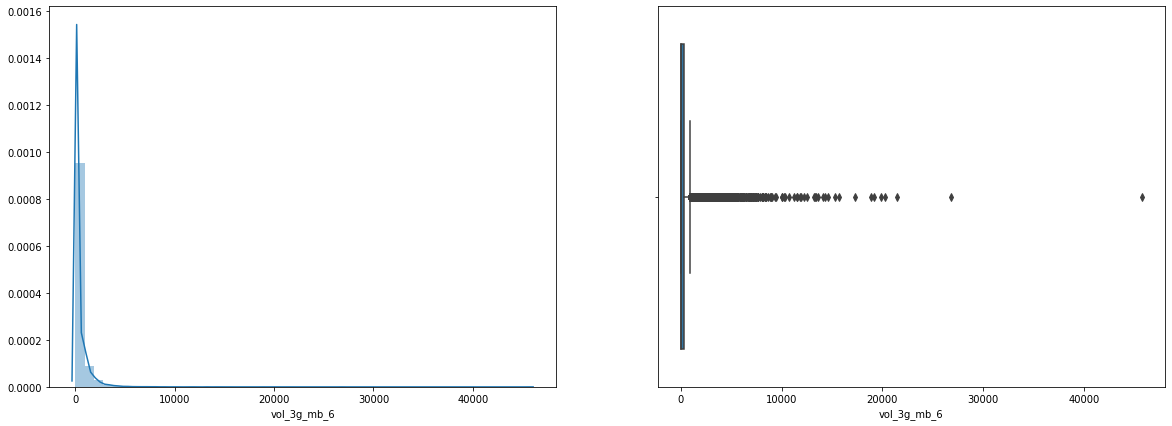

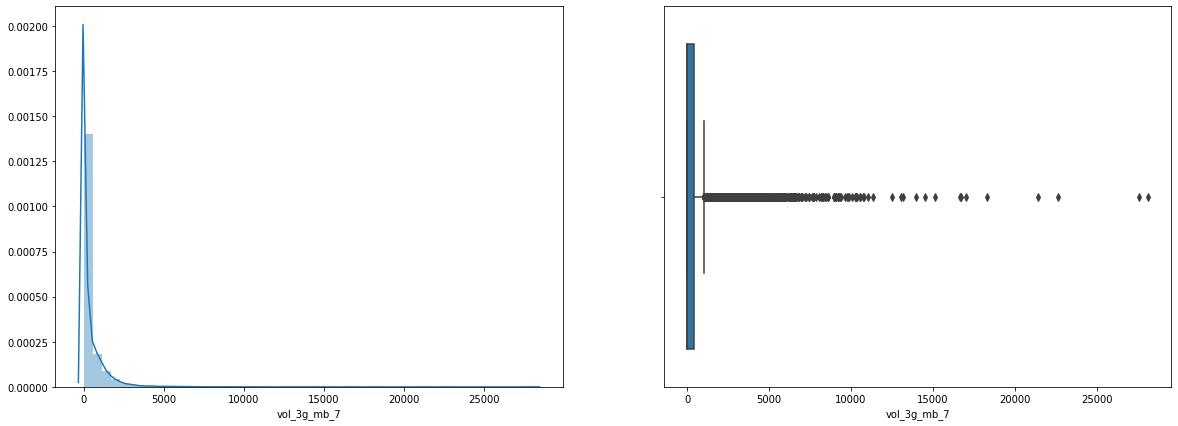

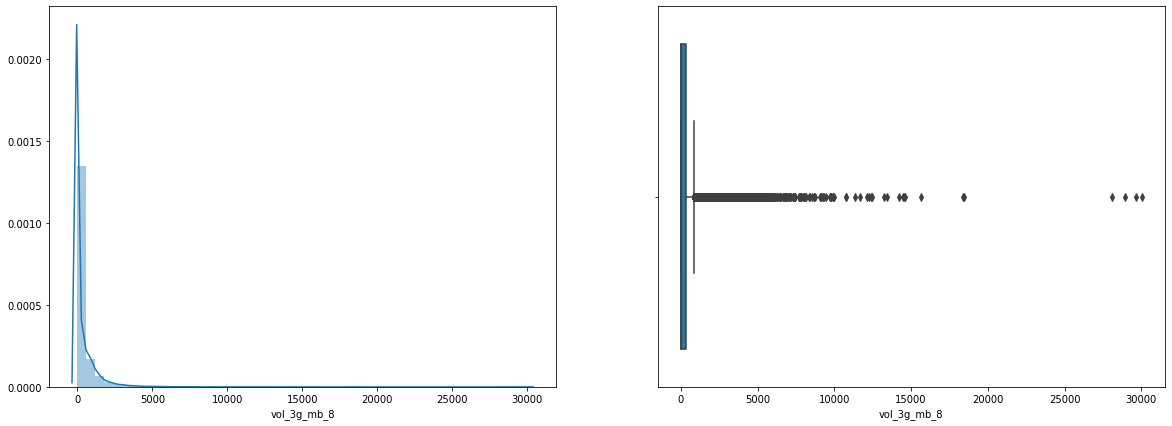

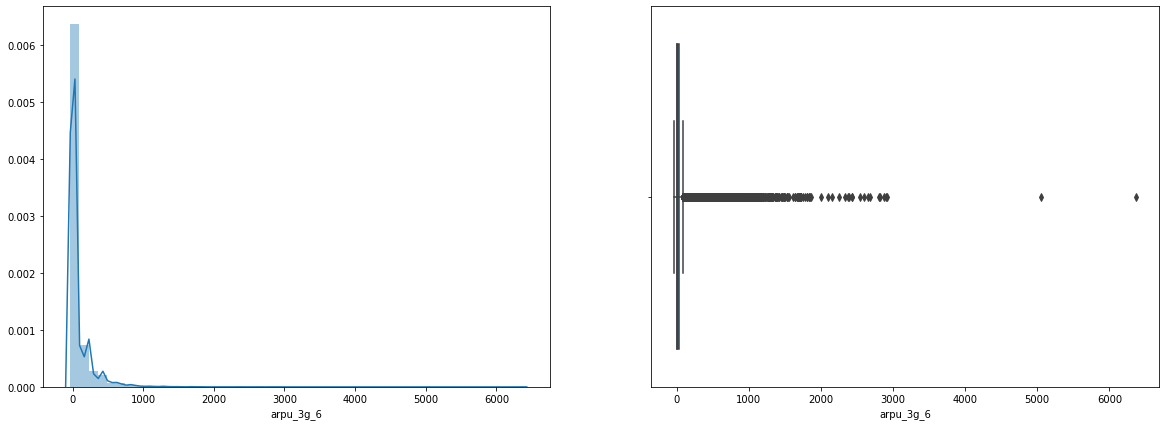

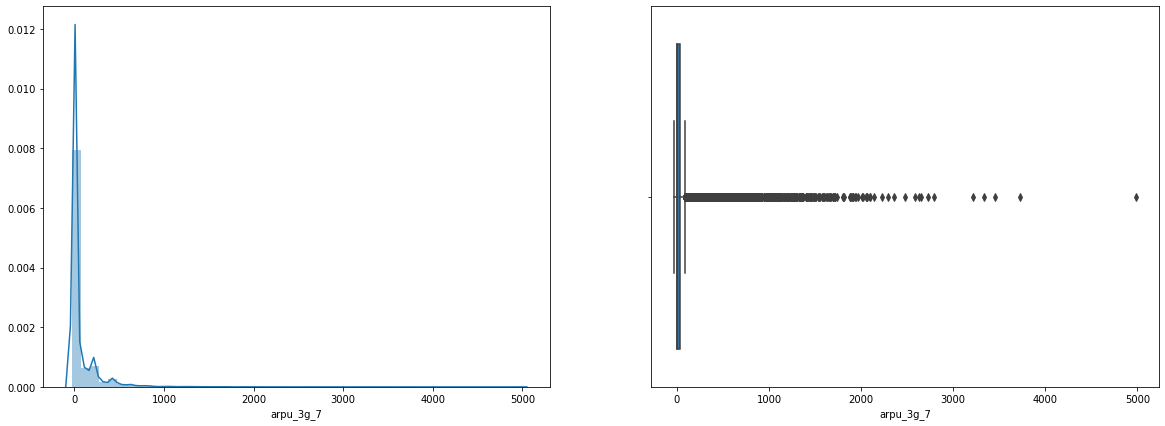

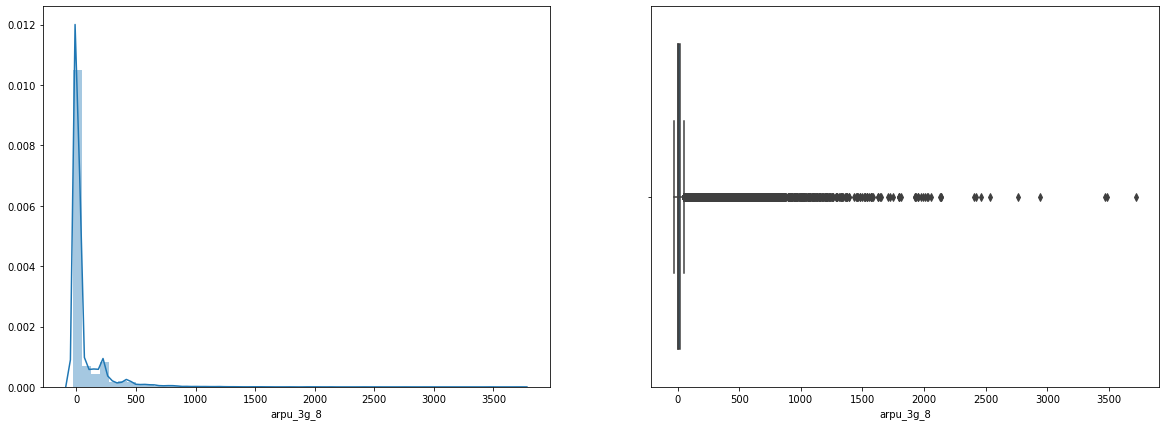

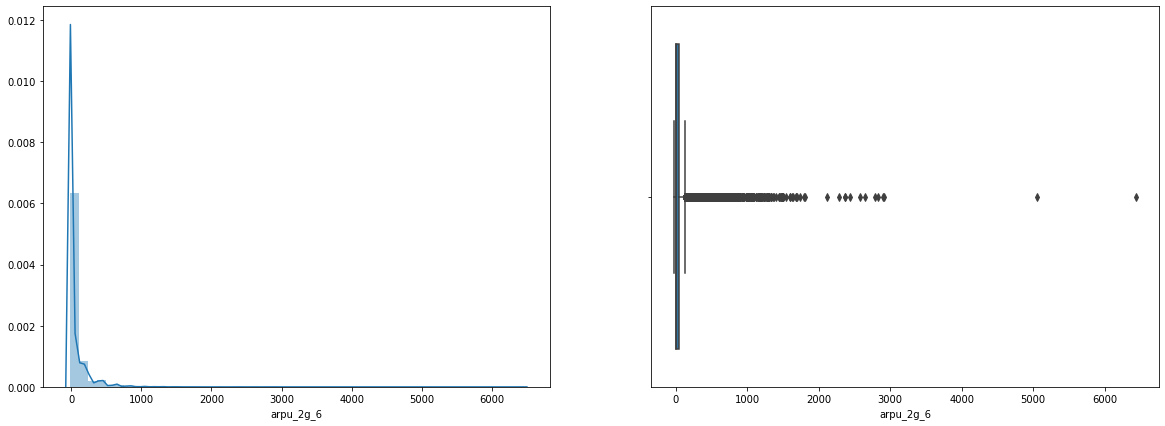

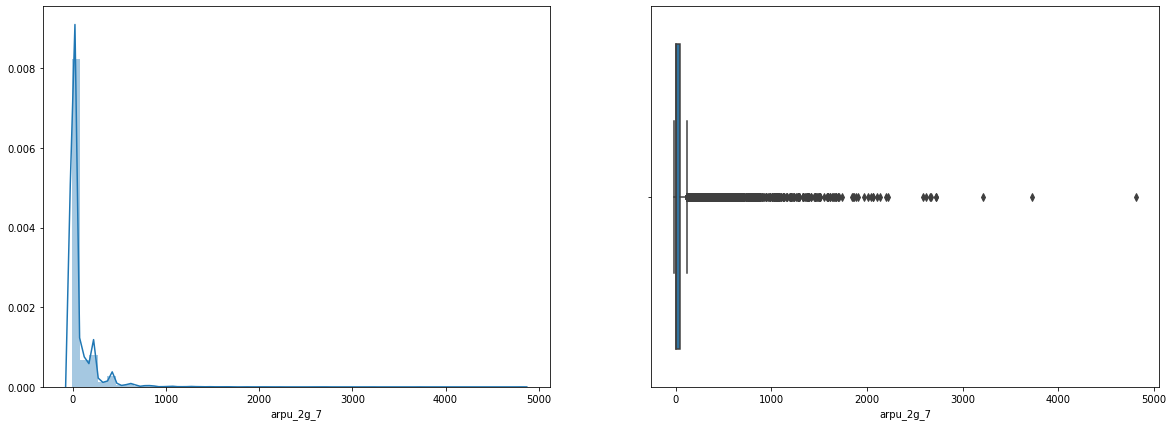

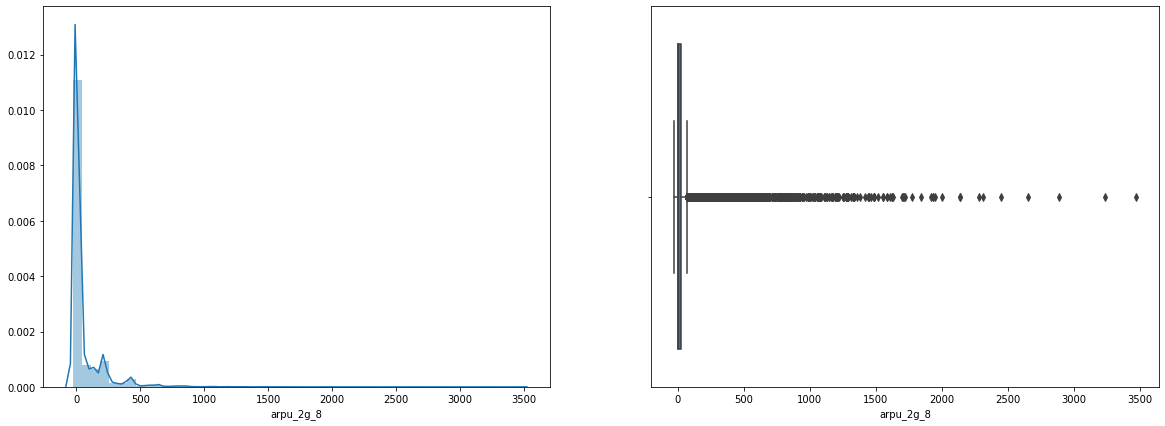

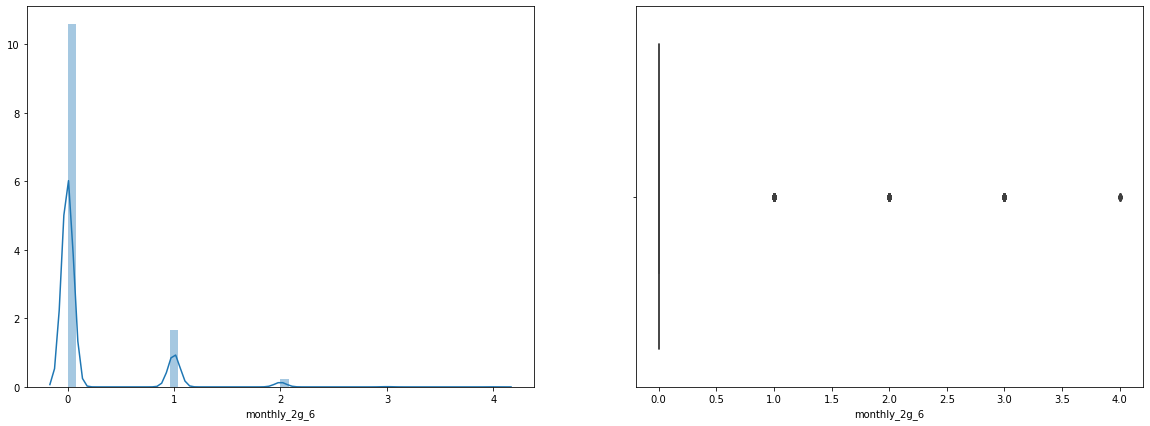

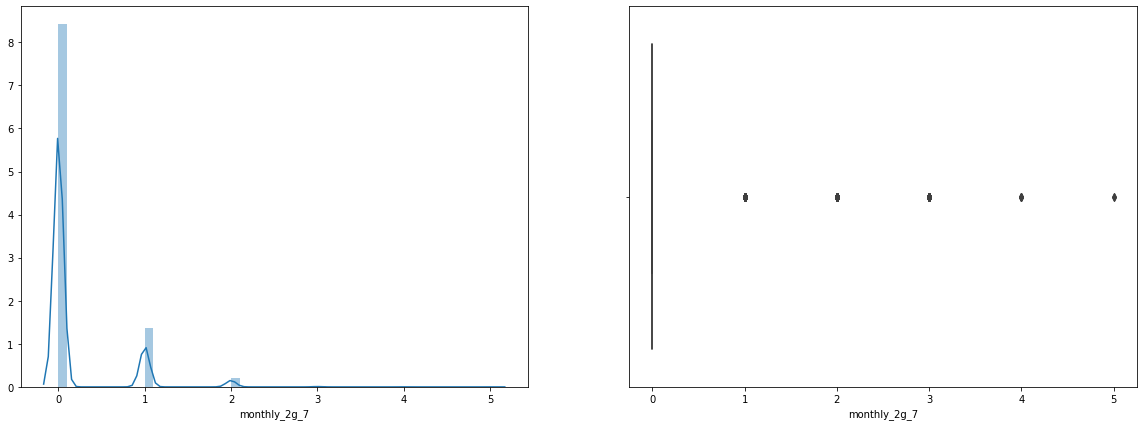

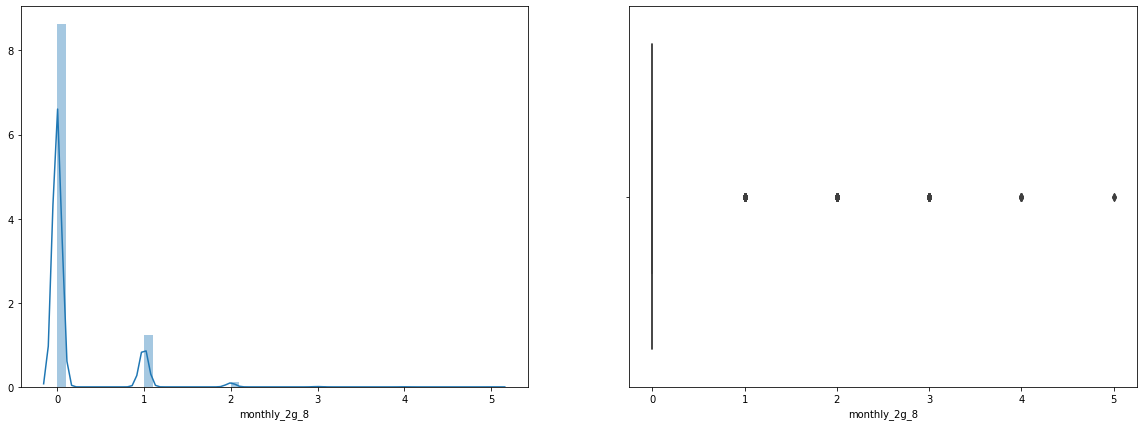

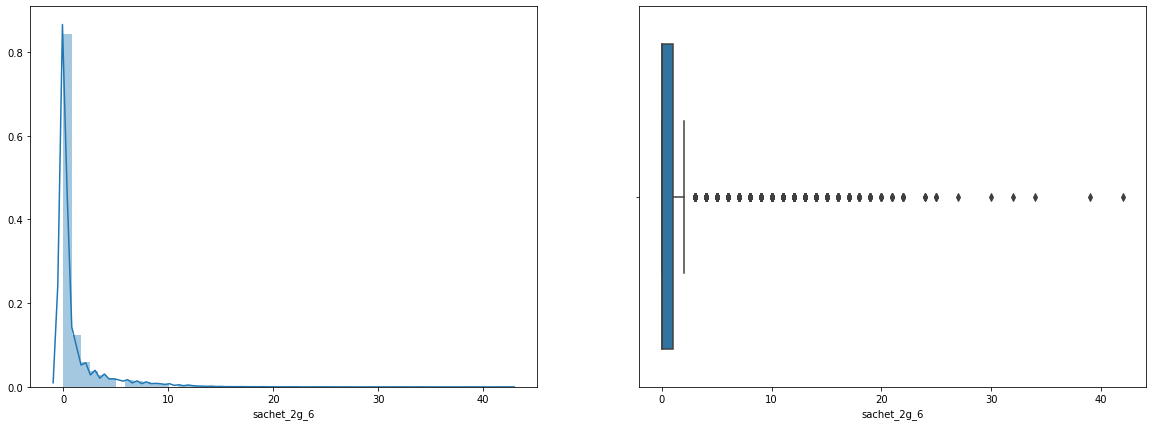

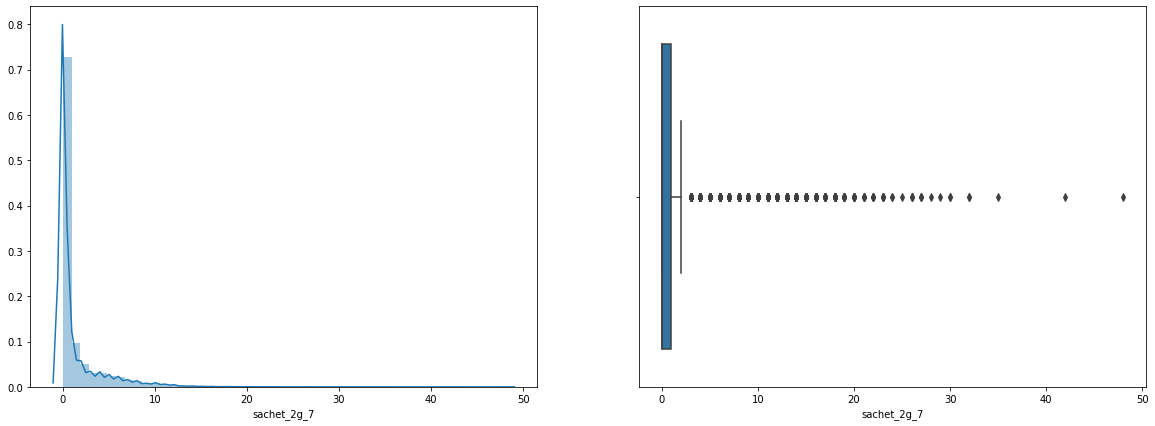

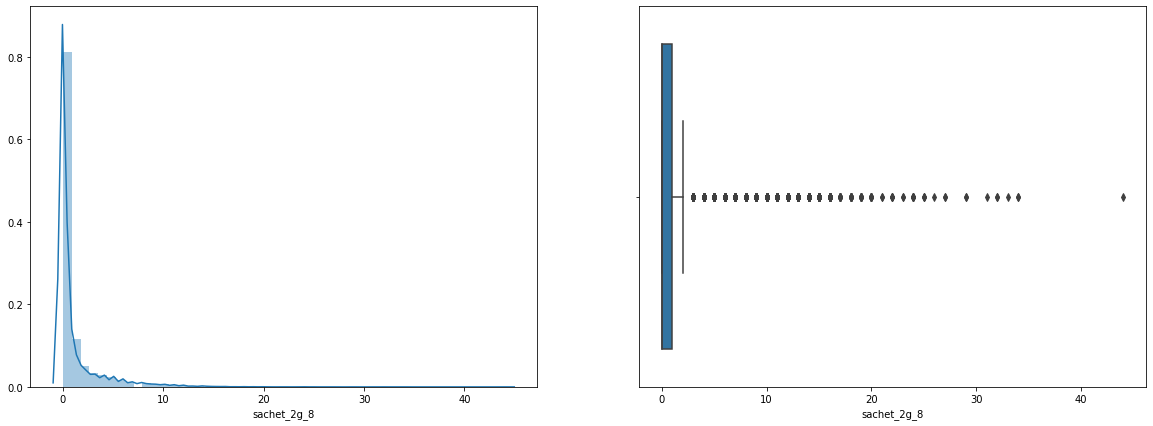

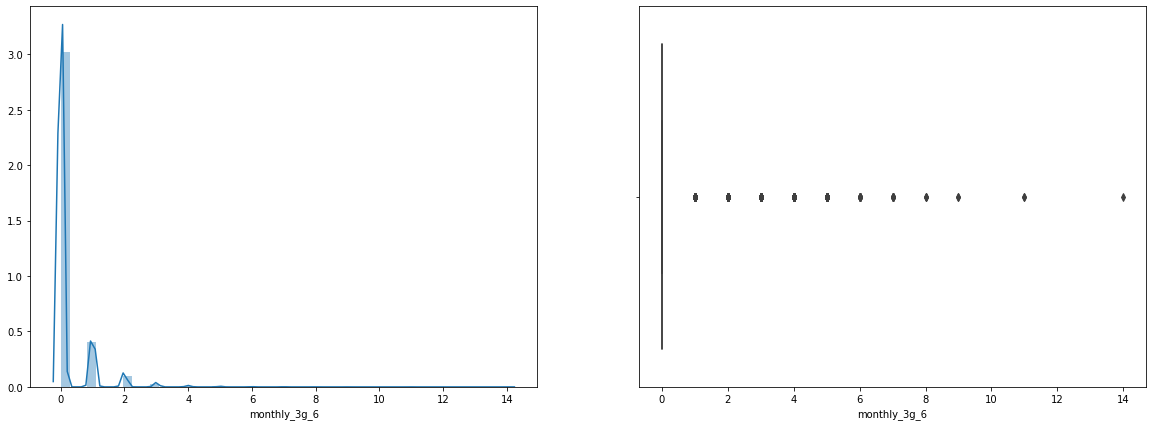

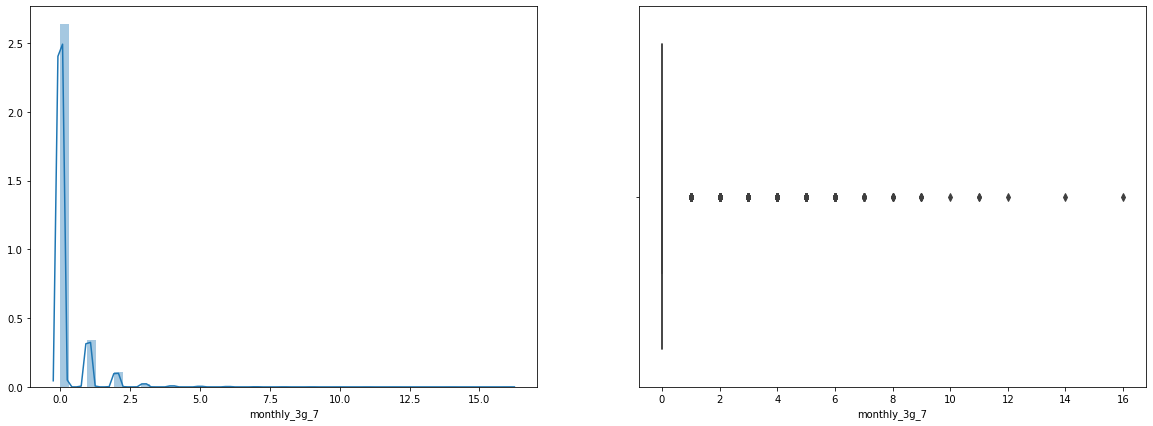

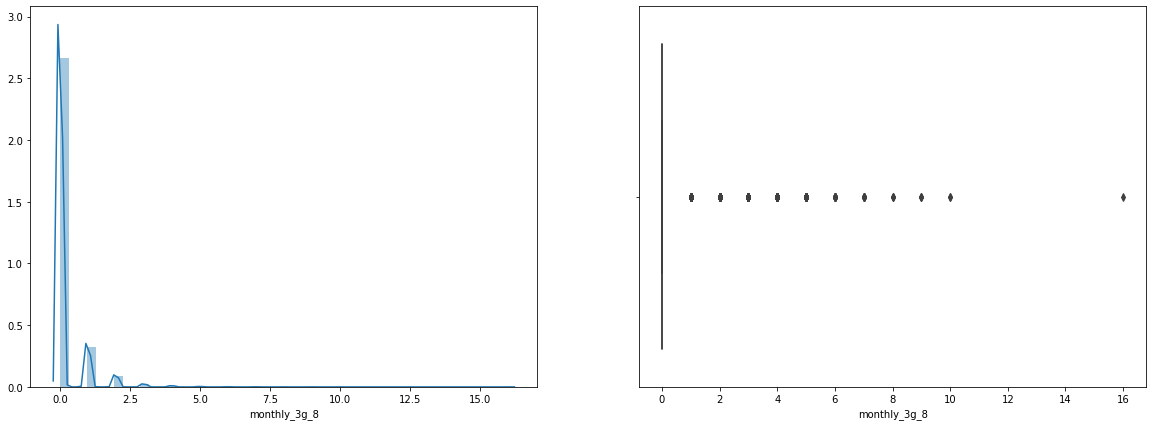

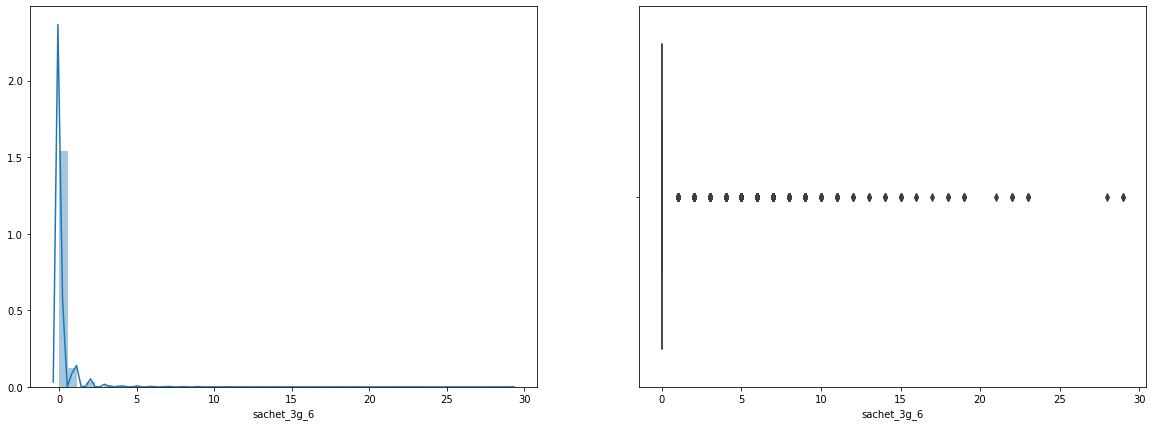

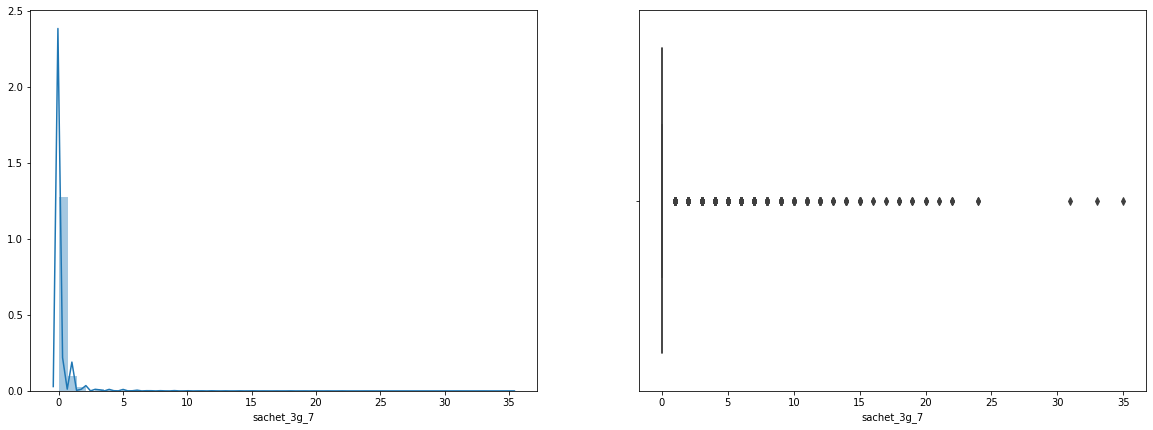

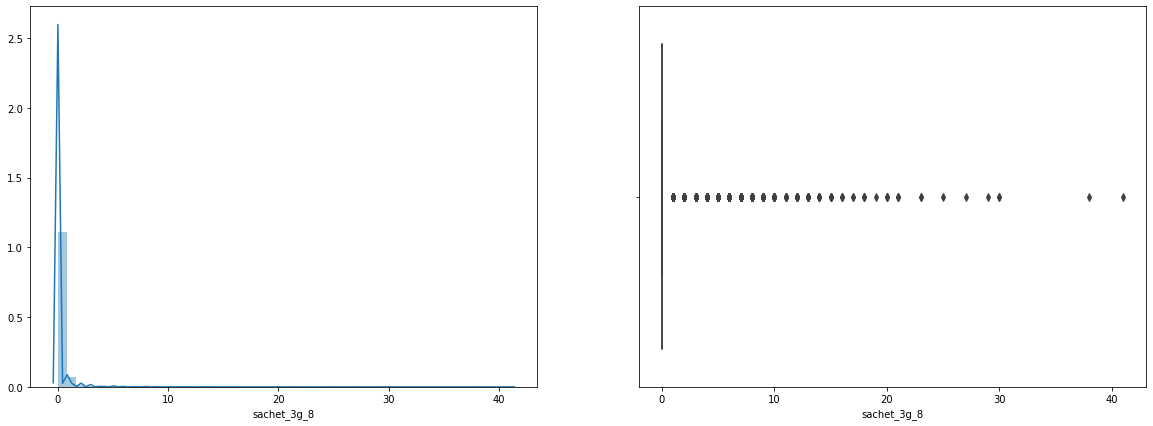

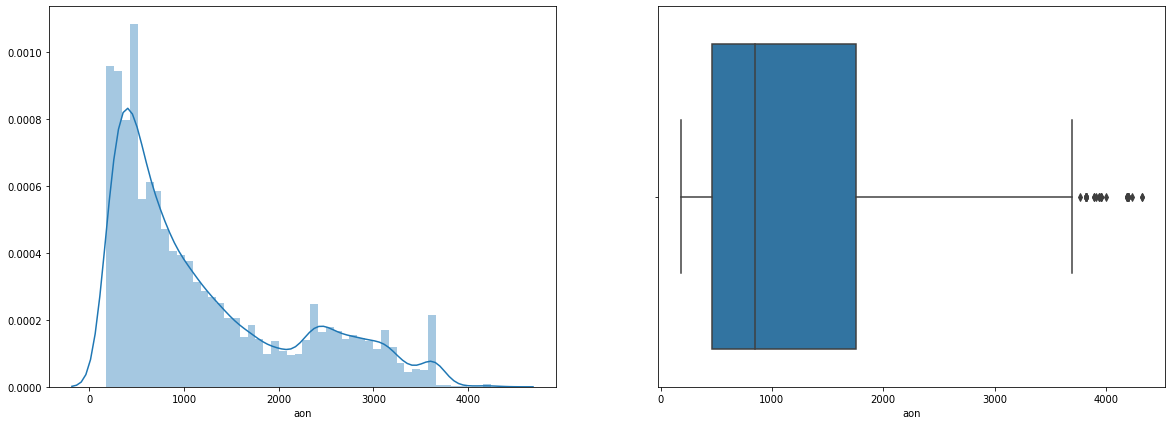

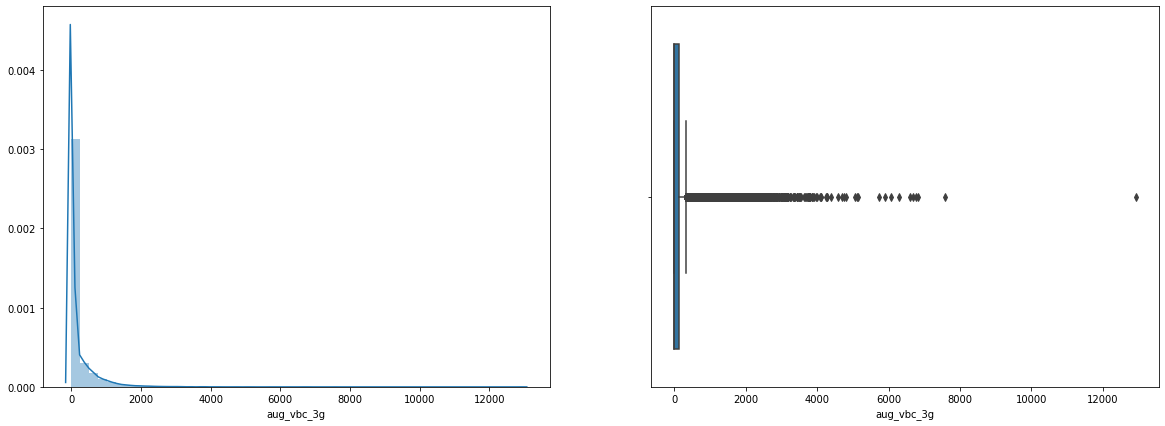

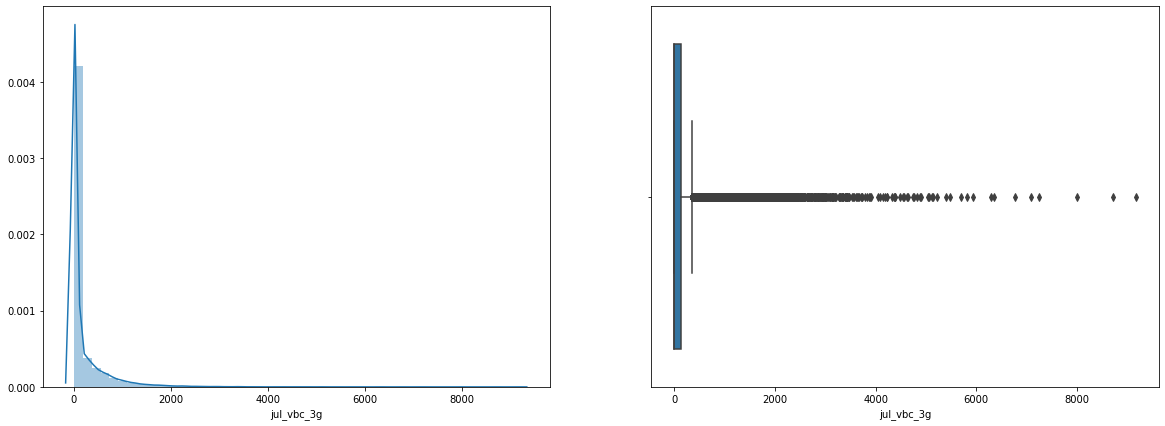

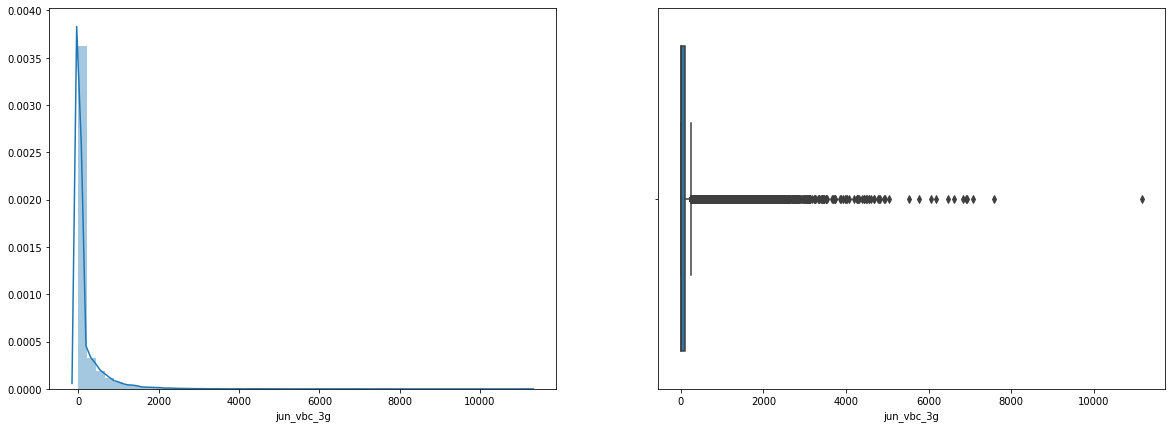

In [207]:
# Numerical column
for col in telecom_hvc.columns:
    if col not in category_list:
        univariate_plot(col)


#### Numerical feature visualisation shows most of them follows power law distribution and there are outliers in most features

In [46]:
def set_scale_label(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [47]:
# Bivariate analysis
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_hvc, showfliers = False)
    set_scale_label(title_1,xlabel,y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_hvc, showfliers = False)
    set_scale_label(title_2,xlabel,y_axis + "_7")

    
    # Subplot - 3
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_hvc, showfliers = False)
    set_scale_label(title_3,xlabel,y_axis + "_8")
    plt.tight_layout()
    plt.show()

In [48]:
telecom_hvc.rename(columns = {'aug_vbc_3g': 'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6'}, inplace = True)

### <font color=green> Bivariate Analysis </font>


Data Visualization of churn vs arpu


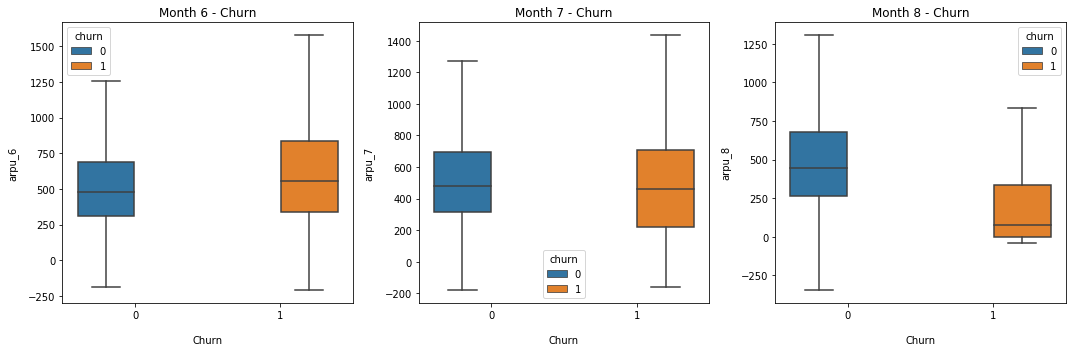


Data Visualization of churn vs onnet_mou


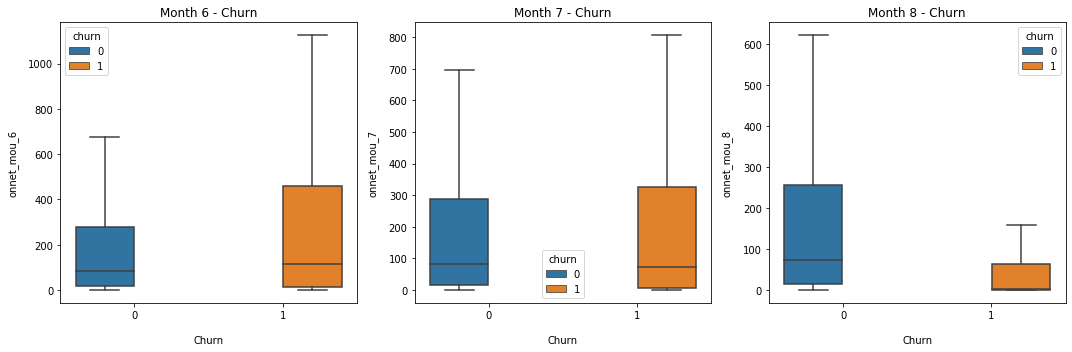


Data Visualization of churn vs offnet_mou


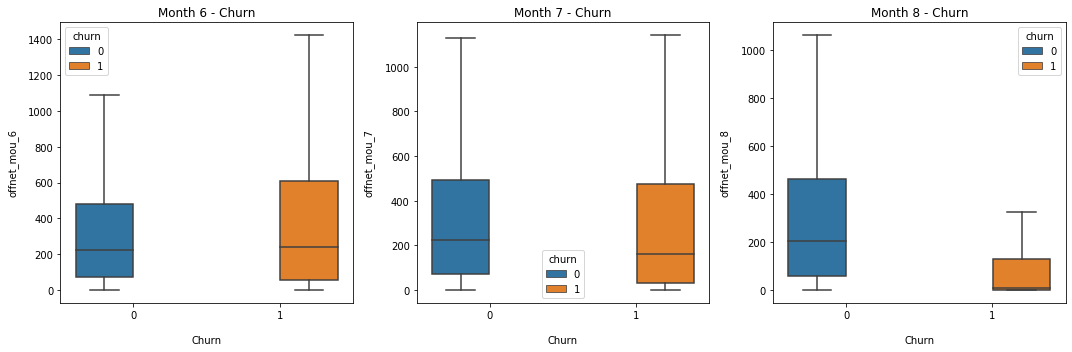


Data Visualization of churn vs total_og_mou


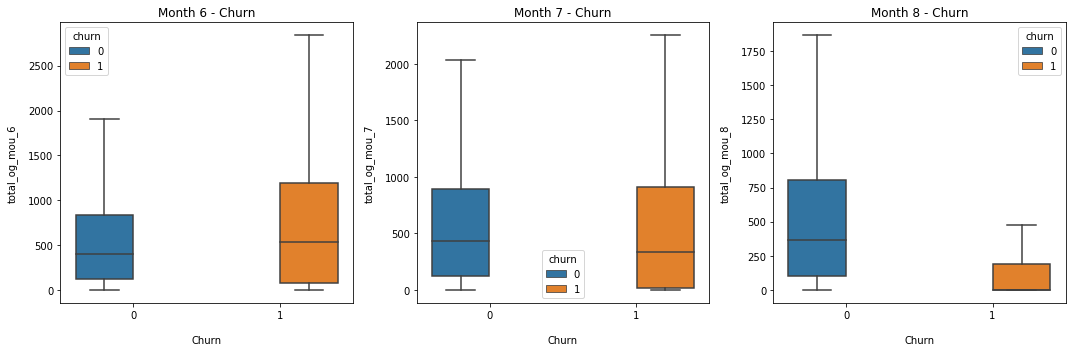


Data Visualization of churn vs total_ic_mou


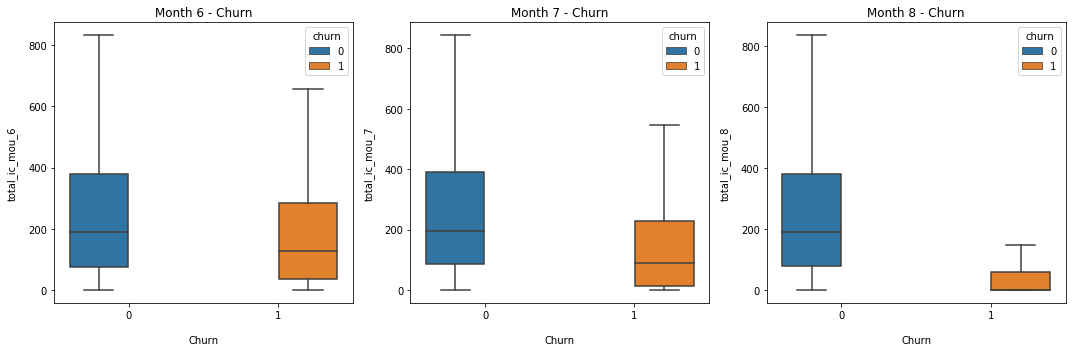


Data Visualization of churn vs total_rech_num


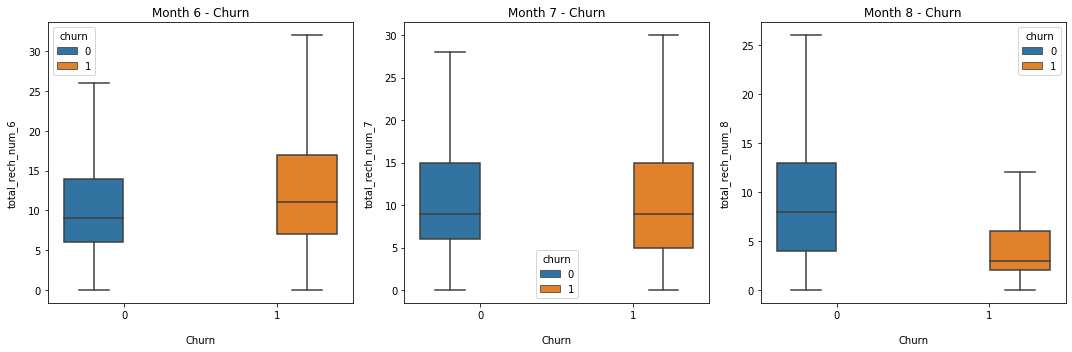


Data Visualization of churn vs total_rech_amt


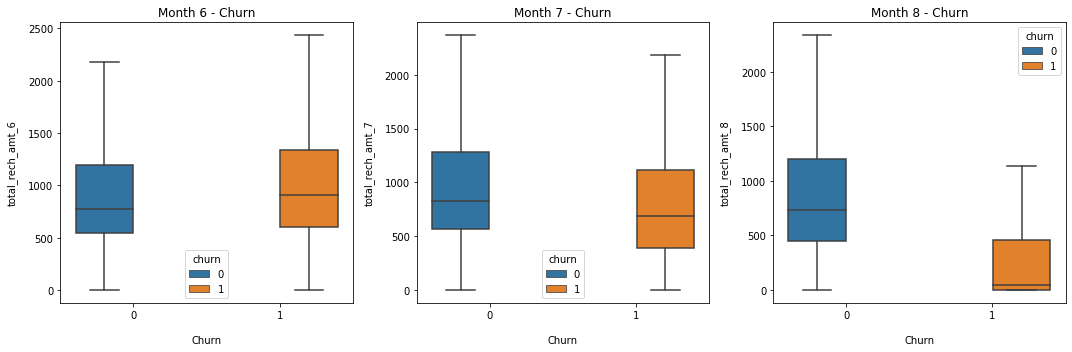


Data Visualization of churn vs date_of_last_rech


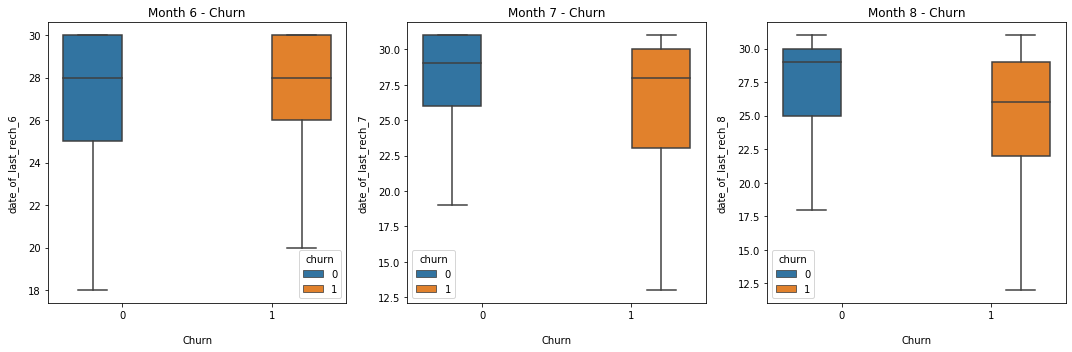


Data Visualization of churn vs vol_2g_mb


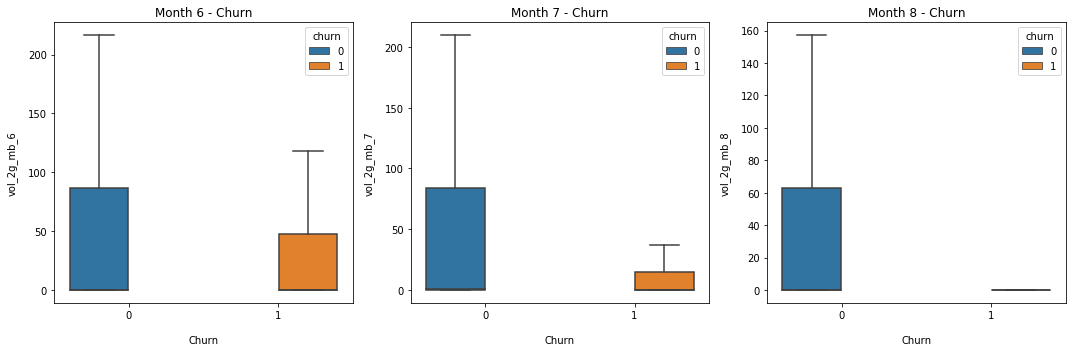


Data Visualization of churn vs vol_3g_mb


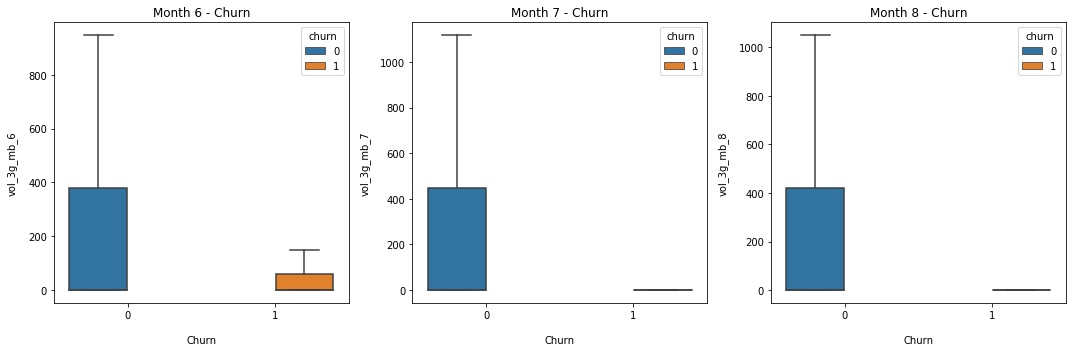


Data Visualization of churn vs vbc_3g


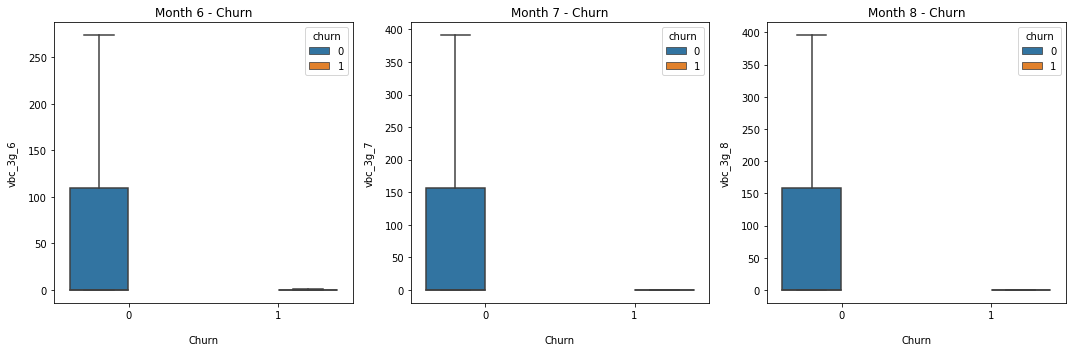

In [49]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate('date_of_last_rech')

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")



#### It is clear from above visualisation that churn in 8 th month has less value of specific feature.

### <font color=green> Correlation Matrix </font>

In [50]:
telecom_hvc.corr()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.00    0.67    0.61         0.34         0.22   
arpu_7                 0.67    1.00    0.76         0.21         0.32   
arpu_8                 0.61    0.76    1.00         0.15         0.23   
onnet_mou_6            0.34    0.21    0.15         1.00         0.75   
onnet_mou_7            0.22    0.32    0.23         0.75         1.00   
onnet_mou_8            0.19    0.27    0.35         0.62         0.81   
offnet_mou_6           0.51    0.35    0.28         0.09         0.05   
offnet_mou_7           0.34    0.49    0.38         0.04         0.09   
offnet_mou_8           0.29    0.40    0.52         0.04         0.08   
roam_ic_mou_6          0.13    0.09    0.09         0.02         0.04   
roam_ic_mou_7          0.08    0.09    0.08         0.02         0.01   
roam_ic_mou_8          0.09    0.09    0.11         0.04         0.04   
roam_og_mou_6          0.20    0.13    0.13         0.08         0.08   
roam_og_mou_7          0.14    0.18    0.14         0.08         0.07   
roam_og_mou_8          0.12    0.15    0.20         0.07         0.08   
loc_og_t2t_mou_6       0.17    0.11    0.10         0.46         0.35   
loc_og_t2t_mou_7       0.13    0.16    0.13         0.36         0.46   
loc_og_t2t_mou_8       0.12    0.14    0.18         0.31         0.38   
loc_og_t2m_mou_6       0.33    0.22    0.21         0.03        -0.01   
loc_og_t2m_mou_7       0.25    0.30    0.27         0.00         0.02   
loc_og_t2m_mou_8       0.22    0.26    0.35        -0.01         0.01   
loc_og_t2f_mou_6       0.14    0.11    0.12        -0.03        -0.04   
loc_og_t2f_mou_7       0.11    0.14    0.14        -0.04        -0.03   
loc_og_t2f_mou_8       0.10    0.12    0.16        -0.04        -0.03   
loc_og_t2c_mou_6       0.05    0.01    0.00         0.05         0.04   
loc_og_t2c_mou_7       0.01    0.04    0.02         0.03         0.05   
loc_og_t2c_mou_8       0.01    0.03    0.06         0.04         0.06   
loc_og_mou_6           0.33    0.21    0.21         0.29         0.20   
loc_og_mou_7           0.25    0.30    0.26         0.23         0.30   
loc_og_mou_8           0.22    0.26    0.35         0.19         0.24   
std_og_t2t_mou_6       0.27    0.17    0.10         0.86         0.64   
std_og_t2t_mou_7       0.16    0.26    0.18         0.64         0.86   
std_og_t2t_mou_8       0.13    0.22    0.28         0.52         0.69   
std_og_t2m_mou_6       0.30    0.20    0.12         0.09         0.07   
std_og_t2m_mou_7       0.18    0.31    0.21         0.04         0.09   
std_og_t2m_mou_8       0.14    0.24    0.32         0.04         0.08   
std_og_t2f_mou_6       0.07    0.05    0.06        -0.02        -0.02   
std_og_t2f_mou_7       0.05    0.07    0.07        -0.02        -0.02   
std_og_t2f_mou_8       0.04    0.05    0.07        -0.03        -0.02   
std_og_mou_6           0.39    0.25    0.15         0.63         0.47   
std_og_mou_7           0.23    0.38    0.26         0.45         0.63   
std_og_mou_8           0.18    0.31    0.40         0.37         0.51   
isd_og_mou_6           0.47    0.42    0.39        -0.01        -0.01   
isd_og_mou_7           0.42    0.51    0.44        -0.02        -0.01   
isd_og_mou_8           0.41    0.45    0.45        -0.01        -0.01   
spl_og_mou_6           0.12    0.07    0.10         0.10         0.06   
spl_og_mou_7           0.07    0.11    0.13         0.08         0.11   
spl_og_mou_8           0.04    0.07    0.11         0.08         0.11   
og_others_6            0.05    0.02    0.01         0.05         0.03   
og_others_7            0.02    0.03    0.02        -0.00        -0.00   
og_others_8            0.02    0.02    0.01        -0.00         0.00   
total_og_mou_6         0.55    0.37    0.28         0.72         0.52   
total_og_mou_7         0.36    0.54    0.40         0.52         0.72   
total_og_mou_8         0.30    0.43    0.56         0.42         0.57   
loc_ic

In [51]:
# Identify highly correlated columns like > 80%
corr_matrix = telecom_hvc.corr().abs()

#the matrix is symmetric so we need to extract either upper\lower triangle matrix without diagonal (k = 1)
one_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in one_triangle.columns if any(one_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print_ln()
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
---------------------------------------------------------------------------------------------------- 



Total features with high correlation -  45


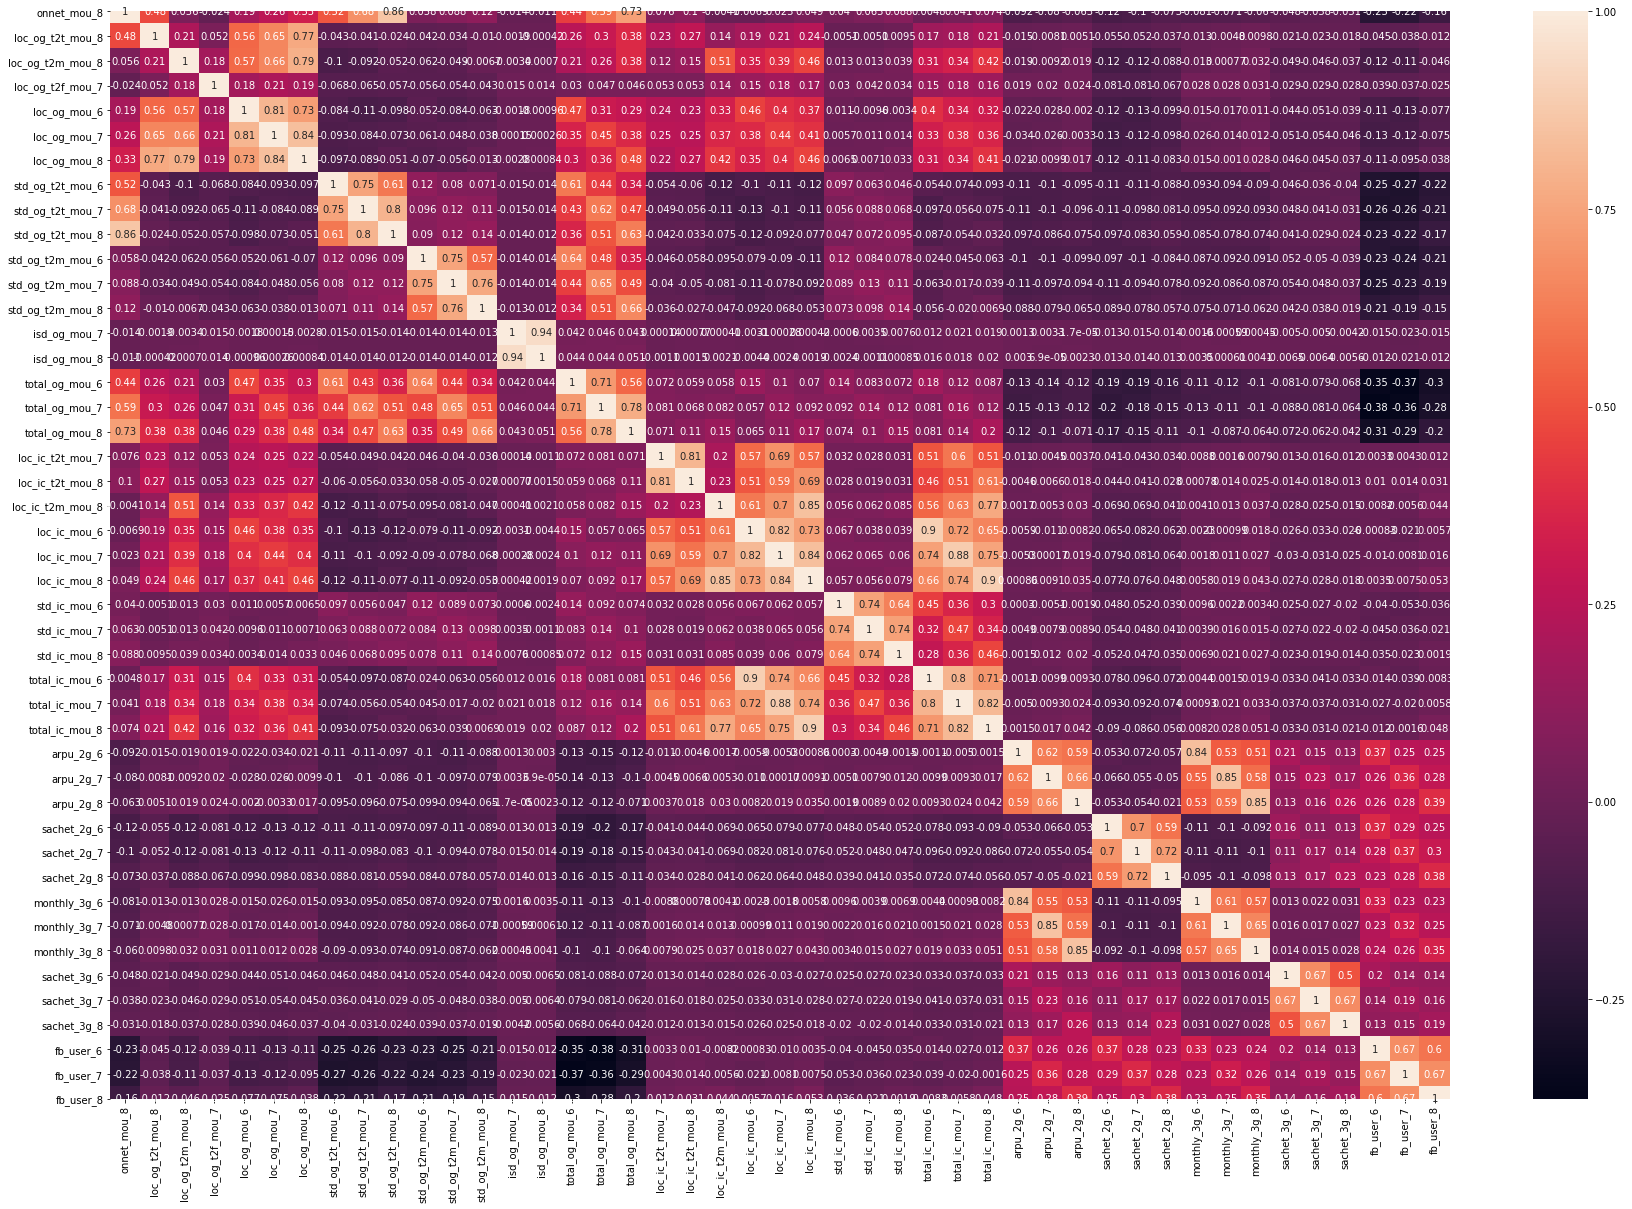

In [52]:
# Plot these highly correlated features in heat map
plt.figure(figsize=(30,20))
plt.subplot(1,1,1)
sns.heatmap(telecom_hvc[highly_correlated_features].corr(),annot=True)
plt.show()

#### While doing PCA correlation will be taken care 
#### For good predictor model will remove later

### <font color=green> Outlier Treatment </font>

In [54]:
telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00   
mean    558.49   560.78   508.60       260.79       267.82       234.11   
std     460.64   479.78   501.96       459.64       479.99       458.45   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
1%        1.00     0.70     0.00         0.00         0.00         0.00   
10%     171.60   177.89    84.00         0.70         0.58         0.00   
25%     309.87   309.83   231.47        17.08        16.03        10.39   
50%     481.69   480.94   427.58        84.58        82.81        65.61   
75%     699.94   698.32   661.49       290.44       290.24       239.96   
90%     994.10   995.86   977.35       754.16       784.48       665.08   
95%    1240.96  1261.27  1255.02      1135.44      1185.79      1074.59   
99%    1985.12  1999.50  1986.62      2151.74      2201.96      2159.11   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         373.69        378.10        335.08          16.11          12.64   
std          482.52        498.92        482.06          76.30          75.79   
min            0.00          0.00          0.00           0.00           0.00   
1%             0.00          0.00          0.00           0.00           0.00   
10%           11.26         10.43          2.20           0.00           0.00   
25%           71.61         69.91         46.74           0.00           0.00   
50%          222.54        220.03        182.79           0.00           0.00   
75%          487.94        494.01        438.89           0.00           0.00   
90%          895.83        916.08        823.68          27.39          14.29   
95%         1256.61       1272.29       1167.54          84.54          55.64   
99%         2326.36       2410.89       2193.13         342.44         280.46   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean           12.50          26.57          20.15          19.87   
std            74.13         116.21          96.10         104.72   
min             0.00           0.00           0.00           0.00   
1%              0.00           0.00           0.00           0.00   
10%             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.01          50.43          31.09          28.88   
95%            56.35         145.41         104.24         100.51   
99%           282.19         530.71         438.59         427.03   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean              84.48             85.67             78.08            163.24   
std              228.79            240.53            227.37            250.12   
min                0.00              0.00              0.00              0.00   
1%                 0.00              0.00              0.00              0.00   
10%                0.00              0.00              0.00              1.00   
25%                4.38              4.61              2.53             19.21   
50%               24.33             24.68             20.73             77.18   
75%               77.98             78.34             72.04            208.93   
90%              187.93            190.84    

In [55]:
# Remove based on z value
from scipy import stats
temp =telecom_hvc[(np.abs(stats.zscore(telecom_hvc)) < 3).all(axis=1)]
temp.describe()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 11869.00 11869.00 11869.00     11869.00     11869.00     11869.00   
mean    454.44   455.39   419.65       203.09       208.46       186.52   
std     225.17   222.35   243.08       276.64       288.03       266.94   
min     -20.66   -78.78   -17.85         0.00         0.00         0.00   
25%     301.23   300.85   246.74        20.81        19.39        15.83   
50%     439.30   441.87   402.59        85.59        83.79        71.58   
75%     578.91   577.47   559.34       267.33       267.16       234.51   
max    1894.76  1896.76  1927.66      1525.36      1610.21      1546.01   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      11869.00      11869.00      11869.00       11869.00       11869.00   
mean         297.55        302.39        275.85           7.18           4.11   
std          286.60        294.47        279.21          24.90          17.68   
min            0.00          0.00          0.00           0.00           0.00   
25%           80.48         80.03         63.38           0.00           0.00   
50%          214.34        215.08        193.01           0.00           0.00   
75%          427.24        433.21        398.89           0.00           0.00   
max         1812.73       1782.36       1776.29         244.66         239.66   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       11869.00       11869.00       11869.00       11869.00   
mean            4.65          13.14           7.80           8.59   
std            19.08          43.40          30.76          33.66   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max           234.46         373.39         303.11         331.83   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          11869.00          11869.00          11869.00          11869.00   
mean              62.54             62.80             58.88            144.08   
std               94.66             94.22             89.54            161.81   
min                0.00              0.00              0.00              0.00   
25%                6.26              6.64              5.29             24.81   
50%               27.48             28.03             25.28             86.68   
75%               77.26             77.48             72.73            207.44   
max              747.93            787.48            757.56            904.81   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          11869.00          11869.00          11869.00          11869.00   
mean             146.12            138.22              4.02              4.05   
std              160.30            156.04              8.63              8.58   
min                0.00              0.00              0.00              0.00   
25%               27.09             22.28              0.00              0.00   
50%               90.31             82.61              0.13              0.23   
75%              208.73            203.56              3.81              3.88   
max              869.16            848.61             72.39             71.58   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          11869.00          11869.00          11869.00          11869.00   
mean               3.83              0.92              1.08              1.02   
std                8.15              2.69              3.22              2.96   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%                0.00           

In [56]:
# If we remove the rows where any of the feature has outlier value it will be loss of good amount of data. So we did no do this.
temp.shape

(11869, 149)

In [57]:
# We will replace the outlier value with the 99 percentile value in order to preserve the data
for col in telecom_hvc.columns:
    percentiles = telecom_hvc[col].quantile([0.01,0.99]).values
    telecom_hvc[col][telecom_hvc[col] <= percentiles[0]] = percentiles[0]
    telecom_hvc[col][telecom_hvc[col] >= percentiles[1]] = percentiles[1]
telecom_hvc.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30001.00 30001.00 30001.00     30001.00     30001.00     30001.00   
mean    548.81   551.08   498.24       252.17       258.62       224.90   
std     358.13   360.43   383.30       403.51       418.17       390.86   
min       1.00     0.70     0.00         0.00         0.00         0.00   
1%        1.00     0.70     0.00         0.00         0.00         0.00   
10%     171.60   177.89    84.00         0.70         0.58         0.00   
25%     309.87   309.83   231.47        17.08        16.03        10.39   
50%     481.69   480.94   427.58        84.58        82.81        65.61   
75%     699.94   698.32   661.49       290.44       290.24       239.96   
90%     994.10   995.86   977.35       754.16       784.48       665.08   
95%    1240.96  1261.27  1255.02      1135.44      1185.79      1074.59   
99%    1985.12  1999.50  1986.62      2151.74      2201.96      2159.11   
max    1985.12  1999.50  1986.62      2151.74      2201.96      2159.11   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         365.89        369.52        325.04          13.57           9.64   
std          434.20        443.92        409.75          49.34          38.70   
min            0.00          0.00          0.00           0.00           0.00   
1%             0.00          0.00          0.00           0.00           0.00   
10%           11.26         10.43          2.20           0.00           0.00   
25%           71.61         69.91         46.74           0.00           0.00   
50%          222.54        220.03        182.79           0.00           0.00   
75%          487.94        494.01        438.89           0.00           0.00   
90%          895.83        916.08        823.68          27.39          14.29   
95%         1256.61       1272.29       1167.54          84.54          55.64   
99%         2326.36       2410.89       2193.13         342.44         280.46   
max         2326.36       2410.89       2193.13         342.44         280.46   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean            9.76          22.73          16.69          15.99   
std            38.95          79.31          62.86          60.49   
min             0.00           0.00           0.00           0.00   
1%              0.00           0.00           0.00           0.00   
10%             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            15.01          50.43          31.09          28.88   
95%            56.35         145.41         104.24         100.51   
99%           282.19         530.71         438.59         427.03   
max           282.19         530.71         438.59         427.03   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean              76.28             76.68             69.73            157.67   
std              149.89            150.83            136.80            212.56   
min                0.00              0.00              0.00              0.00   
1%                 0.00              0.00              0.00              0.00   
10%                0.00              0.00              0.00              1.00   
25%                4.38              4.61              2.53             19.21   
50%               24.33             24.68             20.73             77.18   
75%               77.98             78.34             72.04            208.93   
90%              187.93            190.84    

### <font color=green> Feature Engineering </font>

In [58]:
# create age bins for the 'aon' (age on network) feature
telecom_hvc['age_bin'] = np.round(telecom_hvc['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_hvc['age_bin'] = pd.cut(telecom_hvc['age_bin'], bins)


In [59]:
telecom_hvc.groupby('churn')['age_bin'].value_counts().sort_values(ascending=False)

churn  age_bin
0      (4, 10]    8615
       (1, 2]     7048
       (0, 1]     5086
       (2, 3]     4067
       (3, 4]     2744
1      (1, 2]      771
       (0, 1]      703
       (2, 3]      429
       (4, 10]     363
       (3, 4]      175
Name: age_bin, dtype: int64

In [60]:
telecom_hvc.age_bin.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [61]:
telecom_hvc.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 1986.62        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [62]:
cat_cols = ['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']
#Change dtype of categorical variables to type object
telecom_hvc[cat_cols] = telecom_hvc[cat_cols].astype('object')

In [63]:
telecom_hvc.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 150 columns):
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7          

In [64]:
# Create dummy variables for categorical columns
print('shape before dummy ', telecom_hvc.shape)
telecom_hvc = pd.get_dummies(telecom_hvc, drop_first=True)
print('shape after dummy ', telecom_hvc.shape)

shape before dummy  (30001, 150)
shape after dummy  (30001, 162)


In [65]:
telecom_hvc.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 1986.62        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [66]:
telecom_hvc.drop('aon',inplace=True,axis=1)

In [67]:
telecom_hvc.rename(columns={'age_bin_(1, 2]':'age_bin_1_2','age_bin_(2, 3]':'age_bin_2_3','age_bin_(3, 4]':'age_bin_3_4','age_bin_(4, 10]':'age_bin_4_10'},inplace=True)
telecom_hvc.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 1986.62        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [68]:
telecom_hvc.shape

(30001, 161)

In [71]:
# Derive shocking columns based on good phase and action phase
def derive_shocking_col(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    # To handle the customer who joined in action phase only
    df[good_phase_col] = np.where((df[good_phase_col]==0) & (df[col_8]>0) ,df[col_8],df[good_phase_col])
    
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    #df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [72]:
# Derive Good and Action Phase Variables

telecom_hvc = derive_shocking_col(telecom_hvc, "arpu")

telecom_hvc = derive_shocking_col(telecom_hvc, "onnet_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "offnet_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "roam_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "roam_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "loc_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "std_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "isd_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "spl_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "og_others")

telecom_hvc = derive_shocking_col(telecom_hvc, "total_og_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "loc_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "std_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "spl_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "isd_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "ic_others")

telecom_hvc = derive_shocking_col(telecom_hvc, "total_ic_mou")

telecom_hvc = derive_shocking_col(telecom_hvc, "total_rech_num")

telecom_hvc = derive_shocking_col(telecom_hvc, "total_rech_amt")

telecom_hvc = derive_shocking_col(telecom_hvc, "max_rech_amt")

telecom_hvc = derive_shocking_col(telecom_hvc, "max_rech_data")

telecom_hvc = derive_shocking_col(telecom_hvc, "count_rech_2g")

telecom_hvc = derive_shocking_col(telecom_hvc, "count_rech_3g")

telecom_hvc = derive_shocking_col(telecom_hvc, "vol_2g_mb")

telecom_hvc = derive_shocking_col(telecom_hvc, "vol_3g_mb")

telecom_hvc = derive_shocking_col(telecom_hvc, "sachet_2g")

telecom_hvc = derive_shocking_col(telecom_hvc, "monthly_3g")

telecom_hvc = derive_shocking_col(telecom_hvc, "sachet_3g")

telecom_hvc = derive_shocking_col(telecom_hvc, "vbc_3g")

telecom_hvc.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 1986.62        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [73]:
telecom_hvc.shape

(30001, 219)

### <font color= red> Model Building </font>

In [74]:
#Train Test Split
# Normalization
# class imbalance (SMOTE, class_weight)
#PCA
#Hyper parameter tuning
# Logistic
# random forest
# xgboost


In [75]:
def get_metrics(ytrue,ypred):
    confusion_rfm2 = confusion_matrix(ytrue, ypred)
    print(confusion_rfm2, '\n')
    TP = confusion_rfm2[1,1] # true positive 
    TN = confusion_rfm2[0,0] # true negatives
    FP = confusion_rfm2[0,1] # false positives
    FN = confusion_rfm2[1,0] # false negatives

    print('Accuracy Score on test data: ', metrics.accuracy_score(ytrue, ypred))
    print('F1 Score on test data: ', metrics.f1_score(ytrue, ypred))

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity: ', TP / float(TP+FN))

    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))

    # Calculate false negative rate - predicting no churn when customer is churned
    print('false negative rate: ',FN/ float(TP+FN))  

    # positive predictive value 
    print('positive predictive value: ', TP / float(TP+FP))

    # Negative predictive value
    print('Negative predictive value: ',TN / float(TN+ FN))

    ## Misclassification rate

    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### <font color=green> Train Test split </font>

In [76]:
X = telecom_hvc.drop('churn', axis = 1)
y = telecom_hvc['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 218)
(21000,)
(9001, 218)
(9001,)


### <font color=green> Data standardisation </font>

In [77]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

### <font color=green> Handling class imbalance </font>

In [78]:
### using class weight='balanced' It is done separately 
### using SMOTE ->SMOTEENN  Combined over and under sampling
### SMOTEENN gave good results so it is explained in this notebook

In [79]:
###
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_train, y_train = sme.fit_resample(X_train, y_train)

### <font color=green> PCA </font>

In [81]:
pca = PCA(svd_solver='randomized', random_state=42)

In [82]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [83]:
pca.components_

array([[-8.76386093e-02, -6.12967512e-02,  1.09511141e-02, ...,
        -3.49358633e-02,  9.41762964e-02, -2.21021357e-02],
       [ 9.98881820e-02,  1.49249091e-01,  1.76040135e-01, ...,
         3.35375078e-02,  4.06529592e-02,  2.21858196e-02],
       [ 1.48098752e-01,  8.44884916e-02, -4.45308942e-02, ...,
        -5.13642603e-02,  9.35571673e-02, -6.70040163e-02],
       ...,
       [-0.00000000e+00, -5.66718490e-17,  2.04884248e-13, ...,
        -1.23940802e-12,  8.28034058e-13,  5.99418696e-13],
       [ 0.00000000e+00,  3.06202927e-17,  8.95301806e-12, ...,
         5.85170837e-13,  1.15450838e-11,  8.35780693e-12],
       [-4.85542945e-01, -4.88915386e-01,  3.21384947e-01, ...,
        -2.77989437e-16, -6.15826834e-17, -4.14165230e-17]])

In [84]:
pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':list(X_train.columns)})

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  \
0   -0.09  0.10  0.15 -0.00 -0.01  0.08 -0.02  0.02 -0.07 -0.08   
1   -0.06  0.15  0.08  0.08  0.03  0.05  0.03  0.03 -0.08 -0.06   
2    0.01  0.18 -0.04  0.15  0.03  0.02  0.02  0.03 -0.07 -0.03   
3   -0.13  0.03  0.05  0.05  0.06 -0.05 -0.26  0.13  0.07 -0.07   
4   -0.11  0.06  0.01  0.09  0.07 -0.06 -0.21  0.14  0.02 -0.02   
5   -0.05  0.08 -0.05  0.12  0.05 -0.04 -0.12  0.09 -0.06  0.04   
6   -0.13  0.08  0.07 -0.03  0.03  0.07  0.19 -0.18 -0.05 -0.00   
7   -0.11  0.11  0.03  0.03  0.04  0.05  0.19 -0.14 -0.08  0.04   
8   -0.03  0.13 -0.06  0.09  0.03  0.02  0.09 -0.05 -0.10  0.07   
9   -0.01  0.01  0.02  0.12 -0.15  0.24 -0.06 -0.03  0.02  0.00   
10  -0.02 -0.00  0.04  0.12 -0.17  0.25 -0.07 -0.03  0.04 -0.03   
11  -0.03  0.01  0.04  0.09 -0.08  0.15 -0.04 -0.00  0.06 -0.05   
12  -0.02  0.00  0.03  0.14 -0.16  0.26 -0.08 -0.05 -0.00 -0.01   
13  -0.04 -0.01  0.04  0.14 -0.16  0.25 -0.08 -0.05  0.03 -0.05   
14  -0.04  0.01  0.04  0.11 -0.08  0.15 -0.04 -0.01  0.04 -0.06   
15  -0.02  0.09 -0.01 -0.07 -0.01 -0.01 -0.13 -0.02 -0.04 -0.04   
16  -0.01  0.10 -0.03 -0.05 -0.00 -0.01 -0.12 -0.02 -0.06 -0.04   
17   0.00  0.11 -0.05 -0.01  0.00 -0.01 -0.09 -0.02 -0.07 -0.01   
18  -0.02  0.13 -0.01 -0.12 -0.03  0.01 -0.04 -0.08 -0.07 -0.03   
19  -0.01  0.14 -0.03 -0.08 -0.02  0.01 -0.02 -0.07 -0.07 -0.01   
20   0.01  0.14 -0.06 -0.02 -0.01 -0.00 -0.02 -0.05 -0.08  0.00   
21   0.02  0.08  0.00 -0.05 -0.05 -0.01  0.01  0.01 -0.01 -0.01   
22   0.02  0.08 -0.00 -0.04 -0.05 -0.01  0.02  0.02 -0.01 -0.02   
23   0.02  0.08 -0.02 -0.01 -0.04 -0.02  0.01  0.01 -0.01 -0.01   
24  -0.01  0.01  0.01 -0.02  0.04  0.03 -0.01  0.02 -0.01  0.00   
25  -0.01  0.02  0.00  0.01  0.05  0.02  0.01  0.02  0.01  0.01   
26  -0.00  0.03 -0.03  0.04  0.04  0.00 -0.00  0.01 -0.01  0.01   
27  -0.02  0.14 -0.01 -0.12 -0.03  0.01 -0.10 -0.07 -0.07 -0.05   
28  -0.01  0.15 -0.03 -0.08 -0.01 -0.00 -0.08 -0.06 -0.08 -0.03   
29   0.01  0.15 -0.07 -0.02 -0.00 -0.01 -0.06 -0.05 -0.09 -0.01   
30  -0.14 -0.01  0.06  0.08  0.09 -0.09 -0.21  0.16  0.10 -0.05   
31  -0.11  0.02  0.02  0.11  0.09 -0.09 -0.17  0.16  0.05 -0.00   
32  -0.05  0.04 -0.04  0.12  0.06 -0.05 -0.08  0.11 -0.03  0.06   
33  -0.14  0.01  0.08  0.02  0.08  0.02  0.24 -0.16 -0.00  0.03   
34  -0.12  0.03  0.04  0.07  0.09  0.01  0.24 -0.11 -0.04  0.07   
35  -0.05  0.05 -0.03  0.10  0.06  0.00  0.12 -0.02 -0.07  0.10   
36   0.01  0.04  0.00 -0.02 -0.04  0.00  0.04  0.04  0.03  0.01   
37   0.01  0.04  0.00 -0.01 -0.04  0.00  0.04  0.05  0.03  0.02   
38   0.01  0.04 -0.01 -0.00 -0.03 -0.00  0.03  0.03  0.02  0.02   
39  -0.18  0.00  0.10  0.06  0.11 -0.04  0.03 -0.01  0.06 -0.01   
40  -0.15  0.03  0.04  0.12  0.12 -0.05  0.05  0.03  0.00  0.04   
41  -0.06  0.06 -0.05  0.15  0.08 -0.03  0.03  0.06 -0.07  0.11   
42   0.01  0.02  0.04 -0.03 -0.07  0.00  0.14  0.25 -0.18 -0.19   
43   0.01  0.03  0.03 -0.02 -0.05  0.00  0.12  0.22 -0.15 -0.17   
44   0.01  0.03  0.01  0.00 -0.03  0.01  0.08  0.13 -0.08 -0.10   
45  -0.03  0.01  0.02 -0.03  0.08  0.04 -0.01  0.02 -0.00 -0.00   
46  -0.03  0.03  0.00  0.00  0.09  0.03  0.00  0.02 -0.01  0.01   
47  -0.01  0.05 -0.04  0.04  0.06  0.00 -0.00  0.02 -0.03  0.03   
48  -0.05  0.01  0.01 -0.05  0.08  0.03 -0.04 -0.01 -0.02 -0.01   
49  -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00   
50  -0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00   
51  -0.18  0.08  0.08 -0.01  0.09 -0.03 -0.02 -0.03  0.01 -0.05   
52  -0.14  0.11  0.02  0.07  0.10 -0.04  0.01  0.00 -0.05  0.02   
53  -0.05  0.13 -0.08  0.12  0.06 -0.03 -0.01  0.03 -0.11  0.09   
54  -0.00  0.10 -0.02 -0.11 -0.01  0.02 -0.09 -0.01  0.02 -0.01   
55   0.00  0.11 -0.03 -0.08 -0.00  0.01 -0.07 -0.01  0.01  0.00   
56   0.02  0.11 -0.06 -0.03 -0.00  0.00 -0.06 -0.01 -0.01  0.01   
57  -0.00  0.13 -0.02 -0.16 -0.02  0.03 -0.04 -0.05  0.02  0.01   
58   0.01  0.15 -0.04 -0.12 -0.01  0.03 -0.03 -0.04  

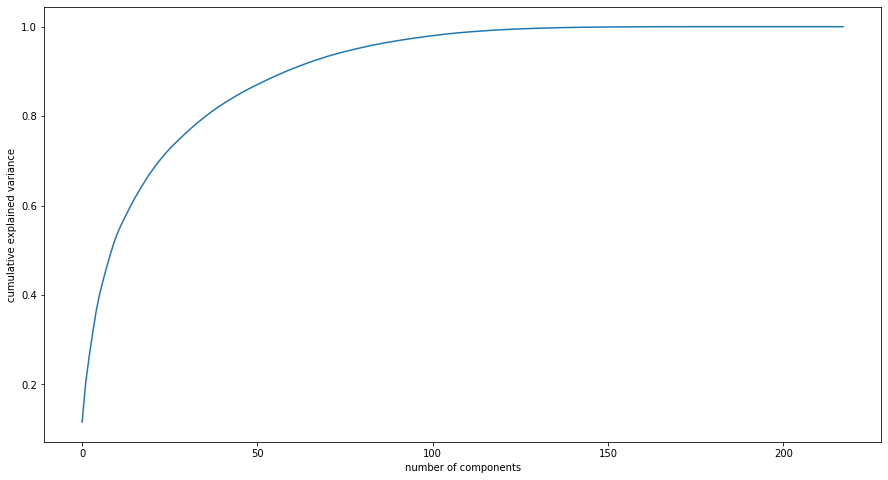

In [85]:
## scree curve
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [87]:
# choose 95% variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(33037, 75)

In [88]:
# Correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

In [89]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.028537079838185247 , min corr:  -0.020006560143457624


In [90]:
#Applying selected components to the test data - 60 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 75)

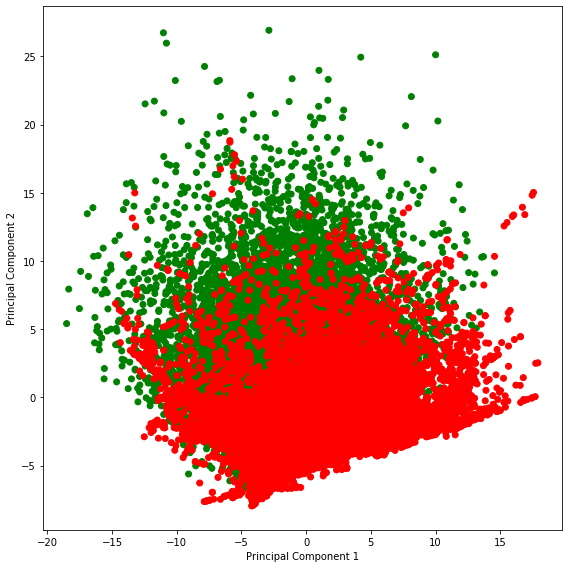

In [91]:
# Visualise top priciple components
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

##### <font color=green> Logistic regression model with 75 PCA to explain 95% variance in data </font>

In [92]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lg_pca = LogisticRegression()
model_pca = lg_pca.fit(df_train_pca,y_train)

In [93]:
y_test_predprob = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_predprob))

'0.89'

In [94]:
y_test_predchurn = model_pca.predict(df_test_pca)
y_test_predchurn

array([0, 1, 1, ..., 0, 1, 0])

In [95]:
get_metrics(y_test,y_test_predchurn)

[[6190 2110]
 [  95  606]] 

Accuracy Score on test data:  0.7550272191978669
F1 Score on test data:  0.35469710272168564
Sensitivity:  0.8644793152639088
Specificity:  0.7457831325301205
false negative rate:  0.1355206847360913
positive predictive value:  0.22312223858615612
Negative predictive value:  0.984884645982498
Misclassification Rate:  0.24497278080213308


In [96]:
# Converting y_pred to a dataframe which is an array
y_test_predprob_df = pd.DataFrame(y_test_predprob)


In [97]:
y_test_predprob_df

0
0    0.01
1    0.98
2    1.00
3    0.01
4    0.57
...   ...
8996 0.77
8997 0.05
8998 0.03
8999 0.83
9000 0.00

[9001 rows x 1 columns]

In [98]:
# Removing index for both dataframes to append them side by side 
y_test_predprob_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test and y_test_predprob_df
y_pred_final = pd.concat([y_test,y_test_predprob_df],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})
y_pred_final

churn  churn_prob
0         0        0.01
1         1        0.98
2         0        1.00
3         0        0.01
4         0        0.57
...     ...         ...
8996      0        0.77
8997      0        0.05
8998      0        0.03
8999      0        0.83
9000      0        0.00

[9001 rows x 2 columns]

In [99]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

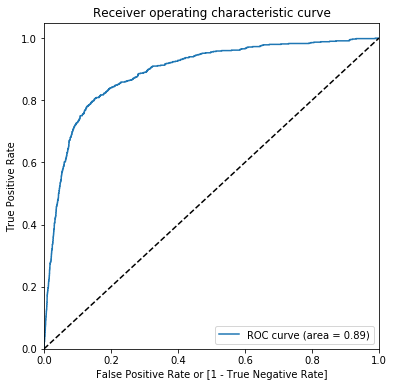

(array([0.00000000e+00, 1.20481928e-04, 1.20481928e-04, ...,
        9.99759036e-01, 9.99879518e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00142653, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99996587e+00, 9.99965868e-01, 9.99881780e-01, ...,
        1.98076096e-08, 1.42701836e-08, 8.20586692e-09]))

In [100]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [101]:
#different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0        0.01    1    0    0    0    0    0    0    0    0    0
1      1        0.98    1    1    1    1    1    1    1    1    1    1
2      0        1.00    1    1    1    1    1    1    1    1    1    1
3      0        0.01    1    0    0    0    0    0    0    0    0    0
4      0        0.57    1    1    1    1    1    1    0    0    0    0

In [102]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   0.00   1.00
0.10  0.10      0.51   0.47   0.96
0.20  0.20      0.60   0.58   0.94
0.30  0.30      0.67   0.65   0.91
0.40  0.40      0.72   0.70   0.89
0.50  0.50      0.76   0.75   0.86
0.60  0.60      0.79   0.79   0.85
0.70  0.70      0.83   0.83   0.82
0.80  0.80      0.86   0.87   0.78
0.90  0.90      0.90   0.92   0.69


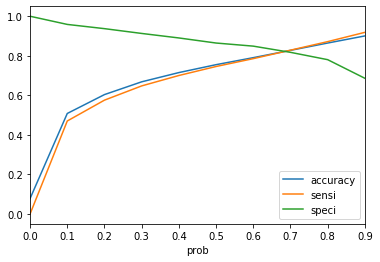

In [103]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [104]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.6883101048268477]


In [105]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)

y_pred_final.churn.value_counts()

0    8300
1     701
Name: churn, dtype: int64

In [106]:
get_metrics(y_pred_final.churn,y_pred_final.pred_churn)


[[6221 2079]
 [  96  605]] 

Accuracy Score on test data:  0.7583601822019775
F1 Score on test data:  0.35745937961595275
Sensitivity:  0.8630527817403709
Specificity:  0.7495180722891567
false negative rate:  0.1369472182596291
positive predictive value:  0.22540983606557377
Negative predictive value:  0.9848029127750515
Misclassification Rate:  0.24163981779802243


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn, y_pred_final.pred_churn))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      8300
           1       0.23      0.86      0.36       701

    accuracy                           0.76      9001
   macro avg       0.61      0.81      0.60      9001
weighted avg       0.93      0.76      0.81      9001



### <font color=green> SVM with 75 PCA to explain 95% variance in data </font>

In [108]:
### using svm
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf',gamma='auto')
model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

In [109]:
# confusion matrix
confusion_svm1= confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion_svm1

array([[7315,  985],
       [ 207,  494]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8300
           1       0.33      0.70      0.45       701

    accuracy                           0.87      9001
   macro avg       0.65      0.79      0.69      9001
weighted avg       0.92      0.87      0.89      9001



In [111]:
get_metrics(y_test,y_pred)

[[7315  985]
 [ 207  494]] 

Accuracy Score on test data:  0.8675702699700033
F1 Score on test data:  0.45321100917431195
Sensitivity:  0.7047075606276747
Specificity:  0.8813253012048192
false negative rate:  0.29529243937232524
positive predictive value:  0.33400946585530766
Negative predictive value:  0.9724807232119117
Misclassification Rate:  0.13242973002999667


### <font color=green> SVM hyperparameter tuning </font>

In [112]:
 #creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [113]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0          126.97          0.82            10.00            0.18       1   
1           59.12          0.67             9.65            0.23       1   
2           77.93          2.03            13.90            0.68       1   
3          137.94          2.47             6.45            0.21      10   
4           49.69          1.42             7.36            0.42      10   
5           58.58          1.61            10.82            0.45      10   
6          150.61         30.24             5.97            0.14     100   
7           55.18          0.43             3.91            0.27     100   
8           61.30          2.88             9.62            0.49     100   
9          124.37          2.10             4.94            0.39    1000   
10          74.58          3.04             2.15            0.11    1000   
11          75.69         12.89             3.12            0.39    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}               1.00   
1         0.00      {'C': 1, 'gamma': 0.001}               0.98   
2         0.00     {'C': 1, 'gamma': 0.0001}               0.96   
3         0.01      {'C': 10, 'gamma': 0.01}               1.00   
4         0.00     {'C': 10, 'gamma': 0.001}               0.99   
5         0.00    {'C': 10, 'gamma': 0.0001}               0.97   
6         0.01     {'C': 100, 'gamma': 0.01}               1.00   
7         0.00    {'C': 100, 'gamma': 0.001}               1.00   
8         0.00   {'C': 100, 'gamma': 0.0001}               0.98   
9         0.01    {'C': 1000, 'gamma': 0.01}               1.00   
10        0.00   {'C': 1000, 'gamma': 0.001}               1.00   
11        0.00  {'C': 1000, 'gamma': 0.0001}               0.99   

    split1_test_score  split2_test_score  split3_test_score  \
0                1.00               1.00               1.00   
1                0.98               0.98               0.97   
2                0.96               0.96               0.96   
3                1.00               1.00               1.00   
4                0.99               0.99               0.99   
5                0.97               0.97               0.96   
6                1.00               1.00               1.00   
7                1.00               1.00               1.00   
8                0.98               0.98               0.97   
9                1.00               1.00               1.00   
10               0.99               1.00               0.99   
11               0.99               0.99               0.99   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0                1.00             1.00            0.00                4   
1                0.98             0.98            0.00               10   
2                0.96             0.96            0.00               12   
3                1.00             1.00            0.00                1   
4                0.99             0.99            0.00                7   
5                0.96             0.96            0.00               11   
6                1.00             1.00            0.00                2   
7                1.00             1.00            0.00                5   
8                0.98             0.98            0.00                9   
9                1.00             1.00            0.00                3   
10               0.99             0.99            0.00                6   
11               0.99             0.99            0.00                8   

    split0_train_score  split1_train_score  split2_train_score  \
0                 1.00                1.00                1.00   
1                 0.98                0.98                0.98   
2                 0.96                0.96                0.96   
3                 1.00                1.00                1.00   
4                

In [114]:
# printing the optimal roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.999391712237137 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [116]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

# metrics
get_metrics(y_test,y_pred)


[[7384  916]
 [ 219  482]] 

Accuracy Score on test data:  0.8739028996778135
F1 Score on test data:  0.45926631729394957
Sensitivity:  0.6875891583452212
Specificity:  0.8896385542168674
false negative rate:  0.3124108416547789
positive predictive value:  0.3447782546494993
Negative predictive value:  0.9711955806918322
Misclassification Rate:  0.12609710032218643


### <font color=green> Random forest with 75 PCA to explain 95% variance in data </font>

In [117]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier()

In [118]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [119]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, accuracy_score

In [120]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))
get_metrics(y_test,predictions)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      8300
           1       0.34      0.71      0.46       701

    accuracy                           0.87      9001
   macro avg       0.66      0.80      0.69      9001
weighted avg       0.92      0.87      0.89      9001

[[7342  958]
 [ 202  499]] 

Accuracy Score on test data:  0.8711254305077214
F1 Score on test data:  0.46246524559777574
Sensitivity:  0.7118402282453637
Specificity:  0.8845783132530121
false negative rate:  0.28815977175463625
positive predictive value:  0.34248455730954014
Negative predictive value:  0.9732237539766702
Misclassification Rate:  0.12887456949227863


### <font color=green> Hyperparameter tuning Random Forest </font>

In [121]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [3, 6],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [122]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.967495102861074 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [123]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=300)

In [124]:
# fit
rfc.fit(df_train_pca,y_train)
# predict
predictions = rfc.predict(df_test_pca)

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.77      0.87      8300
           1       0.24      0.83      0.37       701

    accuracy                           0.78      9001
   macro avg       0.61      0.80      0.62      9001
weighted avg       0.92      0.78      0.83      9001



In [126]:
# metrics
get_metrics(y_test,predictions)

[[6423 1877]
 [ 118  583]] 

Accuracy Score on test data:  0.7783579602266415
F1 Score on test data:  0.36887061056627646
Sensitivity:  0.8316690442225392
Specificity:  0.773855421686747
false negative rate:  0.16833095577746077
positive predictive value:  0.2369918699186992
Negative predictive value:  0.9819599449625439
Misclassification Rate:  0.22164203977335853


### <font color=green> XGBoost with 75 PCA to explain 95% variance in data </font>

In [127]:
# fit model on training data with default hyperparameters
model = XGBClassifier(random_state=42)
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_test_pca)
y_pred[:10]

array([[9.9898261e-01, 1.0173678e-03],
       [1.6431212e-03, 9.9835688e-01],
       [1.1045933e-03, 9.9889541e-01],
       [9.9963123e-01, 3.6875624e-04],
       [9.7325969e-01, 2.6740283e-02],
       [8.7576103e-01, 1.2423900e-01],
       [9.9995500e-01, 4.5008484e-05],
       [8.9814663e-03, 9.9101853e-01],
       [9.7581118e-01, 2.4188807e-02],
       [9.9941778e-01, 5.8220181e-04]], dtype=float32)

In [129]:
predictions = model.predict(df_test_pca)

In [130]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))
get_metrics(y_test,predictions)

AUC: 88.90%
[[7140 1160]
 [ 158  543]] 

Accuracy Score on test data:  0.8535718253527386
F1 Score on test data:  0.4517470881863561
Sensitivity:  0.7746077032810271
Specificity:  0.8602409638554217
false negative rate:  0.2253922967189729
positive predictive value:  0.31884908984145627
Negative predictive value:  0.9783502329405317
Misclassification Rate:  0.1464281746472614


### <font color=green> Hyperparameter tuning for XGBoost </font>

In [131]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, random_state=42)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [132]:
# fit the model
model_cv.fit(df_train_pca, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.7s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, vali

In [133]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.89          0.05             0.03            0.00   
1           2.68          0.03             0.03            0.00   
2           3.13          0.02             0.03            0.00   
3           1.95          0.06             0.03            0.00   
4           2.88          0.13             0.04            0.00   
5           3.47          0.03             0.04            0.00   

  param_learning_rate param_subsample  \
0                0.20            0.30   
1                0.20            0.60   
2                0.20            0.90   
3                0.60            0.30   
4                0.60            0.60   
5                0.60            0.90   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}               0.98   
1  {'learning_rate': 0.2, 'subsample': 0.6}               0.98   
2  {'learning_rate': 0.2, 'subsample': 0.9}               0.98   
3  {'learning_rate': 0.6, 'subsample': 0.3}               0.98   
4  {'learning_rate': 0.6, 'subsample': 0.6}               0.98   
5  {'learning_rate': 0.6, 'subsample': 0.9}               0.99   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0               0.98               0.98             0.98            0.00   
1               0.98               0.98             0.98            0.00   
2               0.98               0.98             0.98            0.00   
3               0.98               0.99             0.98            0.00   
4               0.99               0.99             0.99            0.00   
5               0.99               0.99             0.99            0.00   

   rank_test_score  split0_train_score  split1_train_score  \
0                5                0.99                0.99   
1                4                0.99                0.99   
2                6                0.99                0.99   
3                3                0.99                0.99   
4                2                1.00                1.00   
5                1                1.00                1.00   

   split2_train_score  mean_train_score  std_train_score  
0                0.99              0.99             0.00  
1                0.99              0.99             0.00  
2                0.99              0.99             0.00  
3                0.99              0.99             0.00  
4                1.00              1.00             0.00  
5                1.00              1.00             0.00

In [134]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.89          0.05             0.03            0.00   
1           2.68          0.03             0.03            0.00   
2           3.13          0.02             0.03            0.00   
3           1.95          0.06             0.03            0.00   
4           2.88          0.13             0.04            0.00   

   param_learning_rate  param_subsample  \
0                 0.20             0.30   
1                 0.20             0.60   
2                 0.20             0.90   
3                 0.60             0.30   
4                 0.60             0.60   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}               0.98   
1  {'learning_rate': 0.2, 'subsample': 0.6}               0.98   
2  {'learning_rate': 0.2, 'subsample': 0.9}               0.98   
3  {'learning_rate': 0.6, 'subsample': 0.3}               0.98   
4  {'learning_rate': 0.6, 'subsample': 0.6}               0.98   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0               0.98               0.98             0.98            0.00   
1               0.98               0.98             0.98            0.00   
2               0.98               0.98             0.98            0.00   
3               0.98               0.99             0.98            0.00   
4               0.99               0.99             0.99            0.00   

   rank_test_score  split0_train_score  split1_train_score  \
0                5                0.99                0.99   
1                4                0.99                0.99   
2                6                0.99                0.99   
3                3                0.99                0.99   
4                2                1.00                1.00   

   split2_train_score  mean_train_score  std_train_score  
0                0.99              0.99             0.00  
1                0.99              0.99             0.00  
2                0.99              0.99             0.00  
3                0.99              0.99             0.00  
4                1.00              1.00             0.00

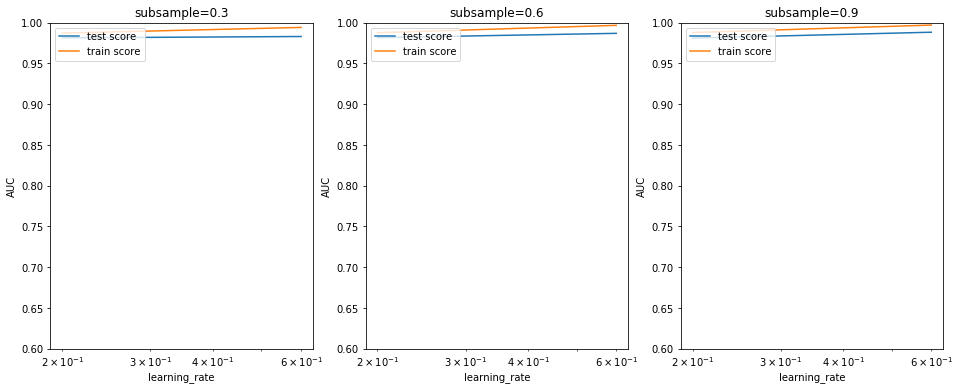

In [135]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [136]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [137]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,random_state=42)
model.fit(df_train_pca, y_train)

[15:15:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [138]:
# predict
y_pred = model.predict_proba(df_test_pca)
predictions = model.predict(df_test_pca)

y_pred[:10]

array([[9.9898261e-01, 1.0173678e-03],
       [1.6431212e-03, 9.9835688e-01],
       [1.1045933e-03, 9.9889541e-01],
       [9.9963123e-01, 3.6875624e-04],
       [9.7325969e-01, 2.6740283e-02],
       [8.7576103e-01, 1.2423900e-01],
       [9.9995500e-01, 4.5008484e-05],
       [8.9814663e-03, 9.9101853e-01],
       [9.7581118e-01, 2.4188807e-02],
       [9.9941778e-01, 5.8220181e-04]], dtype=float32)

In [139]:
# roc_auc
auc = roc_auc_score(y_test, y_pred[:, 1])
auc

0.8889887080418679

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8300
           1       0.32      0.77      0.45       701

    accuracy                           0.85      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.93      0.85      0.88      9001



In [141]:
# metrics
get_metrics(y_test,predictions)

[[7140 1160]
 [ 158  543]] 

Accuracy Score on test data:  0.8535718253527386
F1 Score on test data:  0.4517470881863561
Sensitivity:  0.7746077032810271
Specificity:  0.8602409638554217
false negative rate:  0.2253922967189729
positive predictive value:  0.31884908984145627
Negative predictive value:  0.9783502329405317
Misclassification Rate:  0.1464281746472614


####
<font color=green> Logistic Model </font>

[[6221 2079]
 [  96  605]] 

<p>
Accuracy Score on test data:  0.7583601822019775 <br>
<span style="background-color: #FFFF00"> F1 Score on test data:  0.35745937961595275 </span> <br>
<span style="background-color: #FFFF00"> Sensitivity:  0.8630527817403709</span> <br>
Specificity:  0.7495180722891567 <br>
<span style="background-color: #FFFF00"> false negative rate:  0.1369472182596291 </span> <br>
positive predictive value:  0.22540983606557377 <br>
Negative predictive value:  0.9848029127750515 <br>
Misclassification Rate:  0.24163981779802243 <br>
</p>

<font color=green> SVM </font>

[[7384  916]
 [ 219  482]] 
<p>
 Accuracy Score on test data:  0.8739028996778135 <br>
<span style="background-color: #FFFF00"> F1 Score on test data:  0.45926631729394957 </span><br>
<span style="background-color: #FFFF00"> Sensitivity:  0.6875891583452212 </span><br>
Specificity:  0.8896385542168674<br>
<span style="background-color: #FFFF00"> false negative rate:  0.3124108416547789 </span><br>
positive predictive value:  0.3447782546494993<br>
Negative predictive value:  0.9711955806918322<br>
Misclassification Rate:  0.12609710032218643<br>
</p>  

<font color=green> Random Forest </font>

[[6423 1877]
 [ 118  583]] 
<p>
Accuracy Score on test data:  0.7783579602266415<br>
<span style="background-color: #FFFF00"> F1 Score on test data:  0.36887061056627646 </span><br>
<span style="background-color: #FFFF00"> Sensitivity:  0.8316690442225392 </span><br>
Specificity:  0.773855421686747<br>
<span style="background-color: #FFFF00"> false negative rate:  0.16833095577746077 </span><br>
positive predictive value:  0.2369918699186992<br>
Negative predictive value:  0.9819599449625439<br>
Misclassification Rate:  0.22164203977335853<br>
</p>    

<font color=green> XGBoost </font>

[[7140 1160]
 [ 158  543]] 
<p>
Accuracy Score on test data:  0.8535718253527386 <br>
<span style="background-color: #FFFF00"> F1 Score on test data:  0.4517470881863561 </span><br>
<span style="background-color: #FFFF00"> Sensitivity:  0.7746077032810271 </span><br>
Specificity:  0.8602409638554217<br>
<span style="background-color: #FFFF00"> false negative rate:  0.2253922967189729 </span><br>
positive predictive value:  0.31884908984145627<br>
Negative predictive value:  0.9783502329405317<br>
Misclassification Rate:  0.1464281746472614<br>
</p>

#### <font color=blue> Above metrics result from different model shows the XGBoost is the better predictive model among them.</font>


### <font color=red> Model-2 for feature importance </font>

In [142]:
telecom_hvc_woPca = telecom_hvc.copy()

In [143]:
corr_matrix = telecom_hvc_woPca.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [144]:
print(to_drop)

['total_ic_mou_6', 'total_ic_mou_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'onnet_mou_good_phase', 'offnet_mou_good_phase', 'loc_og_mou_good_phase', 'std_og_mou_good_phase', 'isd_og_mou_good_phase', 'og_others_good_phase', 'og_others_action_phase', 'total_og_mou_good_phase', 'loc_ic_mou_good_phase', 'std_ic_mou_good_phase', 'isd_ic_mou_good_phase', 'total_ic_mou_good_phase', 'total_rech_num_good_phase', 'vol_3g_mb_good_phase', 'sachet_2g_good_phase', 'sachet_2g_action_phase', 'vbc_3g_good_phase']


In [145]:
# Drop highly correlated columns
telecom_hvc_woPca = telecom_hvc_woPca.drop(to_drop,axis=1)

In [146]:
telecom_hvc_woPca.shape

(30001, 194)

In [147]:
X_m2 = telecom_hvc_woPca.drop('churn',axis=1)
X_m2.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 1986.62        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
21  514.45  597.75  637.76       102.41       132.11        85.14   
23   74.35  193.90  366.97        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
21              1.58              0.00              0.00              0.00   
23              0.00              0.00              0.00             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00    

In [148]:
y_m2 = telecom_hvc_woPca['churn']
y_m2.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [149]:
cols = X_m2.columns

In [150]:
# Splitting the data into train and test
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, train_size=0.7, test_size=0.3, random_state=42)

In [151]:
scaler = StandardScaler()
X_train_m2[cols] = scaler.fit_transform(X_train_m2[cols])
X_test_m2[cols] = scaler.transform(X_test_m2[cols])

C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\choud00d\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [152]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_train_m2, y_train_m2 = sme.fit_resample(X_train_m2, y_train_m2)

In [153]:
X_train_m2.shape

(33017, 193)

In [154]:
cols = X_train_m2.columns

In [155]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(verbose=1)
rfc.fit(X_train_m2,y_train_m2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.9s finished


RandomForestClassifier(verbose=1)

In [156]:
# Making predictions
predictions = rfc.predict(X_test_m2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [157]:
# Let's check the report of our default model
print(classification_report(y_test_m2,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8300
           1       0.41      0.79      0.54       701

    accuracy                           0.90      9001
   macro avg       0.70      0.85      0.74      9001
weighted avg       0.94      0.90      0.91      9001



### <font color=green> Hyperparameter tuning </font>

In [158]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': range(100, 800, 200),
    #'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [6,9,12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_m2,y_train_m2)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16], 'max_features': [6, 9, 12],
                         'min_samples_leaf': range(100, 800, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [159]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9845628528729676 using {'max_depth': 16, 'max_features': 12, 'min_samples_leaf': 100, 'n_estimators': 300}


In [160]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=300)

In [161]:
# fit
rfc.fit(X_train_m2,y_train_m2)
# predict
predictions = rfc.predict(X_test_m2)

In [162]:
print(classification_report(y_test_m2,predictions))
print_ln()
get_metrics(y_test_m2,predictions)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8300
           1       0.32      0.84      0.47       701

    accuracy                           0.85      9001
   macro avg       0.65      0.85      0.69      9001
weighted avg       0.93      0.85      0.88      9001

---------------------------------------------------------------------------------------------------- 

[[7062 1238]
 [ 112  589]] 

Accuracy Score on test data:  0.8500166648150206
F1 Score on test data:  0.4659810126582278
Sensitivity:  0.8402282453637661
Specificity:  0.8508433734939759
false negative rate:  0.15977175463623394
positive predictive value:  0.3223864258347017
Negative predictive value:  0.9843880680234179
Misclassification Rate:  0.14998333518497944


In [163]:
results=pd.DataFrame()
results['columns']=cols
results['importances'] = rfc.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

columns  importances
65                  loc_ic_mou_8         0.07
93              total_rech_amt_8         0.07
59              loc_ic_t2m_mou_8         0.06
14                 roam_og_mou_8         0.05
29                  loc_og_mou_8         0.04
147                fb_user_8_1.0         0.04
176  total_rech_amt_action_phase         0.04
96                max_rech_amt_8         0.03
105              max_rech_data_8         0.03
134         night_pck_user_8_0.0         0.03
11                 roam_ic_mou_8         0.03
153            arpu_action_phase         0.03
56              loc_ic_t2t_mou_8         0.03
158       roam_og_mou_good_phase         0.03
102           last_day_rch_amt_8         0.02
99           date_of_last_rech_8         0.02
2                         arpu_8         0.02
20              loc_og_t2m_mou_8         0.02
53                total_og_mou_8         0.02
156       roam_ic_mou_good_phase         0.02

### <font color=green> Best 20 predictors and recommendations</font>

Customer behaviour in action phase has a big influence on his/her decisin to churn or not.

- total_rech_amt_8, total_rech_amt_action_phase, max_rech_amt_8: 

Total recharge amount in action phase is a strong predictor for churn. Some special or discounted packages can help to retain the customers.


- loc_ic_mou_8, loc_ic_t2m_mou_8: 

Incoming calls usage in action phase also indicates whether customer will continue or churn. 


- roam_og_mou_8, roam_og_mou_good_phase: 

Outgoing roaming charges in all phases play an important role and hence roaming charges should be competitively priced.


- roam_ic_mou_8, roam_ic_mou_good_phase: 

Incoming roaming charges in all phases play an important role and hence roaming charges should be competitively priced.


- loc_og_mou_8, loc_og_t2m_mou_8, total_og_mou_8: 	

Outgoing calls usage in action phase is an important predictor for churn. Customer can be given incentive to increase outgoing calls


- fb_user_8_1.0: 

FB_USER (services to access social media sites) in action month influences customer decision. Low usage can be an indicator of the risk of churn.


- night_pck_user_8_0.0: 

Customer's usage of night package is a good indication of customer choice to stay or churn.


- arpu_action_phase, arpu_8: 

Average revenue per user in the action phase is an important indicator of the customer behaviour and it decision to churn r not.


- last_day_rch_amt_8, date_of_last_rech_8: 

Day and amount of last recharge also suggests potential customer risk to churn or not.
